Author: \textbf{Kajetan Chrapkiewicz}. Last update: June 2019.
- new take on AIT inversion of OBS data only
- to some extent based on the work done before AGU 2018 (project 'fwi_sant_3D_OBS_only')

##### *Notebook setup

###### Modules

In [1]:
%matplotlib inline
# FOR INTERACTIVE PLOTS (E.G. A SLIDER)
# %matplotlib notebook 

# AUTOCOMPLETING
%config IPCompleter.greedy=True

import numpy as np
import matplotlib.pyplot as plt 

from lib_generic import *
from lib_fwi_project_CLASS import Proj, Proj_Syn, Proj_Inv, Proj_Both, Proj_Syn_vs_Obs, Proj_Inv_Synth
from lib_fwi_project_CLASS import Iteration_Block
from lib_io_fullwave import Read_vtr
from lib_fwi_generic_PLOTT import Plot

# AUTOMATICALLY RELOAD LIBRARIES BEFORE EXECUTION 
%load_ext autoreload 
%autoreload 2

###### Paths

In [2]:
machine = 'kmc'
paths = Paths_Prepare(machine)

###### Global variables

In [3]:
proj_path = paths['projects'] + 'fwi_sant_AIT_OBS/input/'

# proj1 (re-run fwi_sant_3D_OBS_only/proj24)

- in the meantime I hard-linked proj1 to other projects and changed some files (e.g. RawSeis.txt)
- I then copied proj25-RawSeis.txt to proj24-RawSeis.txt in fwi_sant_3D_OBS_only and proj1-... here

In [56]:
pname = 'proj1'
proj1 = Proj(pname, io='sgy', problem='inversion', kernel='low')

## Input

In [14]:
pname = 'proj1'
old_proj = Proj('proj24', path='/home/kmc3817/rds/PROJECTS/fwi_sant_3D_OBS_only/input/')
proj1 = Proj(pname, old_proj=old_proj, dupl_cmd='ln', verbos=0)

lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)
lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)
lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)


0

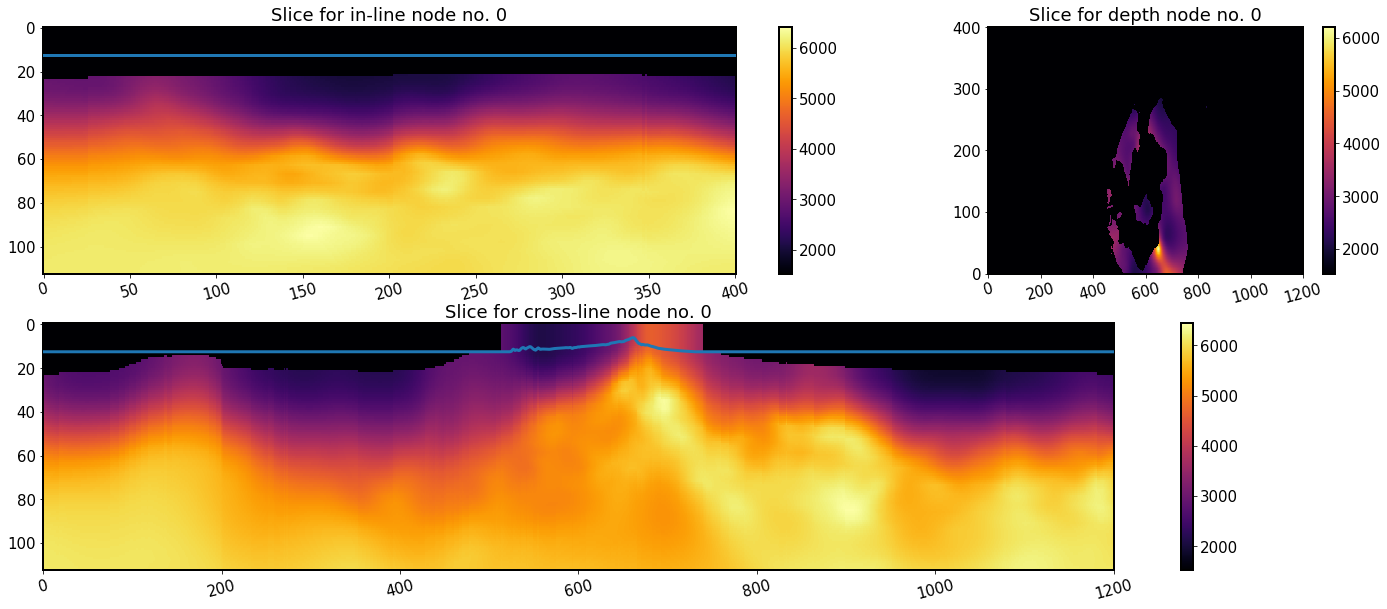

In [5]:
Plot_Project_Input(pname, io='sgy', plot_mod=1, plot_sr=0, plot_wavelet=0, alpha=1)

In [15]:
# !cat {pname}'-Runfile_synth.key'

In [16]:
# !sed -i -e "s/proj24/proj1/g" {pname}'-Run.pbs'
# !cat {pname}'-Run.pbs'

## Output

In [43]:
# proj1.fnames_actual
proj1.out.Prepare2Plot()

KeyError: 'CP_Vp_files'

# proj2 (-||- but W4108 only, FS)

In [29]:
pname = 'proj2'
proj2 = Proj(pname, io='sgy', problem='synthetic', kernel='low')

## Input

In [18]:
# print proj2.fnames
# print proj2.fnames_actual

In [20]:
# old_proj = Proj('proj24', path='/home/kmc3817/rds/PROJECTS/fwi_sant_3D_OBS_only/input/')
# proj2.Duplicate(old_proj, dupl_mode='sp', dupl_cmd='cp') # MAKE A HARD COPY

##### Tidy

In [29]:
path = '/media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/jm_checkerboard/phase-comparisons/old_lines/'
!ls {path}/4108obs_*_m_taper20.sgy > {pname}-RawSeis.txt

In [32]:
from lib_fwi_generic import Segyprep_Run
z_sea = 12.5
dx = dx
Segyprep_Run(pname, z_sea=z_sea, dx=dx)

0

In [48]:
from lib_fwi_generic import Runfile_Create
Runfile_Create(pname, z_sea, machine='kmc', ibfs=1, b_abs=2, e_abs=20)

0

In [65]:
!cat proj2-Runfile_synth.key

! A. PROBLEM DEFINITION
 problem       : synthetic
 domain        : time
 dim           : 3D
 equation      : acoustic
 units         : metric
 anisotropy    : none
 kernel        : low
! B. MODEL DEFINITON
NX1 : 1201
NX2 : 401
NX3 : 113
 DX            : 50.0
etime : 5.0
! X. FREE SURFACE
 ibfs          : 1
seaLevel : 0
 maxGhostIter  : 2
 vacuum        : 0
 accuracy      : 0.001
 minGhostFS    : 0.001
 minFictFS     : 0.5
 interpMode    : 1
 srcType       : 0
 recType       : 0
! C. DATA DEFINITION
NCOMP : 1
NSHOTS : 1
NRECS : 1437
MAXRC : 1437
 MAXPS         : 1
io : SEGY
! D. BOUNDARY CONDITIONS
 btop          : 0
bbot : 40
bleft : 40
bright : 40
bfront : 40
bback : 40
 extratop      : 0
extrabot : 50
extraleft : 50
extraright : 50
extrafront : 50
extraback : 50
! F. INVERSION PARAMATERS (copied from Jo!!!)
 Slowness               : yes
 Normalise              : yes
 Amplitude              : no
 Spatial                : no
 Global Gaussian Width  : 0
 SMOOTH X1: 2.0
 SMOOTH X2: 2.0


In [56]:
from lib_fwi_generic import PBS_File_Create
par_pbs = {'problem': 'synth', 'code': 'rev688_test', 'q': 'mrwarn', 
           'hours': 4}
PBS_File_Create(pname, par_pbs=par_pbs)

lib_fwi_generic.py/PBS_File_Create: Warning. Setting ncpus and mem_gb


0

In [74]:
# !cat proj2-Run.pbs

lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)
lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)
lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)
lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)
lib_generic_PLOTT.py/Plot_Slice_Single:  (1201, 401, 1)


lib_fwi_generic_PLOTT.py/Plot_sgy: Warning. Conversion sgy2vtr not reliable, instead plotting .vtr version found in ./
lib_fwi_generic_PLOTT.py/Plot_sgy: Warning. Conversion sgy2vtr not reliable, instead plotting .vtr version found in ./


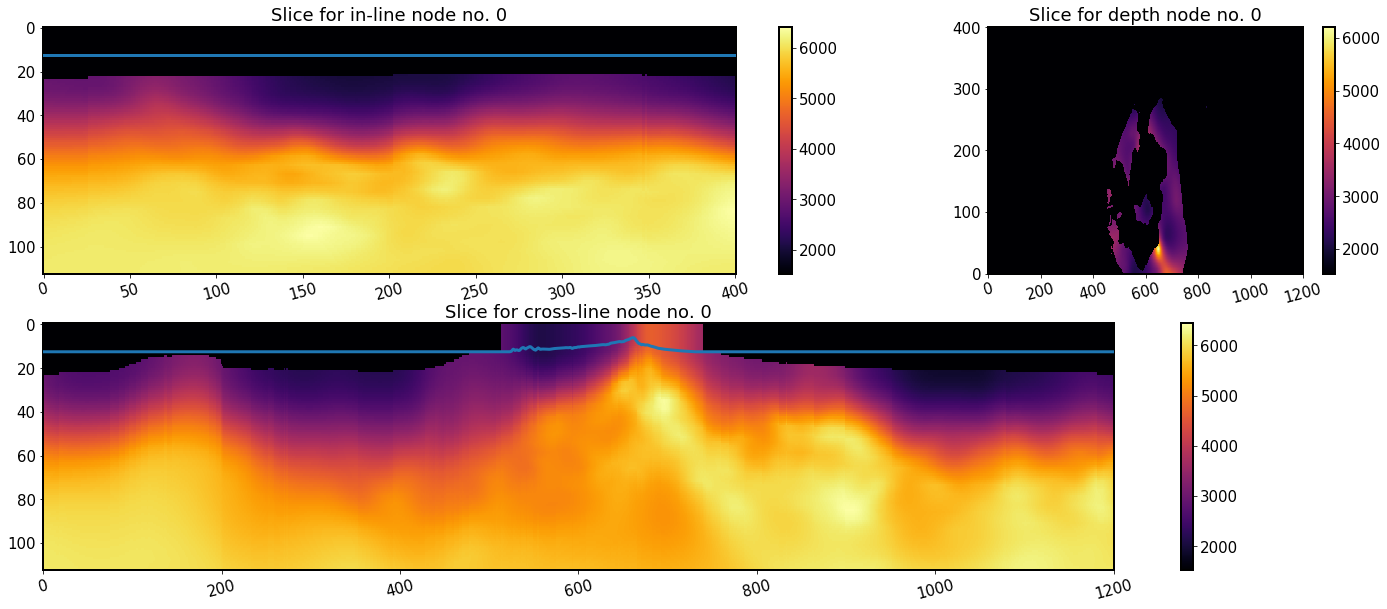

<Figure size 432x288 with 0 Axes>

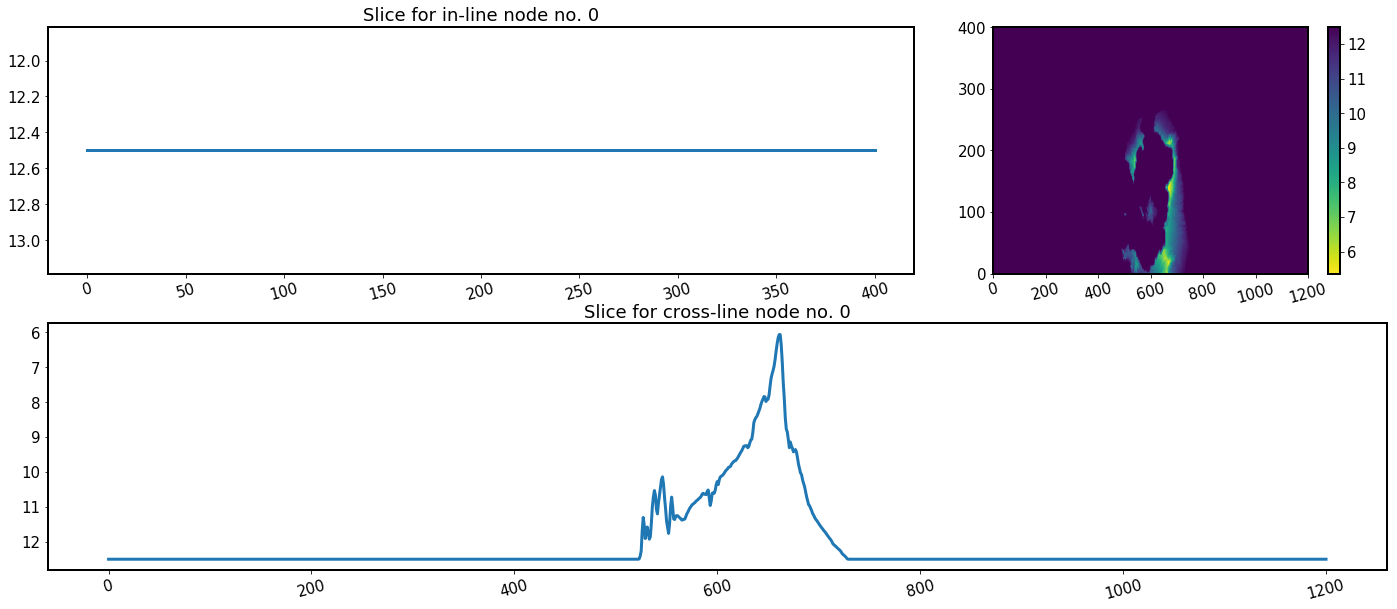

<Figure size 432x288 with 0 Axes>

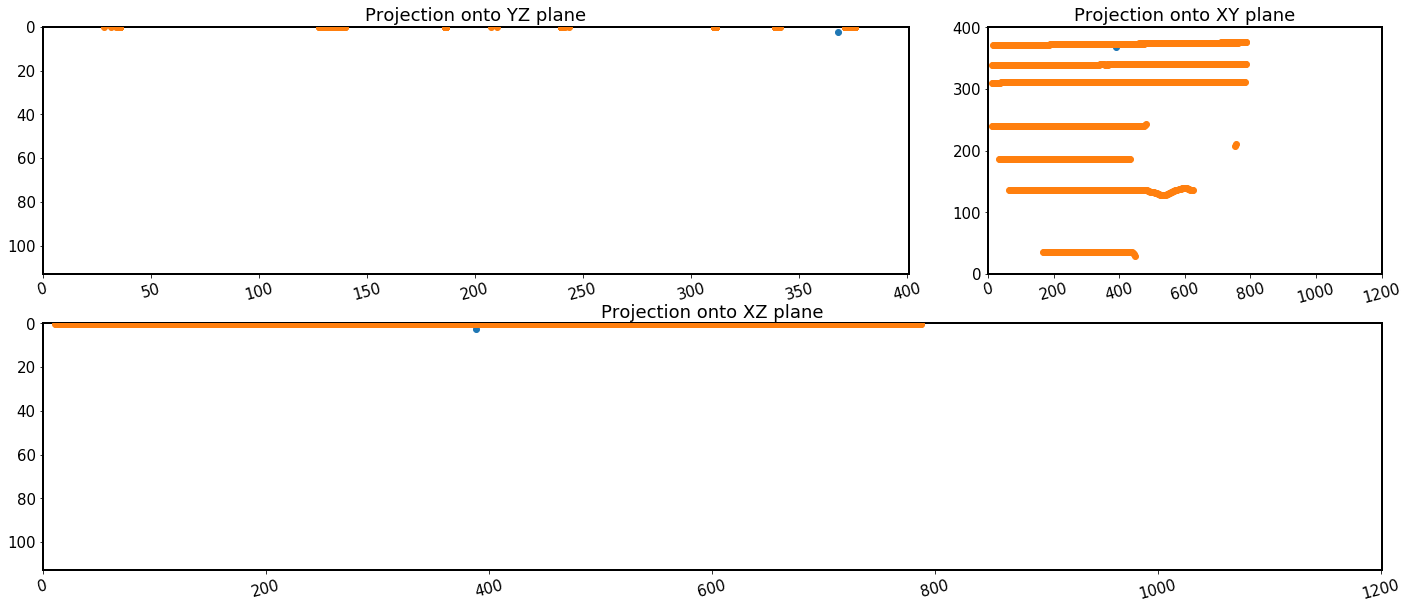

<Figure size 432x288 with 0 Axes>

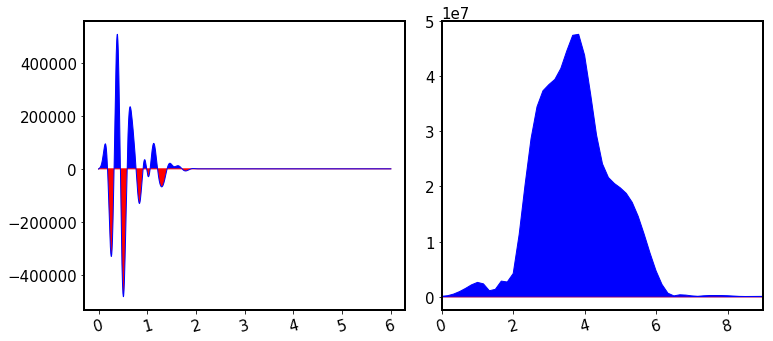

In [19]:
pars_gen = {'dt': 0.0025}
proj2.inp.Plot(plot_sr=1, plot_sign=1, plot_mod=1, plot_fs=1,
               pars_gen=pars_gen,
               alpha=1)

## Output

In [24]:
# proj2.fnames_actual

In [39]:
# !su_range.sh proj2-Synthetic.sgy

In [30]:
proj2.out.Prepare2Plot()

['proj2-Synthetic.sgy']


In [33]:
# !ls -lth

lib_fwi_generic_PLOTT.py/Plot_Model: Warning. plot_type not specified - assuming 'slice'.


0

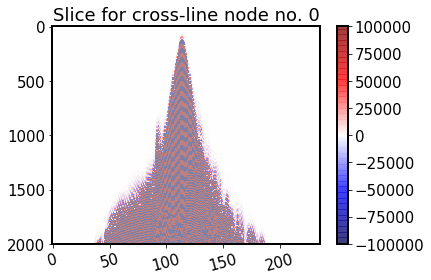

In [35]:
a = 1e5
Plot('proj2-Synthetic_4108_5.vtr', cmap='seismic', minn=-a, maxx=a, yflip=1)

In [37]:
# proj2.out.Plot()

# proj3 (empty)

# proj4 (beta test 1)

In [973]:
pname = 'proj4'
proj4 = Proj_Checker(pname, io='sgy')
# proj4.inp.files
# proj4.fnames_actual

The box defines new, correct values. Everything copied needs to adhere to this -> be changed if necessary.

lib_generic.py/Exists: File: /home/kmc3817/heavy_PhD/meta_data/ALL-PointSources.pgy does not exist.
lib_generic.py/Exists: File: /home/kmc3817/heavy_PhD/meta_data/ALL-PointSources.pgy does not exist.


No. of OBSes within the box: 10
List of OBSes within the box: ['4138', '4139', '4136', '4137', '4123', '4125', '4124', '4112', '4110', '4109']
[421, 149, 61]


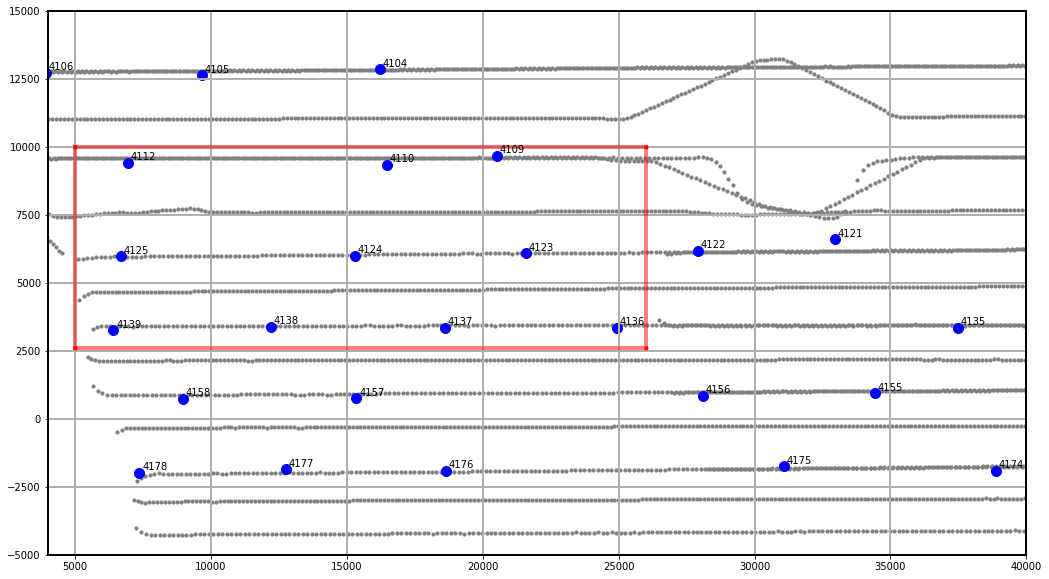

In [974]:
# PREREQUISITE - CORRECT VALUES IN THE MODEL HEADER (THIS CAN BE ALSO READ FROM SOME INPUT FILES)
dt = 0.0025 # s
ns = 1000 # SAMPLES

dx = 50 # m
x1 = 5000 # m
x2 = 26000 # m
y1 = 2600 # m
y2 = 10000 # m
z1 = 0 # m <=> CUT AT THE SEA SURFACE
z2 = 3000 # m
# NOTE: z_sea SHOULD BE ALWAYS AT 0 => z1 CAN BE FRACTIONAL 

box = [x1, x2, y1, y2, z1, z2]

proj4.Set_Geometry(box=box, dt=dt, ns=ns)
print proj4.dims
# proj4.Plot_Geometry(dx=50, lims_pad=500, s_factor=10) 
proj4.Plot_Geometry(dx=50, xlim=[4e3, 4e4], ylim=[-5e3, 15e3], s_factor=10) 

In [854]:
# file2dupl = 'Ben_whole_model_24-04-18_x-30000_30000_y-5000_15000.sgy'
# # file2dupl = 'Ben_whole_model_24-04-18_x2500_6700_y1000_2700.sgy'
# proj4.inp.model.Duplicate(file2dupl, dupl_cmd='cp', verbos=0)
# # # proj4.inp.model.Check()

In [363]:
# proj4.inp.model.Resize()
# proj4.inp.model.Find_Nnodes()
# proj4.inp.model.Check()

In [372]:
# Plot('proj4-TrueVp.sgy', coord_value=10, ylim=[40, 20])#, plot_type='slices_xyz', xyz=[20, 30, 30])
# proj4.inp.model.Plot()

In [1515]:
# !su_range.sh proj4-TrueVp.sgy
# proj4.inp.model.z_origin

In [925]:
!cp proj4-TrueVp.sgy proj4-TrueVp.sgy_bckp

In [3]:
# # proj4.inp.model.Create_Anomaly()
# !cp proj4-TrueVp.sgy_bckp proj4-TrueVp.sgy
# model = proj4.inp.model.Add_Anomaly()

In [2]:
# proj4.inp.model.Plot(xyz=[1,1,1])

In [1]:
# proj4.inp.chckr.Plot(xyz=[1,1,1])

In [1167]:
# file2dupl = '/home/kmc3817/projects/topo/santorini_merged_local_50_-30000_30000_-5000_15000-FreeSurf.vtr'
# proj4.inp.fs.Duplicate(file2dupl, -30000, -5000, dupl_cmd='cp')
# proj4.inp.fs.Resize()
# proj4.inp.fs.Check()
# proj4.inp.fs.Plot()

In [371]:
# proj4.inp.wavelet.Create(f_max=4)
# proj4.inp.wavelet.Plot()

In [853]:
# proj4.inp.rawseis.Create(paths['obs_data'], '*_4.sgy')
# proj4.inp.rawseis.Cat()

In [852]:
# print proj4.obs_list
# proj4.inp.sp.Create(geometry='sgy', reciprocity=1, verbos=6)
# !fwi_run_segyprep.sh {proj4.name} # BETTER THAN FROM PYTHON: LIVE PREVIEW OF THE PROGRESS
# proj4.inp.sp.Run(verbos=6)
# proj4.inp.sp.Log()

DOES SEGYPREP GET RID OF OBS TOO CLOSE TO BOUNDARIES? IT SEEMS SO

In [387]:
# proj4.inp.sr.Check(verbos=100)
# proj4.inp.sr.Cat()
# proj4.inp.sr.Plot_All(dx=50)
# proj4.inp.sr.s

In [826]:
# !cat proj4-Skeleton.key
# !cat {paths['templates']}/template-Runfile.key
# proj4.inp.runfile.names
# proj4.inp.runfile.Create(ibfs=0, b_abs=10, e_abs=20, verbos=6)
blocks = [
    Iteration_Block(freq=3.0, niters=1, minoff=5),
    Iteration_Block(freq=4.0, niters=1)]#,#, minoff=5),
#     Iteration_Block(freq=5.0, niters=1)#, minoff=5)
# ]

proj4.inp.runfile.Set_Iterations(blocks)
# proj4.inp.runfile.Cat()

In [857]:
# proj4.inp.pbs.Create(snap_step=-100, verbos=10)
# proj4.inp.pbs.Cat()

## Synthetic

In [850]:
# proj4.inp.Check()

In [855]:
# proj4.out.outlog.Cat()

.//proj4-fw-000500-csref04139-iter00001-taskid00001.vtr
lib_fwi_generic.py/Wavefield_Extract_Shot_ID:  shot_id 4139


lib_generic.py/Exists: File: ./proj4-PointSources.pgy does not exist.


lib_fwi_generic_PLOTT.py/Plot_Wavefield_Model_FS_SR:  eleft, efront, etop 20 20 2
.//proj4-fw-001000-csref04139-iter00001-taskid00001.vtr
lib_fwi_generic.py/Wavefield_Extract_Shot_ID:  shot_id 4139


lib_generic.py/Exists: File: ./proj4-PointSources.pgy does not exist.


lib_fwi_generic_PLOTT.py/Plot_Wavefield_Model_FS_SR:  eleft, efront, etop 20 20 2


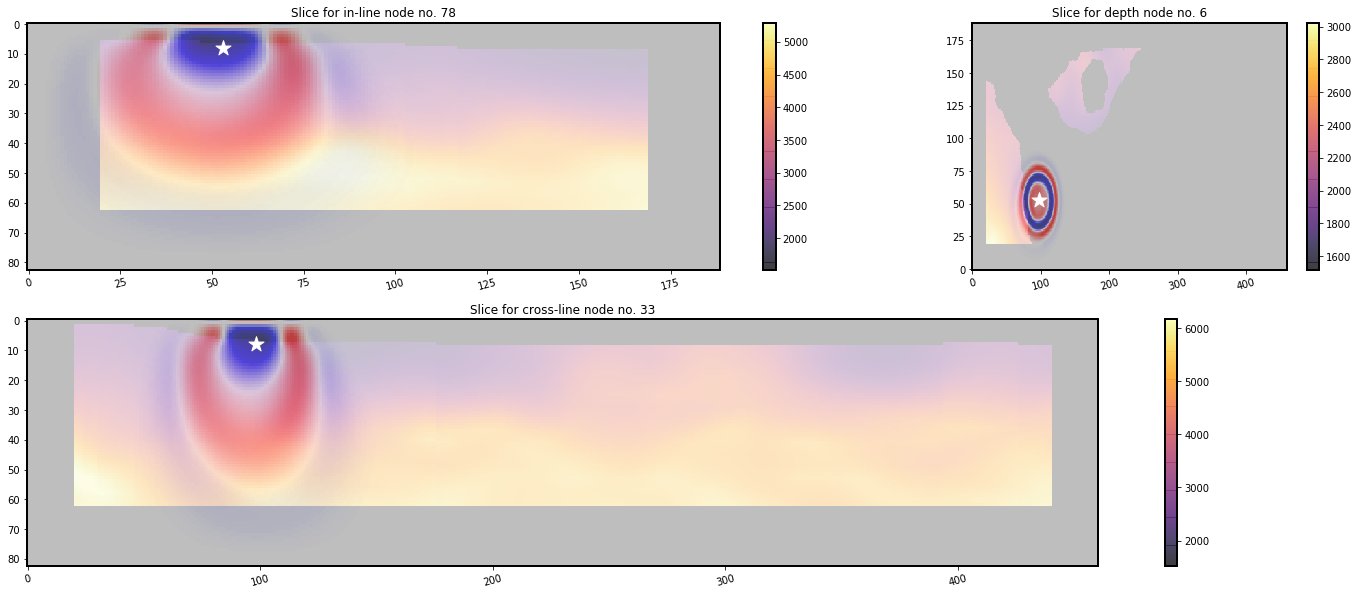

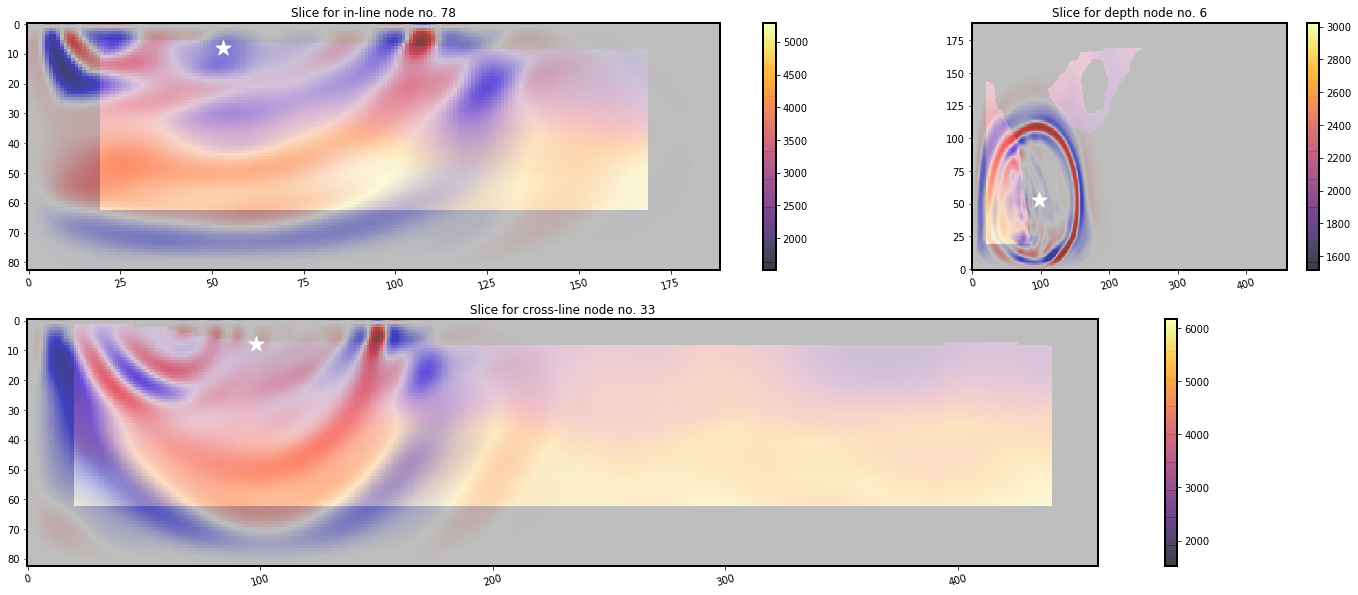

In [601]:
proj4.out.Plot_Wavefield(sid='4139', dx=50, verbos=0)

0

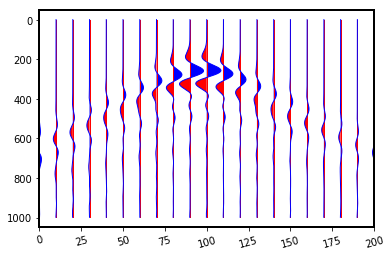

In [875]:
Plot('proj4-Synthetic_4125_7.vtr', data_type='data', xlim=[0,200])#, trace_math=[lambda x : x / np.max(x)])

lib_fwi_generic_PLOTT.py/Plot_Model: Warning. plot_type not specified - assuming 'slice'.


0

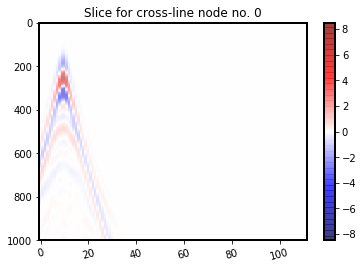

In [924]:
from lib_fwi_generic_PLOTT import Plot_Juxtaposition, Plot_Gather
n1, n2, n3, Z = Read_vtr('proj4-Synthetic_4125_7.vtr')
Plot_Juxtaposition([Z, Z], juxt='alternate_cmaps')#, xlim=[8,12], ylim=[100,500])#'diff')

In [521]:
# proj4.out.Prepare2Plot()
proj4.out.Check_Synth()

Warning. Max amplitude in file .//proj4-Synthetic_4110_40.vtr is only: 1.23167e-11
Warning. Max amplitude in file .//proj4-Synthetic_4110_41.vtr is only: 1e-32
Warning. Max amplitude in file .//proj4-Synthetic_4123_55.vtr is only: 1e-32
Warning. Max amplitude in file .//proj4-Synthetic_4124_40.vtr is only: 1e-32
Warning. Max amplitude in file .//proj4-Synthetic_4124_41.vtr is only: 1e-32
Warning. Max amplitude in file .//proj4-Synthetic_4124_55.vtr is only: 1e-32
Warning. Max amplitude in file .//proj4-Synthetic_4137_55.vtr is only: 1e-32
Warning. Max amplitude in file .//proj4-Synthetic_4138_55.vtr is only: 3.7941e-08


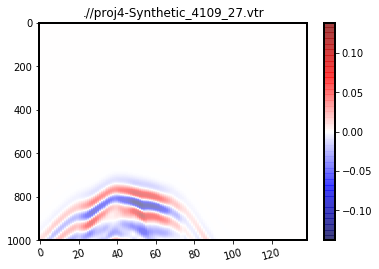

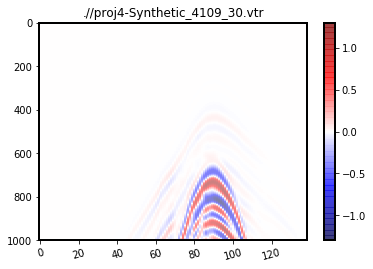

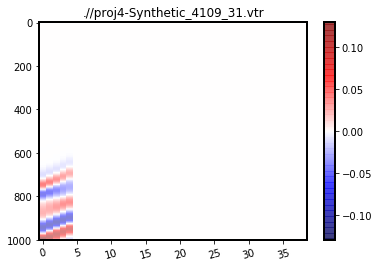

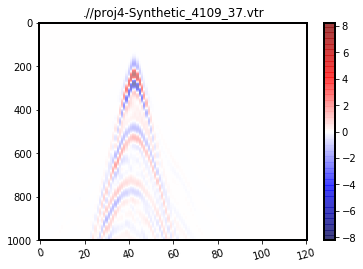

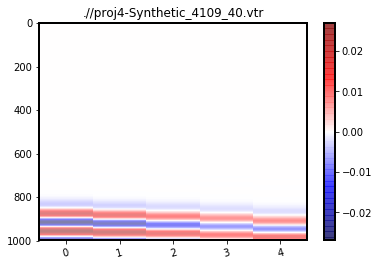

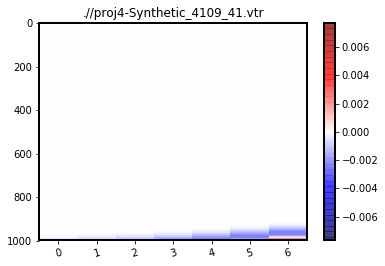

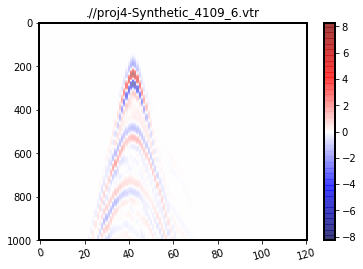

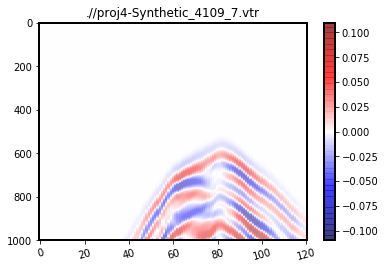

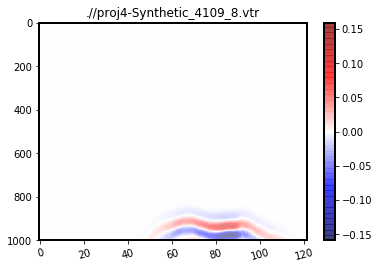

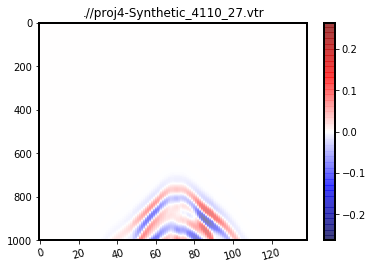

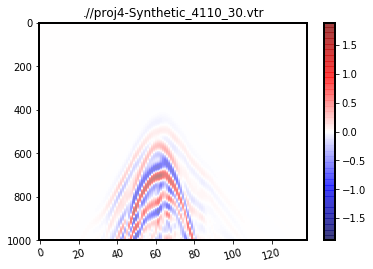

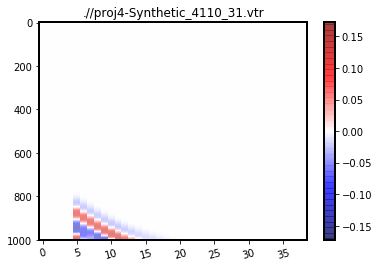

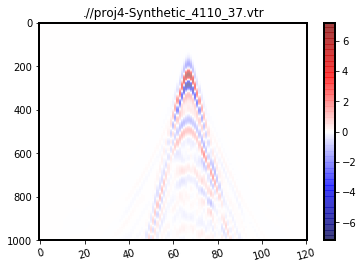

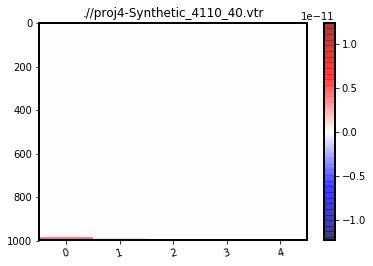

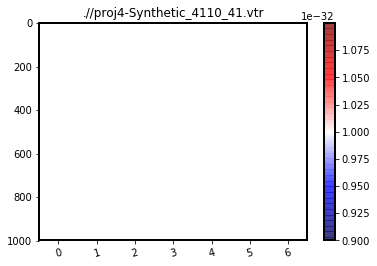

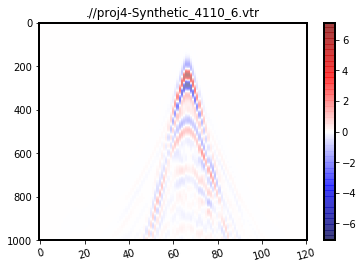

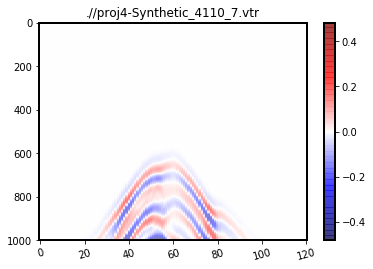

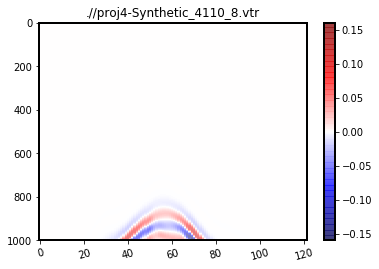

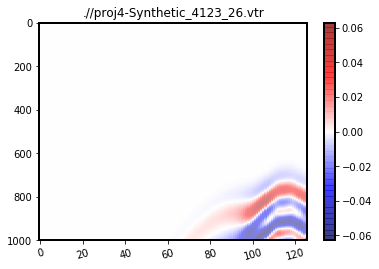

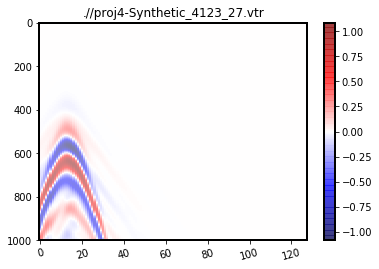

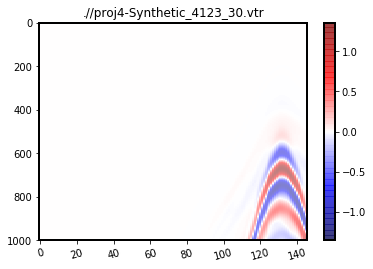

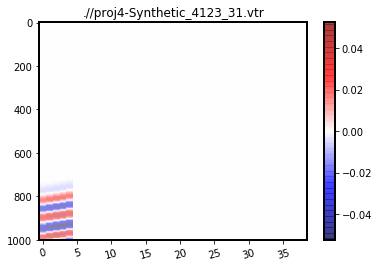

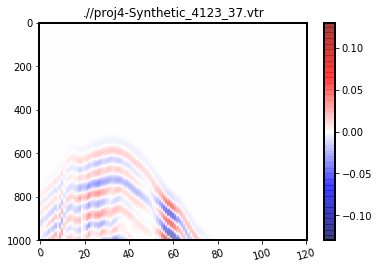

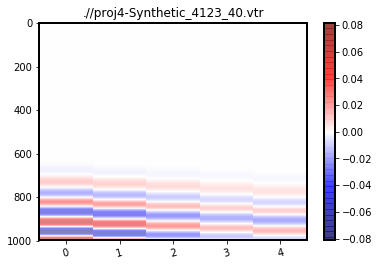

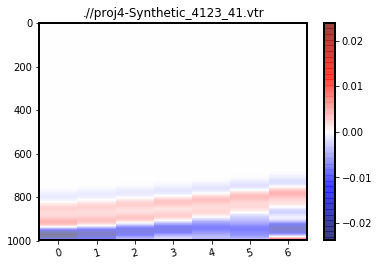

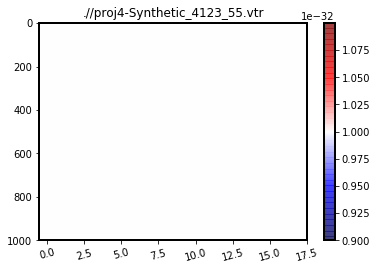

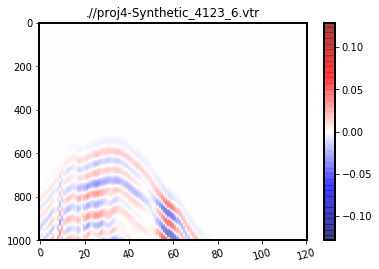

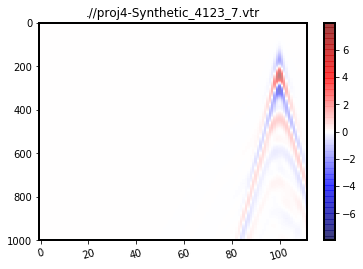

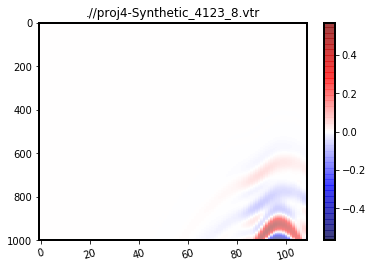

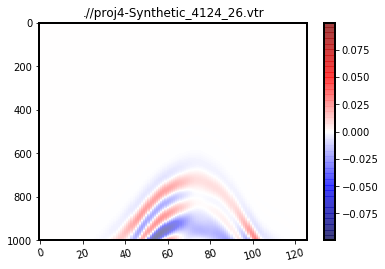

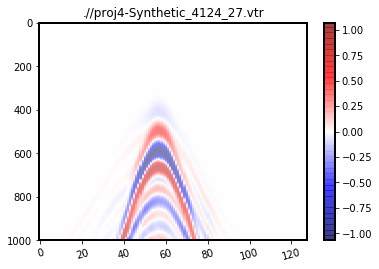

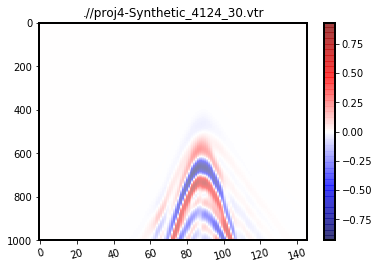

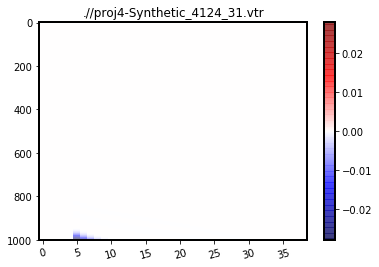

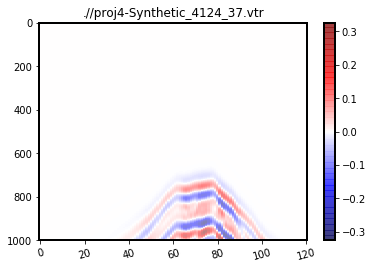

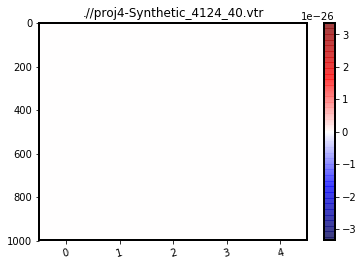

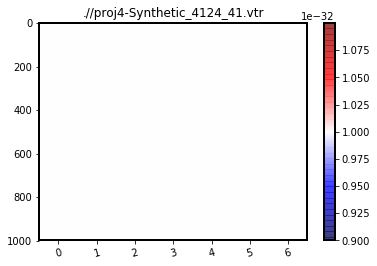

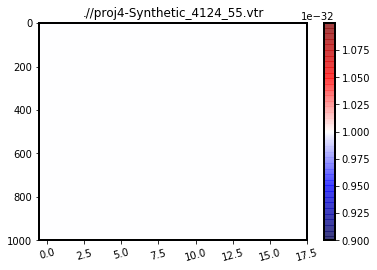

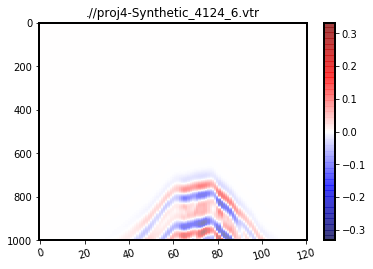

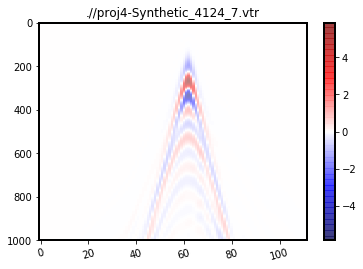

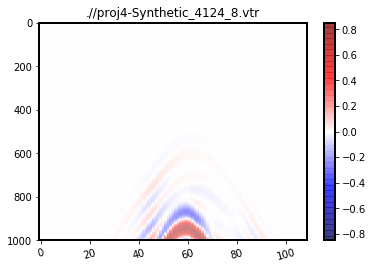

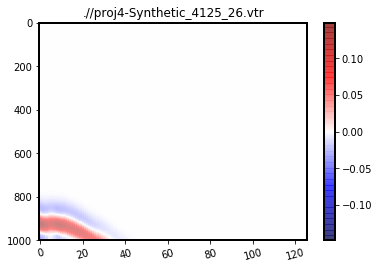

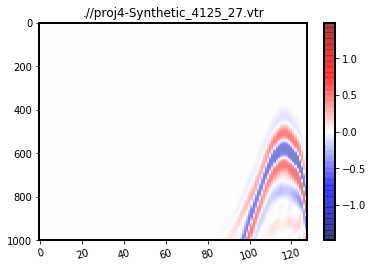

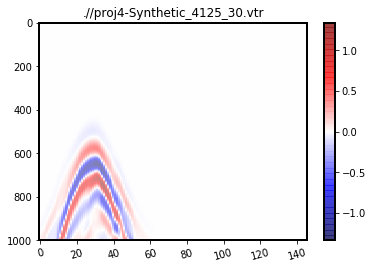

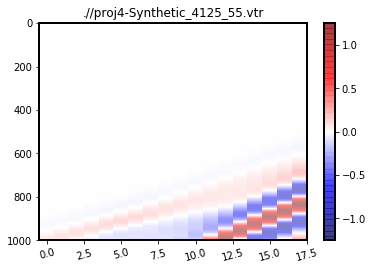

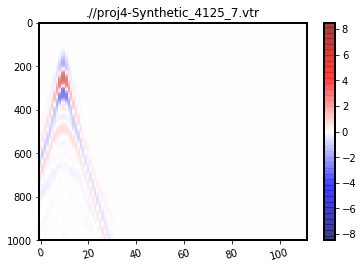

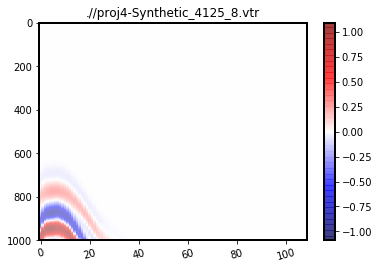

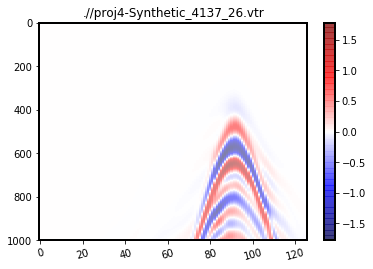

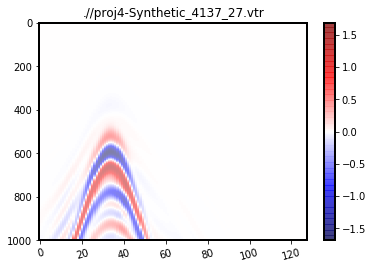

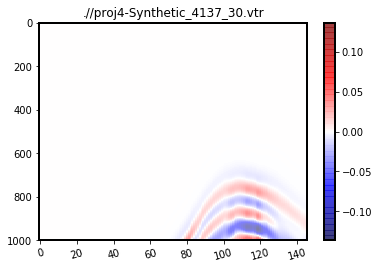

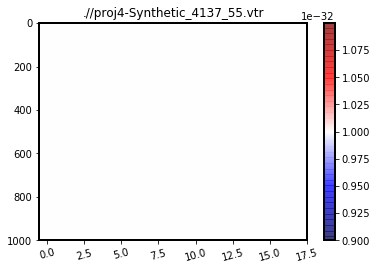

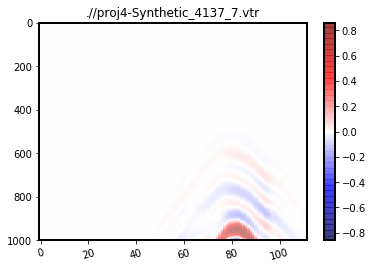

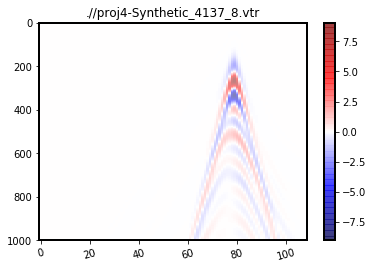

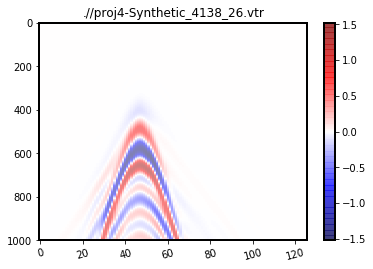

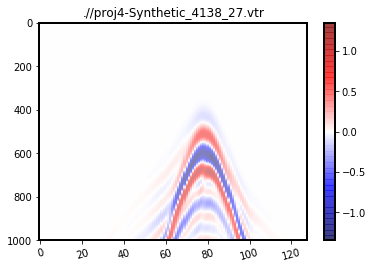

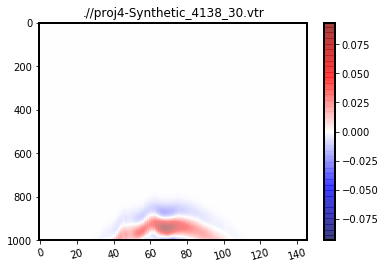

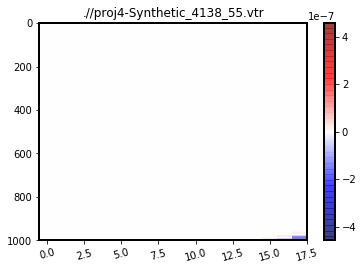

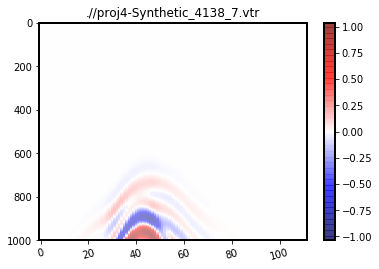

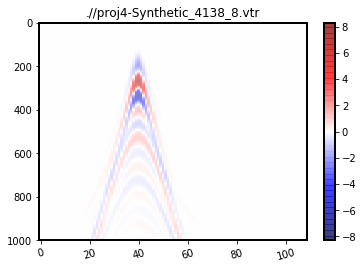

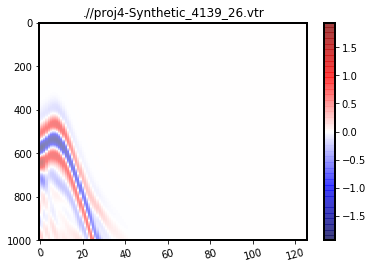

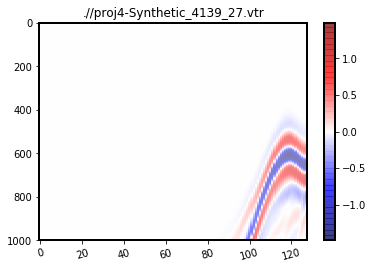

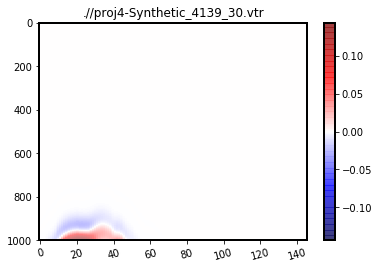

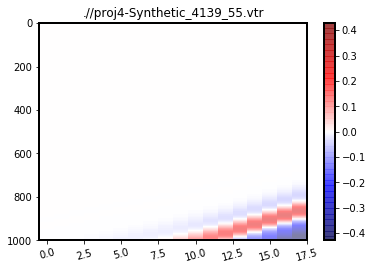

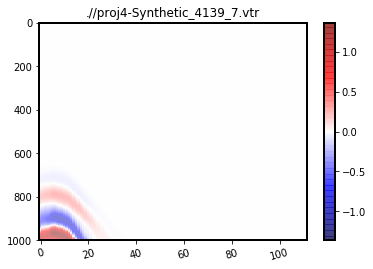

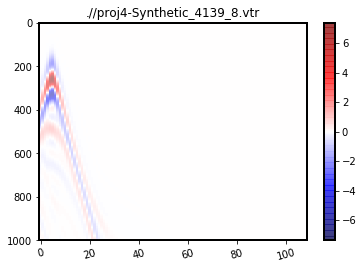

In [520]:
proj4.out.Plot_Synth(verbos=0)

In [301]:
proj4.out.Plot(data=0, fw=0, dx=50)

{'4109': [260.35998, 133.3, 10.12], '4123': [281.6, 61.84, 6.36], '4110': [179.78, 126.7, 8.620000000000001], '4124': [156.08, 59.9, 8.32]}


lib_generic.py/Exists: File: ./proj4-PointSources.pgy does not exist.


## Inversion

In [858]:
# proj4.inp.Check()

In [860]:
proj4.out.Get_Functional(time_stamp=0)
print proj4.out.functional

{'4138': ['97.6', '98.0'], '4139': ['97.5', '97.8'], '4123': ['98.2', '98.4'], '4125': ['97.8', '98.1'], '4124': ['97.2', '97.8'], '4137': ['97.6', '98.1']}


In [861]:
proj4.out.outlog.Cat()
# !cat proj4-CP00001-Runfile.key

Content of  proj4-Out.log : 
path to the code-executable: /home/kmc3817/PhD/rev688_test/bin/fullwave3D.exe
pbsexec: requested walltime 3600 seconds
pbsexec: grace period 1200 seconds
pbsexec: terminating after 2400 seconds
pbsexec: mpiexec /home/kmc3817/PhD/rev688_test/bin/fullwave3D.exe proj4 -1 6

# mpiexec: full path to program is /home/kmc3817/PhD/rev688_test/bin/fullwave3D.exe
# mpiexec: program arguments are: proj4 -1 6
# mpiexec: 6 ranks allocated via PBS select
# mpiexec: 6 OpenMP threads / rank allocated by PBS select
# mpiexec: Job has exclusive use of the allocated nodes. Enabling process-pinning
# mpiexec: machinefile configured as:
cx1-104-14-2.cx1.hpc.ic.ac.uk:2
cx1-104-18-1.cx1.hpc.ic.ac.uk:2
cx1-104-18-3.cx1.hpc.ic.ac.uk:2
#
# mpiexec: launching program...
#
(cx1-104-14-2.cx1.hpc.ic.ac.uk:0,1)
(cx1-104-18-1.cx1.hpc.ic.ac.uk:2,3)
(cx1-104-18-3.cx1.hpc.ic.ac.uk:4,5)
 fullwave3d: START
 fullwave3d: START
 fullwave3d: START
 fullwave3d: START
 fullwave3d: START
 fullwave3d:

In [713]:
# file2dupl = proj4.inp.model.name
# proj4.inp.startvp.Duplicate(file2dupl, dupl_cmd='cp')

a 3.04514
-3.0451438427 3.0451438427


lib_fwi_generic_PLOTT.py/Plot_Model: Warning. plot_type not specified - assuming 'slice'.


0

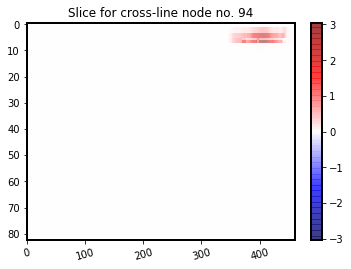

In [813]:
Plot('SLAVES_DUMPPREC-csref04123-iter00001.vtr', cmap='seismic', yflip=1)
# n1, n2, n3, d = Read_vtr('SLAVES_DUMPPREC-csref04123-iter00001.vtr')

In [790]:
print np.min(d)
print np.max(d)

0.0
17143.9


In [793]:
isnan = np.isnan(d)
print np.min(isnan), np.max(isnan)

False False


# proj5 (empty)

# proj6

In [293]:
proj6 = Proj_Synth('proj6', anisotropy='VTI')

In [294]:
dt = 0.0025 # s
ns = 1000   # samples

dx = 50     # m
# x1 = 5000   # m
# x2 = 26000  # m
# y1 = 2600   # m
# y2 = 10000  # m
x1 = -2e4   # m
x2 =  2e4   # m
y1 = -1e4   # m
y2 =  1e4   # m
z1 = 0      # m <=> CUT AT THE SEA SURFACE (SEA SURFACE SHOULD ALWAYS BE AT 0 => z1 CAN BE FRACTIONAL)
z2 = 3000   # m
box = [x1, x2, y1, y2, z1, z2]

# proj6.Set_Geometry(box=box, dt=dt, ns=ns, verbos=0)
# proj6.Plot_Geometry(dx=50) #xlim=[4e3, 4e4], ylim=[-5e3, 15e3], s_factor=10) 

In [295]:
proj6.inp.data.Test()

my name is:  proj6-TrueVp.sgy
my name is:  proj6-TrueDelta.sgy


In [184]:
proj6.inp.model.delta.name

'proj6-TrueDelta.sgy'

In [116]:
proj6.inp.files

{'FS': 'proj6-FreeSurf.vtr',
 'OutSeis': 'proj6-OutSeis.sgy',
 'R': 'proj6-Receivers.geo',
 'S': 'proj6-Sources.geo',
 'Sign': 'proj6-Signature.sgy',
 'SignIdx': 'proj6-Signature.idx',
 'Templ': 'proj6-Template.sgy',
 'TemplIdx': 'proj6-Template.idx',
 'TrueVp': 'proj6-TrueVp.sgy',
 'TrueVs': 'proj6-TrueVs.sgy',
 'pbs': 'proj6-Run.pbs',
 'runfile': 'proj6-Runfile.key',
 'runfile_skelet': 'proj6-Skeleton.key',
 'runfile_synth': 'proj6-Runfile_synth.key'}

In [59]:
file_xyz = paths['fs'] + 'santorini_merged_local_xrange_-80km_80km_yrange_-40km_40km_grid_50m.xyz'
proj6.inp.fs.Convert_xyz(file_xyz, 50)

lib_io_fullwave.py/Convert_xyz2vtr:  Assuming xyz contains elevation not depth.
xmin, xmax -80000.0 80000.0
ymin, ymax -40000.0 40000.0
xdiff 160000.0
ydiff 80000.0
nx, ny 3201 1601
[-80000. -79950. -79900. -79850. -79800.]
[-40000. -40000. -40000. -40000. -40000.]
[-1070.05383301 -1070.0423584  -1070.06982422 -1070.14941406 -1070.29370117]


In [73]:
file2dupl = paths['fs'] + 'santorini_merged_local_xrange_-80km_80km_yrange_-40km_40km_grid_50m.vtr'
x_origin = -8e4
y_origin = -4e4
proj6.inp.fs.Duplicate(file2dupl, x_origin, y_origin, dupl_cmd='cp')
proj6.inp.fs.x_origin

-80000.0

In [76]:
proj6.inp.fs.Resize()

x1, x2, y1, y2, z1, z2 -20000.0 20000.0 -10000.0 10000.0 0 3000
x1f, x2f, y1f, y2f -80000.0 80000.0 -40000.0 40000.0
x1n, x2n, y1n, y2n 1200 2000 600 1000
fs.shape (801, 401, 1)


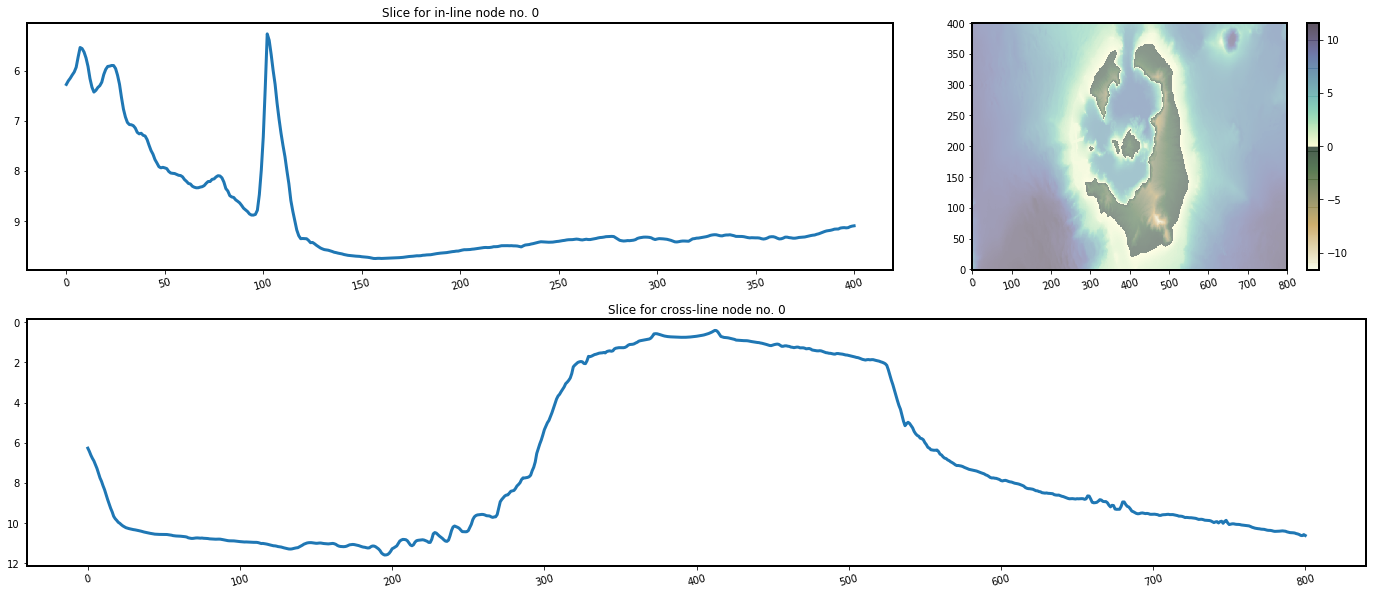

In [102]:
proj6.inp.fs.Plot()

0

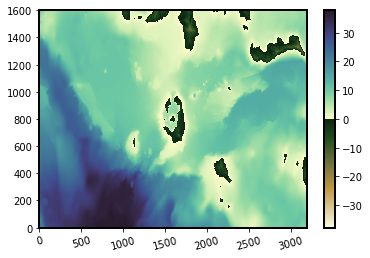

In [100]:
fname = paths['fs'] + 'santorini_merged_local_xrange_-80km_80km_yrange_-40km_40km_grid_50m.vtr'
Plot(fname, data_type='FS', plot_type='map', cmap=topo_r, alpha=1)

# p07 (chckbrd; Anafi b.)

In [9]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = 2e4     
x2 = 3e4    
y1 = 2.6e3    
y2 = 7e3    
z1 = 0 # CUT AT THE SURFACE OF THE SEA
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

blocks = [
    Iteration_Block(freq=3.0, niters=10, minoff=5000, maxoff=10000),
    Iteration_Block(freq=4.0, niters=10, minoff=5000, maxoff=10000),
    Iteration_Block(freq=5.0, niters=10, minoff=5000, maxoff=10000)
]

p07 = Proj_Inv_Synth('p07', './p07/', timespace=timespace, blocks=blocks, 
                    io='sgy', equation='acoustic', geometry='sgy', 
                    xyz_list=[[90, 50, 20], [90, 50, 45], [25, 25, 20], [25, 25, 45]],
                    plot=0, verbos=0)

## Syn

![title](p07/syn/out/p07s-Synthetic_4136_8_vs_p07s-OutSeis_4136_8_AC.png)

![title](p07/syn/out/p07s-Synthetic_4136_8_vs_p07s-OutSeis_4136_8_WOC.png)

### Command history

In [2]:
# p07.Ls()

In [186]:
# p07.Prepare_Input()
# p07.Plot_Input()

In [70]:
# p07.Check_Input()

In [122]:
# p07.syn.inp.Plot(save=0)

In [124]:
p07.Prepare_Output(prep_inv=0)
# p07.Plot_Output(plot_inv=0, xyz_list=[[90, 50, 20], [90, 50, 45], [25, 25, 20], [25, 25, 45]])

lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./p07//syn//out/ && su_supergather_split_stations_n_lines.sh tracf ep p07s-Synthetic.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005213 s, 614 kB/s
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618991 s, 517 kB/s
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00203829 s, 1.6 MB/s
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00571254 s, 560 kB/s
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00214906 s, 1.5 MB/s
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00502797 s, 636 kB/s
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00573215 s, 558 kB/s
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00207749 s, 1.5 MB/s
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00605399 s, 529 kB/s
6+1 reco

Gather_File.__init__: converting p07s-Synthetic_4136_26.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).
Gather_File.__init__: converting p07s-Synthetic_4136_27.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).


lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4136_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00591451 s, 541 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4136_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00533101 s, 600 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4136_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632755 s, 506 kB/s


Gather_File.__init__: converting p07s-Synthetic_4136_40.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).
Gather_File.__init__: converting p07s-Synthetic_4136_41.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).
Gather_File.__init__: converting p07s-Synthetic_4136_8.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).


lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4136_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473407 s, 676 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4137_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569816 s, 562 kB/s


Gather_File.__init__: converting p07s-Synthetic_4137_26.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).
Gather_File.__init__: converting p07s-Synthetic_4137_27.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).


lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4137_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594982 s, 538 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4137_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00481424 s, 665 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4137_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465534 s, 687 kB/s


Gather_File.__init__: converting p07s-Synthetic_4137_40.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).
Gather_File.__init__: converting p07s-Synthetic_4137_41.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).
Gather_File.__init__: converting p07s-Synthetic_4137_8.sgy with convert_sgy2vtr_2D.sh
(set convert=False to search for old vtr files instead of conversion).


lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p07//syn//out/p07s-Synthetic_4137_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00481427 s, 665 kB/s


In [137]:
p07.syn.inp.runfile.Cat()

Content of  ./p07//syn//inp/p07s-Runfile.key : 
! May 2019, K. Chrapkiewicz 
! THIS RUNFILE CONFORMS TO
! FULLWAVE REV.688 STANDARD
! A. PROBLEM DEFINITION
problem : synthetic
 domain        : time
 dim           : 3D
 equation      : acoustic
 units         : metric
 anisotropy    : none
 kernel        : low
! B. MODEL DEFINITON
NX1 : 201
NX2 : 89
NX3 : 61
 DX            : 50.0
! X. FREE SURFACE
ibfs : 0
seaLevel : 0
 maxGhostIter  : 2
 vacuum        : 0
 accuracy      : 0.001
 minGhostFS    : 0.001
 minFictFS     : 0.5
 interpMode    : 1
 srcType       : 0
 recType       : 0
! C. DATA DEFINITION
NCOMP : 2
NSHOTS : 2
NRECS : 207
MAXRC : 207
 MAXPS         : 1
io : SEGY
! D. BOUNDARY CONDITIONS
 btop          : 0
bbot : 40
bleft : 40
bright : 40
bfront : 40
bback : 40
 extratop      : 0
extrabot : 50
extraleft : 50
extraright : 50
extrafront : 50
extraback : 50
! F. MUTES & DATA SELECTION
etime : 5.0
! G. INVERSION PARAMATERS
 !iprop        : vp       ! INVERT PROPERTIES
 func         

In [1134]:
# p07.syn.inp.Plot()

In [336]:
# p07.syn.inp.Plot()

In [815]:
# p07.syn.out.synth

In [766]:
# p07.syn.out.Prepare()
# p07.syn.out.Plot()

In [69]:
# p07.syn.inp.pbs.Create(hours=1, nnodes=1, nprocesses=3, ncpus=12, mem_gb=1, q='general')
# p07.syn.inp.pbs.Cat()
p07.syn.inp.pbs.Create(hours=1, nnodes=1, nprocesses=4, q='general')
p07.syn.inp.pbs.Cat()

Content of  ./p07//syn//inp/p07s-Run.pbs : 
#!/bin/bash

##
# This script is supposed to be run in a 'project/out/' directory
# and a directory 'project/inp/' must exist too.
#
# For more explanation, see lib_fwi_generic.py/PBS_File_Write_Header.
#
##

#PBS -N p07s
#PBS -o p07s-Out.log
#PBS -e p07s-Err.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=4:ompthreads=8:ncpus=32:mem=62gb
#PBS -l place=scatter:excl

# PROJECT INFO
project_name=p07s

# PATHS
code_path=/rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'path to the code-executable: '${code_path}
this_dir=$PBS_O_WORKDIR
work_dir=$TMPDIR

# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RUNNING ON A WHOLE NODE) 

# ARGUMENTS OF fullwave3D.exe
CPNUM=-1
NTHREAD=8 # EQUAL TO ompthreads

# FULLWAVE'S ENVIRONMENTAL VARIABLES
export SCHEDULER_DUMPGRAD="yes"
export SCHEDULER_DUMPPREC="yes"
export SCHEDULER_DUMPRAWGRAD

In [171]:
# p07.syn.out.Prepare()

In [216]:
# p07.syn.inp.outseis.Plot(juxtapose=0, save=1)

In [220]:
# p07.syn.out.synth.Plot(juxtapose=0)

## Inv

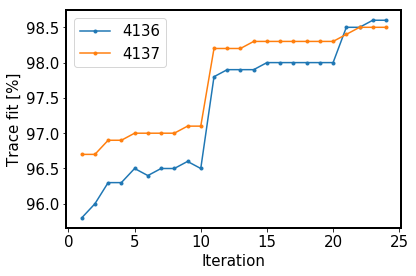

In [10]:
p07.inv.out.functional.Plot()

### Command history

In [226]:
# p07.inv.grad.it[3].fname

In [3]:
# p07.inv.out.Plot(recover=0)

In [189]:
# p07.inv.out.Prepare()

In [136]:
# p07.inv.inp.Plot(save=0)

In [140]:
# p07.inv.inp.runfile.Cat()
# p07.inv.inp.obser.Split(convert=1) 
# p07.inv.inp.obser.Plot(juxtapose=0)

In [143]:
p07.inv.env.var['dump_dat'] = True
p07.inv.env.var['dump_compare'] = True
# p07.inv.inp.pbs.Create(hours=3, nnodes=1, nprocesses=3, ncpus=12, mem_gb=10, q='general')
# p07.inv.inp.pbs.Cat()
p07.inv.inp.pbs.Create(hours=3, nnodes=1, nprocesses=4, q='general')
p07.inv.inp.pbs.Cat()

Content of  ./p07//inv//inp/p07i-Run.pbs : 
#!/bin/bash

##
# This script is supposed to be run in a 'project/out/' directory
# and a directory 'project/inp/' must exist too.
#
# For more explanation, see lib_fwi_generic.py/PBS_File_Write_Header.
#
##

#PBS -N p07i
#PBS -o p07i-Out.log
#PBS -e p07i-Err.log
#PBS -l walltime=03:00:00
#PBS -l select=1:mpiprocs=4:ompthreads=8:ncpus=32:mem=62gb
#PBS -l place=scatter:excl

# PROJECT INFO
project_name=p07i

# PATHS
code_path=/rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'path to the code-executable: '${code_path}
this_dir=$PBS_O_WORKDIR
work_dir=$TMPDIR

# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RUNNING ON A WHOLE NODE) 

# ARGUMENTS OF fullwave3D.exe
CPNUM=-1
NTHREAD=8 # EQUAL TO ompthreads

# FULLWAVE'S ENVIRONMENTAL VARIABLES
export SCHEDULER_DUMPGRAD="yes"
export SCHEDULER_DUMPPREC="yes"
export SCHEDULER_DUMPRAWGRAD

In [323]:
# p7.inv.inp.Check()

In [592]:
# p7.inv.out.Init_Subproject(0, timespace=timespace, plot=0)
# p7.inv.out.p7i_synCP

In [ ]:
# p7.inv.out.Prepare(timestamp=0)

In [582]:
# p7.inv.out.Plot(plot_functional=1, plot_mod_it=1, recover_only=0, save=1)

In [94]:
# p7.inv.vp.it[20].Plot(xyz=[25,25,25], nx=201)

In [133]:
# !ls {p7.inv.inp.obser.path} -lth

# p08 (inv synth. LVZ)

In [162]:
proj8 = Proj_Inv_Synth('proj8', io='sgy', equation='acoustic', geometry='sgy', verbos=0)

Proj_Inv.Set_Iterations: Total no. of inversion iterations: 20
No. of OBSes within the box: 55
List of OBSes within the box: ['145', '144', '147', '146', '141', '140', '143', '142', '138', '139', '130', '131', '136', '137', '129', '128', '123', '127', '126', '125', '124', '117', '114', '115', '112', '113', '110', '188', '181', '180', '183', '182', '185', '184', '186', '105', '104', '107', '106', '109', '108', '176', '177', '178', '179', '167', '166', '165', '164', '163', '162', '161', '160', '157', '158']


[1201, 401, 101]

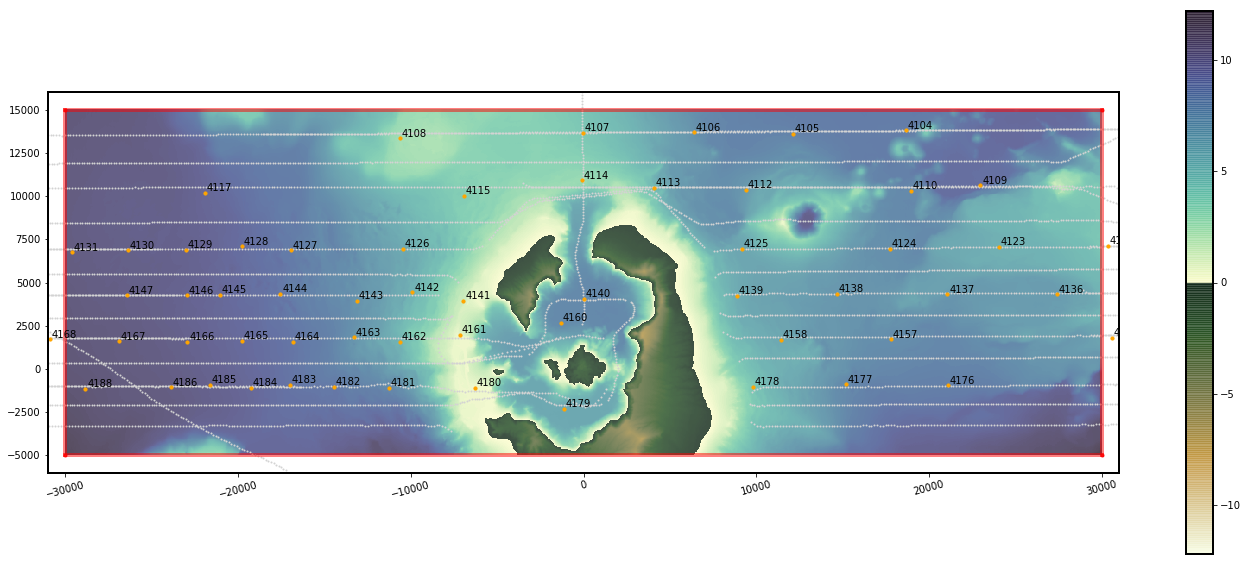

In [163]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = -3e4     
x2 = +3e4    
y1 = -5e3    
y2 = 15e3    
z1 = 0 # CUT AT THE SEA SURFACE
z2 = 5000    
box = [x1, x2, y1, y2, z1, z2]

blocks = [
    Iteration_Block(freq=3.0, niters=10, minoff=2000, maxoff=20000),
    Iteration_Block(freq=4.0, niters=5, minoff=2000, maxoff=20000),
    Iteration_Block(freq=5.0, niters=5, minoff=2000, maxoff=20000)
]

proj8.Set_Iterations(blocks)

proj8.Set_Geometry(box=box, dt=dt, ns=ns)
proj8.Plot_Geometry(lims_pad=1000, s_factor=1) 
proj8.dims

In [44]:
file2dupl = 'Ben_whole_model_24-04-18_x-30000_30000_y-5000_15000.sgy'
proj8.vp.true.Duplicate(file2dupl, dupl_cmd='cp', z_origin=-1500.0, dims=[1201, 401, 131], verbos=0)
proj8.vp.true.Resize()

Duplicate: Conversion sgy2vtr switched off
lib_generic.py/Bash2: Warning. Non-empty stderr of the command su_wind_xyz.sh sx -30000.0 30000.0 sy -5000.0 15000.0 30 130 proj8-TrueVp.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00603357 s, 530 kB/s
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00207356 s, 1.5 MB/s


lib_fwi_generic_PLOTT.py/Plot_sgy:  Converting sgy2vtr for file: proj8-TrueVp.sgy


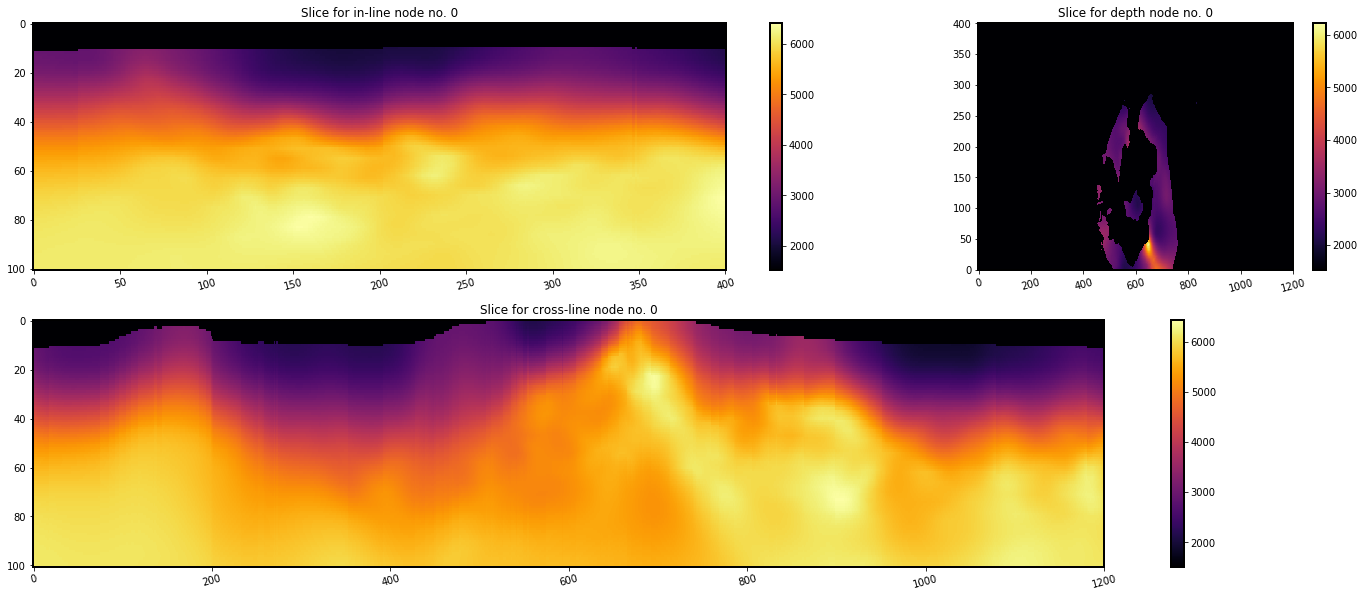

In [46]:
proj8.vp.true.Plot(nx=1201)

In [174]:
proj8.vp.true.Create_Anomaly(anom_type='spheres', centres=[[600, 200, 70]], radii=[20], amps=[-200])

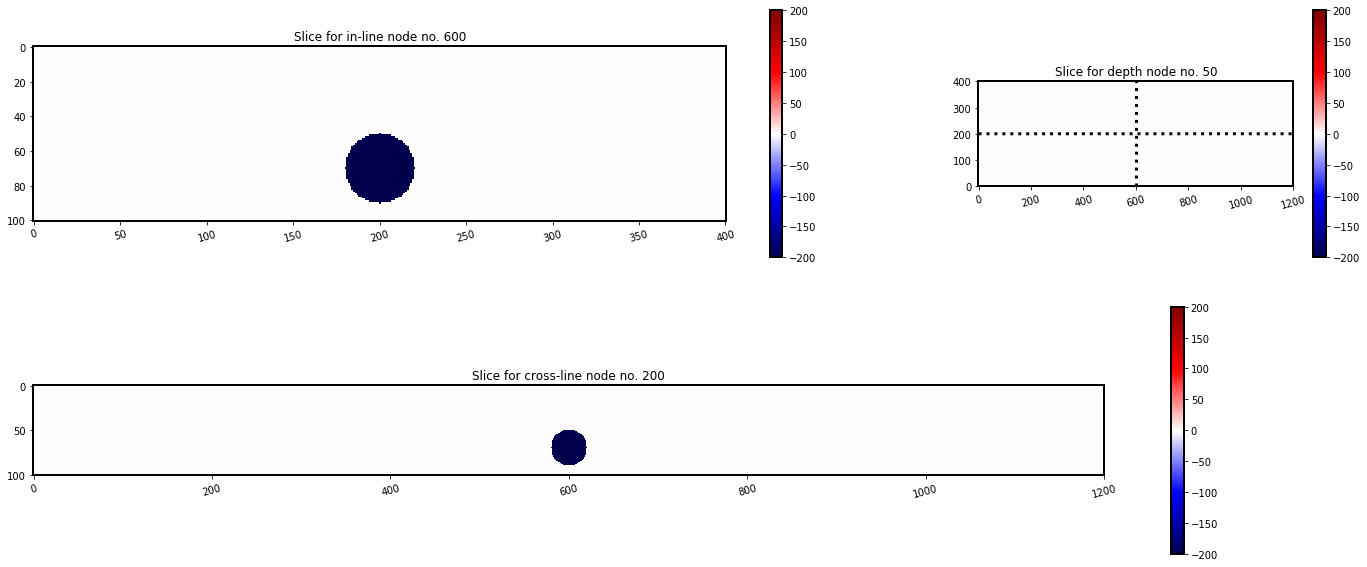

In [175]:
proj8.vp.true.anom.Plot(xyz=[600, 200, 50], aspect='equal')

In [183]:
proj8.vp.true.Add_Anomaly(ampl_type='absolute', nx=1201)

Add_Anomaly: model proj8-StartVp.sgy exists => copying it to proj8-TrueVp.sgy
Add_Anomaly: Converting to sgy with convert_vtr2sgy.sh...


lib_fwi_generic_PLOTT.py/Plot_sgy:  Converting sgy2vtr for file: proj8-TrueVp.sgy


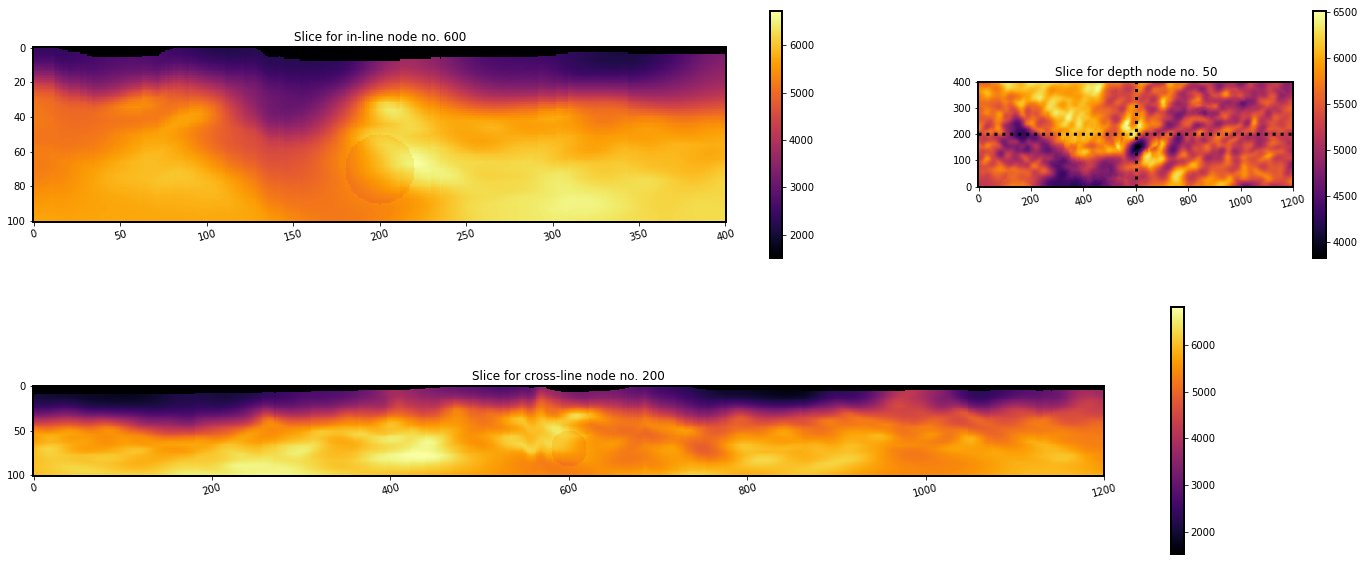

In [184]:
proj8.vp.true.Plot(xyz=[600, 200, 50], aspect='equal', nx=1201)

lib_fwi_generic_PLOTT.py/Plot_sgy:  Converting sgy2vtr for file: proj8-StartVp.sgy


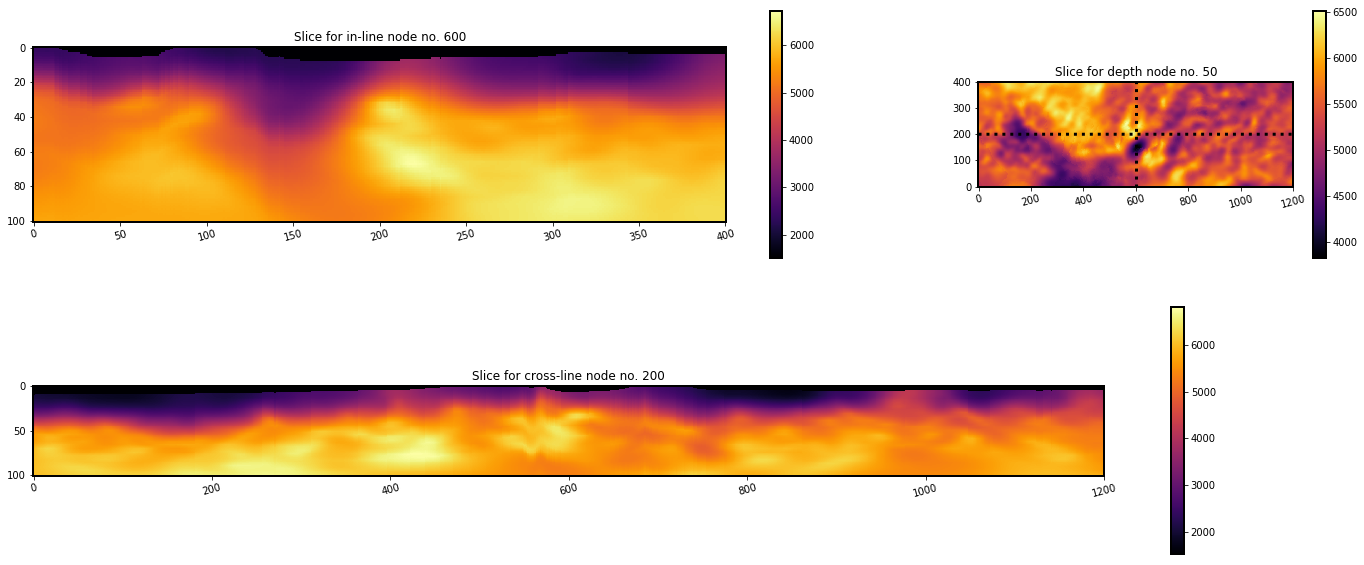

In [185]:
proj8.vp.start.Plot(xyz=[600, 200, 50], aspect='equal', nx=1201)

In [136]:
# proj8.vp.true.Animate(i_step=1, delay=1)

lib_generic.py/Bash2: Warning. Non-empty stderr of the command su_ricker.sh proj8 3.0 0.0025 2000: 
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00205251 s, 1.6 MB/s
lib_fwi_generic_PLOTT.py/Plot_sgy: Plotting proj8-RawSign.vtr found in ./. Provide nx to convert sgy (nx of proj8-RawSign.vtr is 1).
lib_fwi_generic_PLOTT.py/Plot_sgy: Plotting proj8-RawSign.vtr found in ./. Provide nx to convert sgy (nx of proj8-RawSign.vtr is 1).


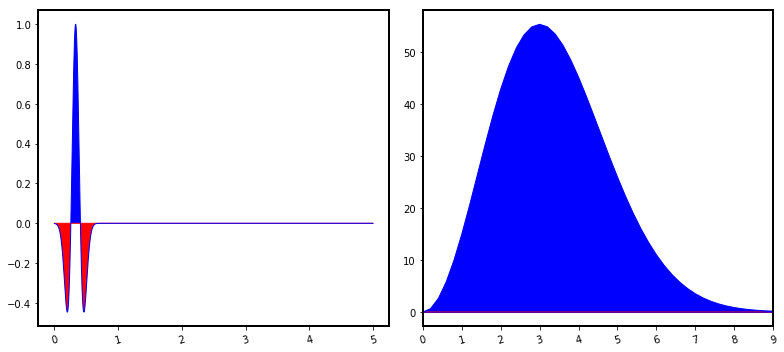

In [190]:
proj8.inp.wavelet.Create()
proj8.inp.wavelet.Plot()

In [195]:
# proj8.inp.rawseis.Create()
# proj8.inp.rawseis.Cat()

In [194]:
proj8.inp.sp.Create(reciprocity=1)
proj8.inp.sp.Cat()
# !fwi_run_segyprep.sh proj8

y origin : -5000.0
fixed array : yes
dtms : 2.5
io api : sgy
nx1 : 1201
nx3 : 101
nx2 : 401
z type : elevation
reciprocity : 1
text : yes
ttime : 5000.0
x shift : 0
y shift : 0
dx : 50
unique : yes
FFID : yes
x origin : -30000.0
geometry : segy
debug : yes
retain : yes
problem : both
outseis : yes


fwi_run_segyprep.sh: START

Overwrite the TrueVp.vtr model? no

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to proj8
 Preparing files for synthetics...
 Preparing files for inversion...

 Grid points in-line:                   1201
 Grid points cross-line:                 401
 Grid points vertically:                 101
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            60000.0000    
 Model width (metres):             20000.0000    
 Model depth (metres):             5000.00000    

 Model

In [196]:
proj8.inp.runfile.Create(b_abs=2, e_abs=10, verbos=0)
proj8.inp.runfile.Cat()

Content of  proj8-Runfile_synth.key : 
! A. PROBLEM DEFINITION
 problem       : synthetic
 domain        : time
 dim           : 3D
 equation      : acoustic
 units         : metric
 anisotropy    : none
 kernel        : low
! B. MODEL DEFINITON
NX1 : 1201
NX2 : 401
NX3 : 101
 DX            : 50.0
etime : 5.0
! X. FREE SURFACE
ibfs : 0
seaLevel : 0
 maxGhostIter  : 2
 vacuum        : 0
 accuracy      : 0.001
 minGhostFS    : 0.001
 minFictFS     : 0.5
 interpMode    : 1
 srcType       : 0
 recType       : 0
! C. DATA DEFINITION
NCOMP : 55
NSHOTS : 55
NRECS : 5401
MAXRC : 5401
 MAXPS         : 1
io : SEGY
! D. BOUNDARY CONDITIONS
 btop          : 0
bbot : 2
bleft : 2
bright : 2
bfront : 2
bback : 2
 extratop      : 0
extrabot : 10
extraleft : 10
extraright : 10
extrafront : 10
extraback : 10
! F. INVERSION PARAMATERS (copied from Jo!!!)
 Slowness               : yes
 Normalise              : yes
 Amplitude              : no
 Spatial                : no
 Global Gaussian Width  : 0
 SMOOT

In [197]:
proj8.inp.outseis.Split()
# proj8.inp.outseis.Files()
# proj8.inp.outseis.split['4136']['27'].Plot()

lib_generic.py/Bash2: Warning. Non-empty stderr of the command su_supergather_split_stations_n_lines.sh tracf ep proj8-OutSeis.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569257 s, 562 kB/s

segyread: discrepant tr.ns = 12000 with tape/user ns = 2000
	... first noted on trace 1

segyread: discrepancy found in header and trace ns values
the value (2000) was used to extract traces
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553939 s, 578 kB/s

segyread: discrepant tr.ns = 12000 with tape/user ns = 2000
	... first noted on trace 1
6+1 records in
1+0 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00207674 s, 1.5 MB/s

segyread: discrepancy found in header and trace ns values
the value (2000) was used to extract traces
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545034 s, 587 kB/s

segyread: discrepant tr.ns = 12000 with tape/user ns = 2000
	... first noted on trace 1
6+1 records in
1+0 re

Gather_File: converting proj8-OutSeis_4188_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484422 s, 661 kB/s


Gather_File: converting proj8-OutSeis_4188_11.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00584022 s, 548 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00443645 s, 721 kB/s


Gather_File: converting proj8-OutSeis_4188_17.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458424 s, 698 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00436951 s, 732 kB/s


Gather_File: converting proj8-OutSeis_4188_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473744 s, 675 kB/s


Gather_File: converting proj8-OutSeis_4188_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00429588 s, 745 kB/s


Gather_File: converting proj8-OutSeis_4188_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00564098 s, 567 kB/s


Gather_File: converting proj8-OutSeis_4188_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0049406 s, 648 kB/s


Gather_File: converting proj8-OutSeis_4188_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454027 s, 705 kB/s


Gather_File: converting proj8-OutSeis_4188_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00437364 s, 732 kB/s


Gather_File: converting proj8-OutSeis_4188_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453199 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4188_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637653 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4188_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00479474 s, 667 kB/s


Gather_File: converting proj8-OutSeis_4188_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640013 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4188_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00446379 s, 717 kB/s


Gather_File: converting proj8-OutSeis_4188_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00604059 s, 530 kB/s


Gather_File: converting proj8-OutSeis_4188_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0411647 s, 77.7 kB/s


Gather_File: converting proj8-OutSeis_4188_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00528934 s, 605 kB/s


Gather_File: converting proj8-OutSeis_4188_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00479866 s, 667 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464625 s, 689 kB/s


Gather_File: converting proj8-OutSeis_4188_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00583457 s, 548 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448752 s, 713 kB/s


Gather_File: converting proj8-OutSeis_4188_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00528754 s, 605 kB/s


Gather_File: converting proj8-OutSeis_4188_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639343 s, 501 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00432811 s, 739 kB/s


Gather_File: converting proj8-OutSeis_4188_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520515 s, 615 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430269 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4188_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00426132 s, 751 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0047339 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4188_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458792 s, 697 kB/s


Gather_File: converting proj8-OutSeis_4188_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0045957 s, 696 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561309 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4188_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4188_57.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00563502 s, 568 kB/s



Gather_File: converting proj8-OutSeis_4188_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0113645 s, 282 kB/s


Gather_File: converting proj8-OutSeis_4188_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473253 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4188_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00413129 s, 775 kB/s


Gather_File: converting proj8-OutSeis_4188_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4188_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00526106 s, 608 kB/s


Gather_File: converting proj8-OutSeis_4181_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046356 s, 690 kB/s


Gather_File: converting proj8-OutSeis_4181_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473702 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4181_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489308 s, 654 kB/s


Gather_File: converting proj8-OutSeis_4181_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0044745 s, 715 kB/s


Gather_File: converting proj8-OutSeis_4181_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00404886 s, 790 kB/s


Gather_File: converting proj8-OutSeis_4181_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00475549 s, 673 kB/s


Gather_File: converting proj8-OutSeis_4181_20.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00500974 s, 639 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00424265 s, 754 kB/s


Gather_File: converting proj8-OutSeis_4181_22.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592743 s, 540 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448809 s, 713 kB/s


Gather_File: converting proj8-OutSeis_4181_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0039839 s, 803 kB/s


Gather_File: converting proj8-OutSeis_4181_25.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461453 s, 693 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464749 s, 689 kB/s


Gather_File: converting proj8-OutSeis_4181_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517201 s, 619 kB/s


Gather_File: converting proj8-OutSeis_4181_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454187 s, 705 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00446363 s, 717 kB/s


Gather_File: converting proj8-OutSeis_4181_29.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593611 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4181_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00432016 s, 741 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453445 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4181_32.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452907 s, 707 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00444518 s, 720 kB/s


Gather_File: converting proj8-OutSeis_4181_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_35.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594812 s, 538 kB/s



Gather_File: converting proj8-OutSeis_4181_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00538926 s, 594 kB/s


Gather_File: converting proj8-OutSeis_4181_37.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00467282 s, 685 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00438311 s, 730 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00521768 s, 613 kB/s


Gather_File: converting proj8-OutSeis_4181_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560557 s, 571 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00557521 s, 574 kB/s


Gather_File: converting proj8-OutSeis_4181_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00501008 s, 639 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00462505 s, 692 kB/s


Gather_File: converting proj8-OutSeis_4181_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00501873 s, 638 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00540705 s, 592 kB/s


Gather_File: converting proj8-OutSeis_4181_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00419612 s, 763 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00439904 s, 727 kB/s


Gather_File: converting proj8-OutSeis_4181_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4181_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00420809 s, 760 kB/s


Gather_File: converting proj8-OutSeis_4181_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00528075 s, 606 kB/s


Gather_File: converting proj8-OutSeis_4181_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00455419 s, 703 kB/s


Gather_File: converting proj8-OutSeis_4181_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4181_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0049514 s, 646 kB/s


Gather_File: converting proj8-OutSeis_4141_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658492 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4141_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006746 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4141_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00434127 s, 737 kB/s


Gather_File: converting proj8-OutSeis_4141_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0074513 s, 429 kB/s


Gather_File: converting proj8-OutSeis_4141_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00414428 s, 772 kB/s


Gather_File: converting proj8-OutSeis_4141_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457726 s, 699 kB/s


Gather_File: converting proj8-OutSeis_4141_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00446861 s, 716 kB/s


Gather_File: converting proj8-OutSeis_4141_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.054167 s, 59.1 kB/s


Gather_File: converting proj8-OutSeis_4141_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442095 s, 724 kB/s


Gather_File: converting proj8-OutSeis_4141_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00426994 s, 749 kB/s


Gather_File: converting proj8-OutSeis_4141_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452849 s, 707 kB/s


Gather_File: converting proj8-OutSeis_4141_25.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4141_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00424587 s, 754 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0044091 s, 726 kB/s


Gather_File: converting proj8-OutSeis_4141_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00477065 s, 671 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046963 s, 681 kB/s


Gather_File: converting proj8-OutSeis_4141_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4141_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00578367 s, 553 kB/s


Gather_File: converting proj8-OutSeis_4141_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442174 s, 724 kB/s


Gather_File: converting proj8-OutSeis_4141_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448307 s, 714 kB/s


Gather_File: converting proj8-OutSeis_4141_32.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4141_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00573172 s, 558 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448623 s, 713 kB/s


Gather_File: converting proj8-OutSeis_4141_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00727105 s, 440 kB/s


Gather_File: converting proj8-OutSeis_4141_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469556 s, 681 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00505578 s, 633 kB/s


Gather_File: converting proj8-OutSeis_4141_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4141_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545316 s, 587 kB/s


Gather_File: converting proj8-OutSeis_4141_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00436608 s, 733 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0045107 s, 709 kB/s


Gather_File: converting proj8-OutSeis_4141_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4141_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448339 s, 714 kB/s


Gather_File: converting proj8-OutSeis_4141_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00494079 s, 648 kB/s


Gather_File: converting proj8-OutSeis_4141_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00470353 s, 680 kB/s


Gather_File: converting proj8-OutSeis_4141_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00707069 s, 453 kB/s


Gather_File: converting proj8-OutSeis_4141_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00736533 s, 434 kB/s


Gather_File: converting proj8-OutSeis_4141_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652787 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4141_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648235 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4141_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594991 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4141_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642827 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4141_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576234 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4141_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642944 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4141_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4141_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430317 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4183_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00402204 s, 796 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00449334 s, 712 kB/s


Gather_File: converting proj8-OutSeis_4183_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576695 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4183_16.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00433899 s, 737 kB/s


Gather_File: converting proj8-OutSeis_4183_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0042738 s, 749 kB/s


Gather_File: converting proj8-OutSeis_4183_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458685 s, 698 kB/s


Gather_File: converting proj8-OutSeis_4183_20.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00518403 s, 617 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556859 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4183_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451665 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4183_23.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004363 s, 733 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00649241 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4183_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00481304 s, 665 kB/s


Gather_File: converting proj8-OutSeis_4183_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0636072 s, 50.3 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00514045 s, 623 kB/s


Gather_File: converting proj8-OutSeis_4183_27.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430031 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4183_29.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476105 s, 672 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451596 s, 709 kB/s


Gather_File: converting proj8-OutSeis_4183_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561152 s, 570 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452024 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4183_32.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458418 s, 698 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456973 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4183_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00677458 s, 472 kB/s


Gather_File: converting proj8-OutSeis_4183_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00490787 s, 652 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.010447 s, 306 kB/s


Gather_File: converting proj8-OutSeis_4183_37.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00420368 s, 761 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00441207 s, 725 kB/s


Gather_File: converting proj8-OutSeis_4183_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00409504 s, 781 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569023 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4183_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00479292 s, 668 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00413125 s, 775 kB/s


Gather_File: converting proj8-OutSeis_4183_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00400567 s, 799 kB/s


Gather_File: converting proj8-OutSeis_4183_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655687 s, 488 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00423546 s, 756 kB/s


Gather_File: converting proj8-OutSeis_4183_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4183_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453248 s, 706 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00467977 s, 684 kB/s


Gather_File: converting proj8-OutSeis_4183_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00488731 s, 655 kB/s


Gather_File: converting proj8-OutSeis_4183_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00524901 s, 610 kB/s


Gather_File: converting proj8-OutSeis_4183_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4183_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00419418 s, 763 kB/s


Gather_File: converting proj8-OutSeis_4182_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00455448 s, 703 kB/s


Gather_File: converting proj8-OutSeis_4182_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00524048 s, 611 kB/s


Gather_File: converting proj8-OutSeis_4182_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00601216 s, 532 kB/s


Gather_File: converting proj8-OutSeis_4182_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457271 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4182_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629911 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4182_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465726 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4182_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473349 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4182_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562197 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4182_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457422 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4182_23.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606503 s, 528 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00455257 s, 703 kB/s


Gather_File: converting proj8-OutSeis_4182_25.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00447005 s, 716 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00695603 s, 460 kB/s


Gather_File: converting proj8-OutSeis_4182_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442556 s, 723 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0039947 s, 801 kB/s


Gather_File: converting proj8-OutSeis_4182_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464146 s, 689 kB/s


Gather_File: converting proj8-OutSeis_4182_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00494994 s, 646 kB/s


Gather_File: converting proj8-OutSeis_4182_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461326 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4182_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0043291 s, 739 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00502866 s, 636 kB/s


Gather_File: converting proj8-OutSeis_4182_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622452 s, 514 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00501123 s, 639 kB/s


Gather_File: converting proj8-OutSeis_4182_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00446234 s, 717 kB/s


Gather_File: converting proj8-OutSeis_4182_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625557 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4182_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00889392 s, 360 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461969 s, 693 kB/s


Gather_File: converting proj8-OutSeis_4182_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00434302 s, 737 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460186 s, 695 kB/s


Gather_File: converting proj8-OutSeis_4182_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00429821 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4182_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00554281 s, 577 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0052676 s, 607 kB/s


Gather_File: converting proj8-OutSeis_4182_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00547401 s, 585 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00431898 s, 741 kB/s


Gather_File: converting proj8-OutSeis_4182_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00474423 s, 675 kB/s


Gather_File: converting proj8-OutSeis_4182_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00696667 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4182_7.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4182_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520422 s, 615 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590341 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4182_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4182_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00387754 s, 825 kB/s


Gather_File: converting proj8-OutSeis_4185_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00534414 s, 599 kB/s


Gather_File: converting proj8-OutSeis_4185_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0289375 s, 111 kB/s


Gather_File: converting proj8-OutSeis_4185_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520235 s, 615 kB/s


Gather_File: converting proj8-OutSeis_4185_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476503 s, 672 kB/s


Gather_File: converting proj8-OutSeis_4185_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00411954 s, 777 kB/s


Gather_File: converting proj8-OutSeis_4185_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00437572 s, 731 kB/s


Gather_File: converting proj8-OutSeis_4185_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00478271 s, 669 kB/s


Gather_File: converting proj8-OutSeis_4185_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00501438 s, 638 kB/s


Gather_File: converting proj8-OutSeis_4185_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465873 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4185_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00532624 s, 601 kB/s


Gather_File: converting proj8-OutSeis_4185_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046359 s, 690 kB/s


Gather_File: converting proj8-OutSeis_4185_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00423325 s, 756 kB/s


Gather_File: converting proj8-OutSeis_4185_26.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00447159 s, 716 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00525045 s, 609 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0050581 s, 633 kB/s


Gather_File: converting proj8-OutSeis_4185_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520673 s, 615 kB/s


Gather_File: converting proj8-OutSeis_4185_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0041319 s, 774 kB/s


Gather_File: converting proj8-OutSeis_4185_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00503033 s, 636 kB/s


Gather_File: converting proj8-OutSeis_4185_32.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576103 s, 555 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00428855 s, 746 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00505612 s, 633 kB/s


Gather_File: converting proj8-OutSeis_4185_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556912 s, 575 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451836 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4185_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0509864 s, 62.8 kB/s


Gather_File: converting proj8-OutSeis_4185_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00421452 s, 759 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451981 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4185_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_41.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00463067 s, 691 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00441228 s, 725 kB/s



Gather_File: converting proj8-OutSeis_4185_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593892 s, 539 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00462511 s, 692 kB/s


Gather_File: converting proj8-OutSeis_4185_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00730565 s, 438 kB/s


Gather_File: converting proj8-OutSeis_4185_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00416527 s, 768 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0056257 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4185_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4185_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00523255 s, 612 kB/s


Gather_File: converting proj8-OutSeis_4185_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046098 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4185_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005372 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4185_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00435566 s, 735 kB/s


Gather_File: converting proj8-OutSeis_4185_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4185_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00498928 s, 641 kB/s


Gather_File: converting proj8-OutSeis_4184_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00947185 s, 338 kB/s


Gather_File: converting proj8-OutSeis_4184_11.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430256 s, 744 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00522176 s, 613 kB/s


Gather_File: converting proj8-OutSeis_4184_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637578 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4184_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453171 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4184_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00443706 s, 721 kB/s


Gather_File: converting proj8-OutSeis_4184_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00816307 s, 392 kB/s


Gather_File: converting proj8-OutSeis_4184_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00542445 s, 590 kB/s


Gather_File: converting proj8-OutSeis_4184_22.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472876 s, 677 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00462302 s, 692 kB/s


Gather_File: converting proj8-OutSeis_4184_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00401728 s, 797 kB/s


Gather_File: converting proj8-OutSeis_4184_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457302 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4184_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00524587 s, 610 kB/s


Gather_File: converting proj8-OutSeis_4184_27.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00482174 s, 664 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00475114 s, 674 kB/s


Gather_File: converting proj8-OutSeis_4184_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00444681 s, 720 kB/s


Gather_File: converting proj8-OutSeis_4184_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642691 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4184_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004718 s, 678 kB/s


Gather_File: converting proj8-OutSeis_4184_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051133 s, 626 kB/s


Gather_File: converting proj8-OutSeis_4184_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633051 s, 505 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00584317 s, 548 kB/s


Gather_File: converting proj8-OutSeis_4184_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00506719 s, 632 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00487643 s, 656 kB/s


Gather_File: converting proj8-OutSeis_4184_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469988 s, 681 kB/s


Gather_File: converting proj8-OutSeis_4184_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469359 s, 682 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00521873 s, 613 kB/s


Gather_File: converting proj8-OutSeis_4184_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442926 s, 722 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00500397 s, 639 kB/s


Gather_File: converting proj8-OutSeis_4184_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_5.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0045476 s, 704 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457645 s, 699 kB/s



Gather_File: converting proj8-OutSeis_4184_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00400487 s, 799 kB/s


Gather_File: converting proj8-OutSeis_4184_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4184_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0314721 s, 102 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469434 s, 682 kB/s


Gather_File: converting proj8-OutSeis_4184_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00566905 s, 564 kB/s


Gather_File: converting proj8-OutSeis_4184_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00705837 s, 453 kB/s


Gather_File: converting proj8-OutSeis_4184_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548784 s, 583 kB/s


Gather_File: converting proj8-OutSeis_4184_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004354 s, 735 kB/s


Gather_File: converting proj8-OutSeis_4184_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4184_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00463444 s, 690 kB/s


Gather_File: converting proj8-OutSeis_4140_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00702129 s, 456 kB/s


Gather_File: converting proj8-OutSeis_4140_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00737241 s, 434 kB/s


Gather_File: converting proj8-OutSeis_4140_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00664623 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4140_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00418668 s, 764 kB/s


Gather_File: converting proj8-OutSeis_4140_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00435079 s, 735 kB/s


Gather_File: converting proj8-OutSeis_4140_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618918 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4140_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00416922 s, 768 kB/s


Gather_File: converting proj8-OutSeis_4140_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469959 s, 681 kB/s


Gather_File: converting proj8-OutSeis_4140_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00503074 s, 636 kB/s


Gather_File: converting proj8-OutSeis_4140_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00493245 s, 649 kB/s


Gather_File: converting proj8-OutSeis_4140_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644802 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4140_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660136 s, 485 kB/s


Gather_File: converting proj8-OutSeis_4140_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00503459 s, 636 kB/s


Gather_File: converting proj8-OutSeis_4140_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654269 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4140_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626245 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4140_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638465 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4140_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055099 s, 581 kB/s


Gather_File: converting proj8-OutSeis_4140_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0038567 s, 830 kB/s


Gather_File: converting proj8-OutSeis_4140_32.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4140_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00575944 s, 556 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586441 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4140_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00423299 s, 756 kB/s


Gather_File: converting proj8-OutSeis_4140_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00628277 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4140_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4140_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599316 s, 534 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556255 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4140_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548744 s, 583 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00500734 s, 639 kB/s


Gather_File: converting proj8-OutSeis_4140_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4140_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00422491 s, 757 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00930252 s, 344 kB/s


Gather_File: converting proj8-OutSeis_4140_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4140_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00758377 s, 422 kB/s


Gather_File: converting proj8-OutSeis_4140_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613522 s, 522 kB/s


Gather_File: converting proj8-OutSeis_4140_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626504 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4140_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652314 s, 491 kB/s


Gather_File: converting proj8-OutSeis_4140_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4140_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00720302 s, 444 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0083101 s, 385 kB/s


Gather_File: converting proj8-OutSeis_4140_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00508328 s, 630 kB/s


Gather_File: converting proj8-OutSeis_4140_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684426 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4140_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00445475 s, 718 kB/s


Gather_File: converting proj8-OutSeis_4140_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4140_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00687664 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4105_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00685933 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4105_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466423 s, 686 kB/s


Gather_File: converting proj8-OutSeis_4105_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00491531 s, 651 kB/s


Gather_File: converting proj8-OutSeis_4105_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00515753 s, 620 kB/s


Gather_File: converting proj8-OutSeis_4105_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581051 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4105_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602383 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4105_20.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00441958 s, 724 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00527315 s, 607 kB/s


Gather_File: converting proj8-OutSeis_4105_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00718218 s, 446 kB/s


Gather_File: converting proj8-OutSeis_4105_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00566813 s, 565 kB/s


Gather_File: converting proj8-OutSeis_4105_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00555988 s, 576 kB/s


Gather_File: converting proj8-OutSeis_4105_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626116 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4105_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617908 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4105_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666866 s, 480 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460939 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4105_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621346 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4105_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0295687 s, 108 kB/s


Gather_File: converting proj8-OutSeis_4105_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00729477 s, 439 kB/s


Gather_File: converting proj8-OutSeis_4105_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00612077 s, 523 kB/s


Gather_File: converting proj8-OutSeis_4105_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589673 s, 543 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617788 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4105_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586712 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4105_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666087 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4105_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00627209 s, 510 kB/s


Gather_File: converting proj8-OutSeis_4105_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00706256 s, 453 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456165 s, 702 kB/s


Gather_File: converting proj8-OutSeis_4105_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00421717 s, 759 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466025 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4105_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665827 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4105_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00756295 s, 423 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00574969 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4105_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00421995 s, 758 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00501409 s, 638 kB/s


Gather_File: converting proj8-OutSeis_4105_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4105_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635245 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4105_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00864749 s, 370 kB/s


Gather_File: converting proj8-OutSeis_4105_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0052361 s, 611 kB/s


Gather_File: converting proj8-OutSeis_4105_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655127 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4105_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4105_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00506574 s, 632 kB/s


Gather_File: converting proj8-OutSeis_4104_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606105 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4104_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0074418 s, 430 kB/s


Gather_File: converting proj8-OutSeis_4104_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595987 s, 537 kB/s


Gather_File: converting proj8-OutSeis_4104_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594708 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4104_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00573996 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4104_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613935 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4104_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00704218 s, 454 kB/s


Gather_File: converting proj8-OutSeis_4104_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00535549 s, 598 kB/s


Gather_File: converting proj8-OutSeis_4104_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596551 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4104_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00711802 s, 450 kB/s


Gather_File: converting proj8-OutSeis_4104_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657802 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4104_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593628 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4104_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560928 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4104_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00762325 s, 420 kB/s


Gather_File: converting proj8-OutSeis_4104_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4104_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00631671 s, 507 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626792 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4104_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560985 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4104_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0068153 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4104_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0063217 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4104_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4104_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489644 s, 654 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00735296 s, 435 kB/s


Gather_File: converting proj8-OutSeis_4104_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00534819 s, 598 kB/s


Gather_File: converting proj8-OutSeis_4104_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00510825 s, 626 kB/s


Gather_File: converting proj8-OutSeis_4104_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00559733 s, 572 kB/s


Gather_File: converting proj8-OutSeis_4104_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682142 s, 469 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452142 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4104_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4104_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00413131 s, 775 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0061851 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4104_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4104_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0042901 s, 746 kB/s


Gather_File: converting proj8-OutSeis_4104_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00522555 s, 612 kB/s


Gather_File: converting proj8-OutSeis_4104_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4104_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00540986 s, 592 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597411 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4104_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0070466 s, 454 kB/s


Gather_File: converting proj8-OutSeis_4104_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600441 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4104_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600008 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4104_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00748761 s, 427 kB/s


Gather_File: converting proj8-OutSeis_4104_8.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4104_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00574125 s, 557 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4104_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655626 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4107_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0039239 s, 816 kB/s


Gather_File: converting proj8-OutSeis_4107_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579749 s, 552 kB/s


Gather_File: converting proj8-OutSeis_4107_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00765553 s, 418 kB/s


Gather_File: converting proj8-OutSeis_4107_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644713 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4107_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00623213 s, 513 kB/s


Gather_File: converting proj8-OutSeis_4107_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00779265 s, 411 kB/s


Gather_File: converting proj8-OutSeis_4107_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597519 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4107_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592439 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4107_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00623778 s, 513 kB/s


Gather_File: converting proj8-OutSeis_4107_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0065799 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4107_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00478727 s, 668 kB/s


Gather_File: converting proj8-OutSeis_4107_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00577633 s, 554 kB/s


Gather_File: converting proj8-OutSeis_4107_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652634 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4107_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00649619 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4107_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430359 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4107_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667349 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4107_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00754304 s, 424 kB/s


Gather_File: converting proj8-OutSeis_4107_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646177 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4107_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00941602 s, 340 kB/s


Gather_File: converting proj8-OutSeis_4107_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621238 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4107_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00463032 s, 691 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00505528 s, 633 kB/s


Gather_File: converting proj8-OutSeis_4107_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4107_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4107_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00459893 s, 696 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0040811 s, 784 kB/s


Gather_File: converting proj8-OutSeis_4107_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581571 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4107_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684743 s, 467 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00694678 s, 461 kB/s


Gather_File: converting proj8-OutSeis_4107_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4107_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00497926 s, 643 kB/s


Gather_File: converting proj8-OutSeis_4107_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0059555 s, 537 kB/s


Gather_File: converting proj8-OutSeis_4107_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606328 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4107_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00566897 s, 564 kB/s


Gather_File: converting proj8-OutSeis_4107_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00825076 s, 388 kB/s


Gather_File: converting proj8-OutSeis_4107_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537441 s, 595 kB/s


Gather_File: converting proj8-OutSeis_4107_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00441236 s, 725 kB/s


Gather_File: converting proj8-OutSeis_4107_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00762555 s, 420 kB/s


Gather_File: converting proj8-OutSeis_4107_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00715516 s, 447 kB/s


Gather_File: converting proj8-OutSeis_4107_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051315 s, 624 kB/s


Gather_File: converting proj8-OutSeis_4107_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4107_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00558886 s, 573 kB/s


Gather_File: converting proj8-OutSeis_4106_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657846 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4106_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472413 s, 677 kB/s


Gather_File: converting proj8-OutSeis_4106_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602214 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4106_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595203 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4106_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00712354 s, 449 kB/s


Gather_File: converting proj8-OutSeis_4106_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00609201 s, 525 kB/s


Gather_File: converting proj8-OutSeis_4106_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667874 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4106_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00627078 s, 510 kB/s


Gather_File: converting proj8-OutSeis_4106_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00696177 s, 460 kB/s


Gather_File: converting proj8-OutSeis_4106_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00399881 s, 800 kB/s


Gather_File: converting proj8-OutSeis_4106_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00393441 s, 813 kB/s


Gather_File: converting proj8-OutSeis_4106_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00734431 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4106_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00714247 s, 448 kB/s


Gather_File: converting proj8-OutSeis_4106_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0071262 s, 449 kB/s


Gather_File: converting proj8-OutSeis_4106_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0059068 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4106_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00710866 s, 450 kB/s


Gather_File: converting proj8-OutSeis_4106_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00577024 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4106_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00729824 s, 438 kB/s


Gather_File: converting proj8-OutSeis_4106_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00683308 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4106_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679823 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4106_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0076609 s, 418 kB/s


Gather_File: converting proj8-OutSeis_4106_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620673 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4106_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00611315 s, 523 kB/s


Gather_File: converting proj8-OutSeis_4106_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005944 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4106_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00656893 s, 487 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00507918 s, 630 kB/s


Gather_File: converting proj8-OutSeis_4106_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4106_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466232 s, 686 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00636225 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4106_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4106_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00709648 s, 451 kB/s


Gather_File: converting proj8-OutSeis_4106_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00737207 s, 434 kB/s


Gather_File: converting proj8-OutSeis_4106_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00534755 s, 598 kB/s


Gather_File: converting proj8-OutSeis_4106_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630889 s, 507 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00527612 s, 607 kB/s


Gather_File: converting proj8-OutSeis_4106_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4106_57.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00703124 s, 455 kB/s



Gather_File: converting proj8-OutSeis_4106_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663941 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4106_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0071738 s, 446 kB/s


Gather_File: converting proj8-OutSeis_4106_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593953 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4106_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4106_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640606 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4109_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00687822 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4109_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00742813 s, 431 kB/s


Gather_File: converting proj8-OutSeis_4109_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00744142 s, 430 kB/s


Gather_File: converting proj8-OutSeis_4109_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006737 s, 475 kB/s


Gather_File: converting proj8-OutSeis_4109_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00701865 s, 456 kB/s


Gather_File: converting proj8-OutSeis_4109_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00720728 s, 444 kB/s


Gather_File: converting proj8-OutSeis_4109_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00702656 s, 455 kB/s


Gather_File: converting proj8-OutSeis_4109_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00726163 s, 441 kB/s


Gather_File: converting proj8-OutSeis_4109_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625273 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4109_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00717984 s, 446 kB/s


Gather_File: converting proj8-OutSeis_4109_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587393 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4109_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00731423 s, 438 kB/s


Gather_File: converting proj8-OutSeis_4109_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00837658 s, 382 kB/s


Gather_File: converting proj8-OutSeis_4109_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00493823 s, 648 kB/s


Gather_File: converting proj8-OutSeis_4109_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0111278 s, 288 kB/s


Gather_File: converting proj8-OutSeis_4109_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0040052 s, 799 kB/s


Gather_File: converting proj8-OutSeis_4109_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00567539 s, 564 kB/s


Gather_File: converting proj8-OutSeis_4109_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00698548 s, 458 kB/s


Gather_File: converting proj8-OutSeis_4109_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00817644 s, 391 kB/s


Gather_File: converting proj8-OutSeis_4109_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622977 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4109_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0067699 s, 473 kB/s


Gather_File: converting proj8-OutSeis_4109_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00703852 s, 455 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00605121 s, 529 kB/s


Gather_File: converting proj8-OutSeis_4109_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4109_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00812209 s, 394 kB/s


Gather_File: converting proj8-OutSeis_4109_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466738 s, 686 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590795 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4109_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4109_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00435739 s, 734 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454819 s, 704 kB/s


Gather_File: converting proj8-OutSeis_4109_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4109_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00653281 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4109_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00505817 s, 633 kB/s


Gather_File: converting proj8-OutSeis_4109_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4109_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638026 s, 502 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668374 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4109_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618813 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4109_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00519461 s, 616 kB/s


Gather_File: converting proj8-OutSeis_4109_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0059826 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4109_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666191 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4109_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00550317 s, 581 kB/s


Gather_File: converting proj8-OutSeis_4109_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4109_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00713251 s, 449 kB/s


Gather_File: converting proj8-OutSeis_4108_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635161 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4108_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00699877 s, 457 kB/s


Gather_File: converting proj8-OutSeis_4108_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00662206 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4108_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570911 s, 561 kB/s


Gather_File: converting proj8-OutSeis_4108_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00699321 s, 458 kB/s


Gather_File: converting proj8-OutSeis_4108_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635274 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4108_20.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4108_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00700748 s, 457 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654015 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4108_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667378 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4108_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485446 s, 659 kB/s


Gather_File: converting proj8-OutSeis_4108_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552026 s, 580 kB/s


Gather_File: converting proj8-OutSeis_4108_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581204 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4108_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562796 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4108_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630933 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4108_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4108_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548143 s, 584 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0068407 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4108_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645587 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4108_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00647921 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4108_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0096507 s, 332 kB/s


Gather_File: converting proj8-OutSeis_4108_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581606 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4108_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060023 s, 533 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00523969 s, 611 kB/s


Gather_File: converting proj8-OutSeis_4108_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4108_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00471021 s, 679 kB/s


Gather_File: converting proj8-OutSeis_4108_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00536916 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4108_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00656091 s, 488 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635556 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4108_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4108_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051055 s, 627 kB/s


Gather_File: converting proj8-OutSeis_4108_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4108_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592243 s, 540 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625392 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4108_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4108_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613972 s, 521 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0052585 s, 609 kB/s


Gather_File: converting proj8-OutSeis_4108_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581761 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4108_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679099 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4108_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00745652 s, 429 kB/s


Gather_File: converting proj8-OutSeis_4108_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548558 s, 583 kB/s


Gather_File: converting proj8-OutSeis_4108_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0074848 s, 428 kB/s


Gather_File: converting proj8-OutSeis_4108_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00615963 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4108_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4108_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00766975 s, 417 kB/s


Gather_File: converting proj8-OutSeis_4142_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641804 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4142_11.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4142_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060112 s, 532 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004316 s, 741 kB/s


Gather_File: converting proj8-OutSeis_4142_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594099 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4142_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00487179 s, 657 kB/s


Gather_File: converting proj8-OutSeis_4142_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640256 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4142_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0306572 s, 104 kB/s


Gather_File: converting proj8-OutSeis_4142_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00727504 s, 440 kB/s


Gather_File: converting proj8-OutSeis_4142_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00572641 s, 559 kB/s


Gather_File: converting proj8-OutSeis_4142_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456498 s, 701 kB/s


Gather_File: converting proj8-OutSeis_4142_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622942 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4142_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589205 s, 543 kB/s


Gather_File: converting proj8-OutSeis_4142_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465889 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4142_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00870516 s, 368 kB/s


Gather_File: converting proj8-OutSeis_4142_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00615879 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4142_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0076143 s, 420 kB/s


Gather_File: converting proj8-OutSeis_4142_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684098 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4142_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657341 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4142_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545987 s, 586 kB/s


Gather_File: converting proj8-OutSeis_4142_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618137 s, 518 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517656 s, 618 kB/s


Gather_File: converting proj8-OutSeis_4142_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4142_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646657 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4142_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00647698 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4142_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00675521 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4142_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484701 s, 660 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00407912 s, 784 kB/s


Gather_File: converting proj8-OutSeis_4142_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4142_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456754 s, 701 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00420838 s, 760 kB/s


Gather_File: converting proj8-OutSeis_4142_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666056 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4142_5.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4142_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00519201 s, 616 kB/s


Gather_File: converting proj8-OutSeis_4142_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0068089 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4142_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00678291 s, 472 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00516631 s, 619 kB/s


Gather_File: converting proj8-OutSeis_4142_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4142_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00550698 s, 581 kB/s


Gather_File: converting proj8-OutSeis_4142_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00624032 s, 513 kB/s


Gather_File: converting proj8-OutSeis_4142_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663502 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4142_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00678801 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4142_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4142_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642377 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4167_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00734695 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4167_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00686345 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4167_16.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00568921 s, 562 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00490331 s, 653 kB/s


Gather_File: converting proj8-OutSeis_4167_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461535 s, 693 kB/s


Gather_File: converting proj8-OutSeis_4167_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004769 s, 671 kB/s


Gather_File: converting proj8-OutSeis_4167_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00547527 s, 584 kB/s


Gather_File: converting proj8-OutSeis_4167_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0047514 s, 673 kB/s


Gather_File: converting proj8-OutSeis_4167_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456845 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4167_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00675019 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4167_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586099 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4167_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00689599 s, 464 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485869 s, 659 kB/s


Gather_File: converting proj8-OutSeis_4167_26.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458166 s, 698 kB/s


Gather_File: converting proj8-OutSeis_4167_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645954 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4167_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00498095 s, 642 kB/s


Gather_File: converting proj8-OutSeis_4167_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453105 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4167_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00450959 s, 710 kB/s


Gather_File: converting proj8-OutSeis_4167_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00719206 s, 445 kB/s


Gather_File: converting proj8-OutSeis_4167_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00738918 s, 433 kB/s


Gather_File: converting proj8-OutSeis_4167_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00742921 s, 431 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00421187 s, 760 kB/s


Gather_File: converting proj8-OutSeis_4167_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587338 s, 545 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060158 s, 532 kB/s


Gather_File: converting proj8-OutSeis_4167_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00475735 s, 673 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00477235 s, 671 kB/s


Gather_File: converting proj8-OutSeis_4167_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00450782 s, 710 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570295 s, 561 kB/s


Gather_File: converting proj8-OutSeis_4167_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00486421 s, 658 kB/s


Gather_File: converting proj8-OutSeis_4167_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00614632 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4167_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00715045 s, 448 kB/s


Gather_File: converting proj8-OutSeis_4167_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00712301 s, 449 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00535345 s, 598 kB/s


Gather_File: converting proj8-OutSeis_4167_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4167_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00555846 s, 576 kB/s


Gather_File: converting proj8-OutSeis_4167_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00470507 s, 680 kB/s


Gather_File: converting proj8-OutSeis_4167_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051343 s, 623 kB/s


Gather_File: converting proj8-OutSeis_4167_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0191713 s, 167 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4167_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004934 s, 649 kB/s


Gather_File: converting proj8-OutSeis_4167_9.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00758394 s, 422 kB/s


Gather_File: converting proj8-OutSeis_4166_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00598278 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4166_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00616562 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4166_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00687853 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4166_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593871 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4166_19.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00532386 s, 601 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626942 s, 510 kB/s


Gather_File: converting proj8-OutSeis_4166_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587362 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4166_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00516221 s, 620 kB/s


Gather_File: converting proj8-OutSeis_4166_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553342 s, 578 kB/s


Gather_File: converting proj8-OutSeis_4166_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00598374 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4166_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0052555 s, 609 kB/s


Gather_File: converting proj8-OutSeis_4166_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465718 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4166_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00463658 s, 690 kB/s


Gather_File: converting proj8-OutSeis_4166_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00729721 s, 439 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461226 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4166_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048112 s, 665 kB/s


Gather_File: converting proj8-OutSeis_4166_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484312 s, 661 kB/s


Gather_File: converting proj8-OutSeis_4166_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00588141 s, 544 kB/s


Gather_File: converting proj8-OutSeis_4166_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00421494 s, 759 kB/s


Gather_File: converting proj8-OutSeis_4166_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066659 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4166_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00527421 s, 607 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004196 s, 763 kB/s


Gather_File: converting proj8-OutSeis_4166_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00547205 s, 585 kB/s


Gather_File: converting proj8-OutSeis_4166_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454679 s, 704 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004097 s, 781 kB/s


Gather_File: converting proj8-OutSeis_4166_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_41.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0047742 s, 670 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613612 s, 522 kB/s



Gather_File: converting proj8-OutSeis_4166_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485379 s, 659 kB/s


Gather_File: converting proj8-OutSeis_4166_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00742106 s, 431 kB/s


Gather_File: converting proj8-OutSeis_4166_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00828659 s, 386 kB/s


Gather_File: converting proj8-OutSeis_4166_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610861 s, 524 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_56.sgy: 


Gather_File: converting proj8-OutSeis_4166_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4166_57.sgy with convert_sgy2vtr_2D.sh...


3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00779708 s, 410 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058073 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4166_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489903 s, 653 kB/s


Gather_File: converting proj8-OutSeis_4166_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00518274 s, 617 kB/s


Gather_File: converting proj8-OutSeis_4166_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00415814 s, 770 kB/s


Gather_File: converting proj8-OutSeis_4166_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4166_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460988 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4129_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066898 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4129_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00650439 s, 492 kB/s


Gather_File: converting proj8-OutSeis_4129_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00687324 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4129_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00739432 s, 433 kB/s


Gather_File: converting proj8-OutSeis_4129_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064798 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4129_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667315 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4129_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639408 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4129_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00754676 s, 424 kB/s


Gather_File: converting proj8-OutSeis_4129_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590352 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4129_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00741289 s, 432 kB/s


Gather_File: converting proj8-OutSeis_4129_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00686816 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4129_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00704739 s, 454 kB/s


Gather_File: converting proj8-OutSeis_4129_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560948 s, 570 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00634402 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4129_27.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4129_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0080502 s, 398 kB/s


Gather_File: converting proj8-OutSeis_4129_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00647434 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4129_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638725 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4129_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0041046 s, 780 kB/s


Gather_File: converting proj8-OutSeis_4129_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00672768 s, 476 kB/s


Gather_File: converting proj8-OutSeis_4129_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00676921 s, 473 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00546519 s, 586 kB/s


Gather_File: converting proj8-OutSeis_4129_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4129_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006859 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4129_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00787007 s, 407 kB/s


Gather_File: converting proj8-OutSeis_4129_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457536 s, 699 kB/s


Gather_File: converting proj8-OutSeis_4129_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00616284 s, 519 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485853 s, 659 kB/s


Gather_File: converting proj8-OutSeis_4129_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4129_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00659294 s, 485 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561698 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4129_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4129_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589339 s, 543 kB/s


Gather_File: converting proj8-OutSeis_4129_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00754043 s, 424 kB/s


Gather_File: converting proj8-OutSeis_4129_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00686764 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4129_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00543831 s, 588 kB/s


Gather_File: converting proj8-OutSeis_4129_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0054517 s, 587 kB/s


Gather_File: converting proj8-OutSeis_4129_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00631216 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4129_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600605 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4129_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625716 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4129_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00525725 s, 609 kB/s


Gather_File: converting proj8-OutSeis_4129_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4129_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00450096 s, 711 kB/s


Gather_File: converting proj8-OutSeis_4128_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00612183 s, 523 kB/s


Gather_File: converting proj8-OutSeis_4128_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620932 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4128_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00864318 s, 370 kB/s


Gather_File: converting proj8-OutSeis_4128_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688711 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4128_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0075032 s, 426 kB/s


Gather_File: converting proj8-OutSeis_4128_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442918 s, 722 kB/s


Gather_File: converting proj8-OutSeis_4128_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00683197 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4128_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0070194 s, 456 kB/s


Gather_File: converting proj8-OutSeis_4128_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00693955 s, 461 kB/s


Gather_File: converting proj8-OutSeis_4128_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00703325 s, 455 kB/s


Gather_File: converting proj8-OutSeis_4128_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642517 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4128_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00695515 s, 460 kB/s


Gather_File: converting proj8-OutSeis_4128_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665275 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4128_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589731 s, 543 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00575979 s, 556 kB/s


Gather_File: converting proj8-OutSeis_4128_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4128_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581099 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4128_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633051 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4128_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0043295 s, 739 kB/s


Gather_File: converting proj8-OutSeis_4128_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622301 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4128_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00744344 s, 430 kB/s


Gather_File: converting proj8-OutSeis_4128_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626291 s, 511 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448452 s, 714 kB/s


Gather_File: converting proj8-OutSeis_4128_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4128_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00580667 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4128_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465061 s, 688 kB/s


Gather_File: converting proj8-OutSeis_4128_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00533998 s, 599 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00468579 s, 683 kB/s


Gather_File: converting proj8-OutSeis_4128_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00514024 s, 623 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484218 s, 661 kB/s


Gather_File: converting proj8-OutSeis_4128_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4128_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4128_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00519626 s, 616 kB/s


Gather_File: converting proj8-OutSeis_4128_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00776861 s, 412 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665412 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4128_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4128_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660076 s, 485 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00435495 s, 735 kB/s


Gather_File: converting proj8-OutSeis_4128_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4128_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473821 s, 675 kB/s


Gather_File: converting proj8-OutSeis_4128_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594449 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4128_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00664911 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4128_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00732345 s, 437 kB/s


Gather_File: converting proj8-OutSeis_4128_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4128_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621688 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4163_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00865873 s, 370 kB/s


Gather_File: converting proj8-OutSeis_4163_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593952 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4163_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00510162 s, 627 kB/s


Gather_File: converting proj8-OutSeis_4163_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046684 s, 685 kB/s


Gather_File: converting proj8-OutSeis_4163_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456119 s, 702 kB/s


Gather_File: converting proj8-OutSeis_4163_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00470383 s, 680 kB/s


Gather_File: converting proj8-OutSeis_4163_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473563 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4163_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622203 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4163_22.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587909 s, 544 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00440889 s, 726 kB/s


Gather_File: converting proj8-OutSeis_4163_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610938 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4163_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452478 s, 707 kB/s


Gather_File: converting proj8-OutSeis_4163_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473853 s, 675 kB/s


Gather_File: converting proj8-OutSeis_4163_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00387889 s, 825 kB/s


Gather_File: converting proj8-OutSeis_4163_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594983 s, 538 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00459325 s, 697 kB/s


Gather_File: converting proj8-OutSeis_4163_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430249 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4163_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553002 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4163_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684422 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4163_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617913 s, 518 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00524971 s, 610 kB/s


Gather_File: converting proj8-OutSeis_4163_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00403154 s, 794 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460991 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4163_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_37.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00418372 s, 765 kB/s



Gather_File: converting proj8-OutSeis_4163_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00422596 s, 757 kB/s


Gather_File: converting proj8-OutSeis_4163_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0053496 s, 598 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552162 s, 580 kB/s


Gather_File: converting proj8-OutSeis_4163_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00481091 s, 665 kB/s


Gather_File: converting proj8-OutSeis_4163_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469763 s, 681 kB/s


Gather_File: converting proj8-OutSeis_4163_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00643356 s, 497 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064036 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4163_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00611286 s, 523 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537249 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4163_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4163_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561472 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4163_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00416157 s, 769 kB/s


Gather_File: converting proj8-OutSeis_4163_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633811 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4163_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00651652 s, 491 kB/s


Gather_File: converting proj8-OutSeis_4163_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4163_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456931 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4162_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537034 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4162_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00736928 s, 434 kB/s


Gather_File: converting proj8-OutSeis_4162_16.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_17.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00477817 s, 670 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456874 s, 700 kB/s



Gather_File: converting proj8-OutSeis_4162_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005741 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4162_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00445124 s, 719 kB/s


Gather_File: converting proj8-OutSeis_4162_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473307 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4162_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00434225 s, 737 kB/s


Gather_File: converting proj8-OutSeis_4162_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00477734 s, 670 kB/s


Gather_File: converting proj8-OutSeis_4162_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00731944 s, 437 kB/s


Gather_File: converting proj8-OutSeis_4162_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00703037 s, 455 kB/s


Gather_File: converting proj8-OutSeis_4162_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00471586 s, 679 kB/s


Gather_File: converting proj8-OutSeis_4162_26.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00508405 s, 629 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639446 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4162_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00768028 s, 417 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00449305 s, 712 kB/s


Gather_File: converting proj8-OutSeis_4162_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465865 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4162_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592343 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4162_32.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0061593 s, 520 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00675696 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4162_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00429717 s, 745 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00675611 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4162_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489385 s, 654 kB/s


Gather_File: converting proj8-OutSeis_4162_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00572798 s, 559 kB/s


Gather_File: converting proj8-OutSeis_4162_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589472 s, 543 kB/s


Gather_File: converting proj8-OutSeis_4162_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582675 s, 549 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00439853 s, 728 kB/s


Gather_File: converting proj8-OutSeis_4162_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593818 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4162_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00432275 s, 740 kB/s


Gather_File: converting proj8-OutSeis_4162_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576851 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4162_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006555 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4162_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00450769 s, 710 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667457 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4162_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00425406 s, 752 kB/s


Gather_File: converting proj8-OutSeis_4162_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00487268 s, 657 kB/s


Gather_File: converting proj8-OutSeis_4162_7.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4162_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00436697 s, 733 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484067 s, 661 kB/s


Gather_File: converting proj8-OutSeis_4162_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4162_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00677831 s, 472 kB/s


Gather_File: converting proj8-OutSeis_4161_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682038 s, 469 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00446483 s, 717 kB/s


Gather_File: converting proj8-OutSeis_4161_11.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00513956 s, 623 kB/s


Gather_File: converting proj8-OutSeis_4161_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00438122 s, 730 kB/s


Gather_File: converting proj8-OutSeis_4161_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464005 s, 690 kB/s


Gather_File: converting proj8-OutSeis_4161_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00799176 s, 400 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452144 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4161_20.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0040967 s, 781 kB/s


Gather_File: converting proj8-OutSeis_4161_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451756 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4161_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00583528 s, 548 kB/s


Gather_File: converting proj8-OutSeis_4161_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590075 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4161_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048456 s, 660 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00432758 s, 739 kB/s


Gather_File: converting proj8-OutSeis_4161_26.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00426874 s, 750 kB/s


Gather_File: converting proj8-OutSeis_4161_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620446 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4161_29.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472143 s, 678 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0234781 s, 136 kB/s


Gather_File: converting proj8-OutSeis_4161_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00598238 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4161_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066164 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4161_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639007 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4161_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00692317 s, 462 kB/s


Gather_File: converting proj8-OutSeis_4161_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667391 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4161_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00605949 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4161_37.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00419164 s, 763 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048986 s, 653 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0042804 s, 748 kB/s


Gather_File: converting proj8-OutSeis_4161_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005764 s, 555 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00447737 s, 715 kB/s


Gather_File: converting proj8-OutSeis_4161_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4161_5.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00439656 s, 728 kB/s



Gather_File: converting proj8-OutSeis_4161_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00564492 s, 567 kB/s


Gather_File: converting proj8-OutSeis_4161_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461844 s, 693 kB/s


Gather_File: converting proj8-OutSeis_4161_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633495 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4161_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064884 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4161_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00536669 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4161_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00463979 s, 690 kB/s


Gather_File: converting proj8-OutSeis_4161_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00478018 s, 669 kB/s


Gather_File: converting proj8-OutSeis_4161_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0057017 s, 561 kB/s


Gather_File: converting proj8-OutSeis_4161_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4161_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589999 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4160_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00694315 s, 461 kB/s


Gather_File: converting proj8-OutSeis_4160_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621265 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4160_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00585679 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4160_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448511 s, 713 kB/s


Gather_File: converting proj8-OutSeis_4160_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0042902 s, 746 kB/s


Gather_File: converting proj8-OutSeis_4160_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599149 s, 534 kB/s


Gather_File: converting proj8-OutSeis_4160_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569193 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4160_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465987 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4160_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066855 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4160_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00477109 s, 671 kB/s


Gather_File: converting proj8-OutSeis_4160_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458801 s, 697 kB/s


Gather_File: converting proj8-OutSeis_4160_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00761763 s, 420 kB/s


Gather_File: converting proj8-OutSeis_4160_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576622 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4160_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602272 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4160_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00746072 s, 429 kB/s


Gather_File: converting proj8-OutSeis_4160_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00462859 s, 691 kB/s


Gather_File: converting proj8-OutSeis_4160_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00588534 s, 544 kB/s


Gather_File: converting proj8-OutSeis_4160_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00696783 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4160_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066896 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4160_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00574012 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4160_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00568516 s, 563 kB/s


Gather_File: converting proj8-OutSeis_4160_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00435187 s, 735 kB/s


Gather_File: converting proj8-OutSeis_4160_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00692406 s, 462 kB/s


Gather_File: converting proj8-OutSeis_4160_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00407414 s, 785 kB/s


Gather_File: converting proj8-OutSeis_4160_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645374 s, 496 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00573188 s, 558 kB/s


Gather_File: converting proj8-OutSeis_4160_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4160_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00479736 s, 667 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472077 s, 678 kB/s


Gather_File: converting proj8-OutSeis_4160_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4160_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005433 s, 589 kB/s


Gather_File: converting proj8-OutSeis_4160_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00605217 s, 529 kB/s


Gather_File: converting proj8-OutSeis_4160_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0061705 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4160_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4160_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00526918 s, 607 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594035 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4160_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00563042 s, 568 kB/s


Gather_File: converting proj8-OutSeis_4160_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00723077 s, 443 kB/s


Gather_File: converting proj8-OutSeis_4160_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469215 s, 682 kB/s


Gather_File: converting proj8-OutSeis_4160_8.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4160_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055806 s, 573 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4160_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060085 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4123_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00755658 s, 423 kB/s


Gather_File: converting proj8-OutSeis_4123_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00703469 s, 455 kB/s


Gather_File: converting proj8-OutSeis_4123_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00577763 s, 554 kB/s


Gather_File: converting proj8-OutSeis_4123_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00678064 s, 472 kB/s


Gather_File: converting proj8-OutSeis_4123_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00607818 s, 526 kB/s


Gather_File: converting proj8-OutSeis_4123_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00494942 s, 647 kB/s


Gather_File: converting proj8-OutSeis_4123_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629304 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4123_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0398901 s, 80.2 kB/s


Gather_File: converting proj8-OutSeis_4123_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00513059 s, 624 kB/s


Gather_File: converting proj8-OutSeis_4123_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00615076 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4123_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630644 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4123_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473689 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4123_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00415491 s, 770 kB/s


Gather_File: converting proj8-OutSeis_4123_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00497159 s, 644 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641303 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4123_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4123_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00833809 s, 384 kB/s


Gather_File: converting proj8-OutSeis_4123_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00627981 s, 510 kB/s


Gather_File: converting proj8-OutSeis_4123_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644966 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4123_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606465 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4123_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645683 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4123_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00733974 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4123_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0065728 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4123_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617846 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4123_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469756 s, 681 kB/s


Gather_File: converting proj8-OutSeis_4123_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00780054 s, 410 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046837 s, 683 kB/s


Gather_File: converting proj8-OutSeis_4123_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4123_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476443 s, 672 kB/s


Gather_File: converting proj8-OutSeis_4123_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480645 s, 666 kB/s


Gather_File: converting proj8-OutSeis_4123_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592043 s, 541 kB/s


Gather_File: converting proj8-OutSeis_4123_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548845 s, 583 kB/s


Gather_File: converting proj8-OutSeis_4123_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610366 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4123_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00867078 s, 369 kB/s


Gather_File: converting proj8-OutSeis_4123_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006286 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4123_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4123_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00670723 s, 477 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565903 s, 565 kB/s


Gather_File: converting proj8-OutSeis_4123_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679064 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4123_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0056598 s, 565 kB/s


Gather_File: converting proj8-OutSeis_4123_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4123_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00583959 s, 548 kB/s


Gather_File: converting proj8-OutSeis_4144_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00539266 s, 593 kB/s


Gather_File: converting proj8-OutSeis_4144_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00568901 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4144_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688097 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4144_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00713062 s, 449 kB/s


Gather_File: converting proj8-OutSeis_4144_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641808 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4144_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00518496 s, 617 kB/s


Gather_File: converting proj8-OutSeis_4144_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600889 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4144_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00680359 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4144_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00685163 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4144_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00577105 s, 554 kB/s


Gather_File: converting proj8-OutSeis_4144_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00541539 s, 591 kB/s


Gather_File: converting proj8-OutSeis_4144_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00526288 s, 608 kB/s


Gather_File: converting proj8-OutSeis_4144_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00671639 s, 476 kB/s


Gather_File: converting proj8-OutSeis_4144_27.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4144_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0047712 s, 671 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00433565 s, 738 kB/s


Gather_File: converting proj8-OutSeis_4144_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637602 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4144_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639977 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4144_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660403 s, 485 kB/s


Gather_File: converting proj8-OutSeis_4144_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553653 s, 578 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461904 s, 693 kB/s


Gather_File: converting proj8-OutSeis_4144_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4144_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00890154 s, 359 kB/s


Gather_File: converting proj8-OutSeis_4144_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4144_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00736686 s, 434 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00486661 s, 658 kB/s


Gather_File: converting proj8-OutSeis_4144_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602207 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4144_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00661786 s, 484 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697897 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4144_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4144_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00445054 s, 719 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00499812 s, 640 kB/s


Gather_File: converting proj8-OutSeis_4144_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4144_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00468523 s, 683 kB/s


Gather_File: converting proj8-OutSeis_4144_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00691137 s, 463 kB/s


Gather_File: converting proj8-OutSeis_4144_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4144_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00833427 s, 384 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00664388 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4144_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537438 s, 595 kB/s


Gather_File: converting proj8-OutSeis_4144_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657014 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4144_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639545 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4144_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00544832 s, 587 kB/s


Gather_File: converting proj8-OutSeis_4144_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00674107 s, 475 kB/s


Gather_File: converting proj8-OutSeis_4144_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4144_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652662 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4147_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545483 s, 587 kB/s


Gather_File: converting proj8-OutSeis_4147_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00710287 s, 451 kB/s


Gather_File: converting proj8-OutSeis_4147_16.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4147_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597147 s, 536 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648754 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4147_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00693775 s, 461 kB/s


Gather_File: converting proj8-OutSeis_4147_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00505777 s, 633 kB/s


Gather_File: converting proj8-OutSeis_4147_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592264 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4147_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00651812 s, 491 kB/s


Gather_File: converting proj8-OutSeis_4147_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00661322 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4147_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051379 s, 623 kB/s


Gather_File: converting proj8-OutSeis_4147_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454418 s, 704 kB/s


Gather_File: converting proj8-OutSeis_4147_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00531161 s, 602 kB/s


Gather_File: converting proj8-OutSeis_4147_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620219 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4147_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00707129 s, 453 kB/s


Gather_File: converting proj8-OutSeis_4147_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618851 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4147_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602177 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4147_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00603953 s, 530 kB/s


Gather_File: converting proj8-OutSeis_4147_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654641 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4147_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635355 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4147_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00747405 s, 428 kB/s


Gather_File: converting proj8-OutSeis_4147_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596863 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4147_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4147_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637072 s, 502 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0062558 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4147_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00449905 s, 711 kB/s


Gather_File: converting proj8-OutSeis_4147_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00503458 s, 636 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00693292 s, 462 kB/s


Gather_File: converting proj8-OutSeis_4147_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4147_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00459175 s, 697 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480699 s, 666 kB/s


Gather_File: converting proj8-OutSeis_4147_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4147_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00709208 s, 451 kB/s


Gather_File: converting proj8-OutSeis_4147_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4147_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00591411 s, 541 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458346 s, 698 kB/s


Gather_File: converting proj8-OutSeis_4147_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00577579 s, 554 kB/s


Gather_File: converting proj8-OutSeis_4147_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4147_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579336 s, 552 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618085 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4147_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697148 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4147_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596705 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4147_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00727974 s, 440 kB/s


Gather_File: converting proj8-OutSeis_4147_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4147_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0054525 s, 587 kB/s


Gather_File: converting proj8-OutSeis_4146_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00724991 s, 441 kB/s


Gather_File: converting proj8-OutSeis_4146_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064255 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4146_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0046588 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4146_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476638 s, 671 kB/s


Gather_File: converting proj8-OutSeis_4146_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610602 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4146_19.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4146_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00531369 s, 602 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655059 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4146_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00705845 s, 453 kB/s


Gather_File: converting proj8-OutSeis_4146_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668949 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4146_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00475351 s, 673 kB/s


Gather_File: converting proj8-OutSeis_4146_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679797 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4146_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589204 s, 543 kB/s


Gather_File: converting proj8-OutSeis_4146_26.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4146_27.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641454 s, 499 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570115 s, 561 kB/s



Gather_File: converting proj8-OutSeis_4146_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639353 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4146_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00478191 s, 669 kB/s


Gather_File: converting proj8-OutSeis_4146_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00631223 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4146_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00694125 s, 461 kB/s


Gather_File: converting proj8-OutSeis_4146_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00455993 s, 702 kB/s


Gather_File: converting proj8-OutSeis_4146_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602193 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4146_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00628917 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4146_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00604648 s, 529 kB/s


Gather_File: converting proj8-OutSeis_4146_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.007732 s, 414 kB/s


Gather_File: converting proj8-OutSeis_4146_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0065194 s, 491 kB/s


Gather_File: converting proj8-OutSeis_4146_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621181 s, 515 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476088 s, 672 kB/s


Gather_File: converting proj8-OutSeis_4146_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4146_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00446775 s, 716 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484566 s, 660 kB/s


Gather_File: converting proj8-OutSeis_4146_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4146_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613855 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4146_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682346 s, 469 kB/s


Gather_File: converting proj8-OutSeis_4146_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548196 s, 584 kB/s


Gather_File: converting proj8-OutSeis_4146_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00441163 s, 725 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00568865 s, 563 kB/s


Gather_File: converting proj8-OutSeis_4146_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4146_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055685 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4146_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00764341 s, 419 kB/s


Gather_File: converting proj8-OutSeis_4146_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00651043 s, 492 kB/s


Gather_File: converting proj8-OutSeis_4146_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00756282 s, 423 kB/s


Gather_File: converting proj8-OutSeis_4146_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4146_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00572237 s, 559 kB/s


Gather_File: converting proj8-OutSeis_4127_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595098 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4127_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582597 s, 549 kB/s


Gather_File: converting proj8-OutSeis_4127_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00691286 s, 463 kB/s


Gather_File: converting proj8-OutSeis_4127_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00547148 s, 585 kB/s


Gather_File: converting proj8-OutSeis_4127_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00673068 s, 475 kB/s


Gather_File: converting proj8-OutSeis_4127_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006383 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4127_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582814 s, 549 kB/s


Gather_File: converting proj8-OutSeis_4127_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00478446 s, 669 kB/s


Gather_File: converting proj8-OutSeis_4127_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552887 s, 579 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00470464 s, 680 kB/s


Gather_File: converting proj8-OutSeis_4127_23.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4127_24.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00628444 s, 509 kB/s



Gather_File: converting proj8-OutSeis_4127_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048067 s, 666 kB/s


Gather_File: converting proj8-OutSeis_4127_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.007707 s, 415 kB/s


Gather_File: converting proj8-OutSeis_4127_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565812 s, 566 kB/s


Gather_File: converting proj8-OutSeis_4127_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00609005 s, 525 kB/s


Gather_File: converting proj8-OutSeis_4127_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00554106 s, 578 kB/s


Gather_File: converting proj8-OutSeis_4127_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00776706 s, 412 kB/s


Gather_File: converting proj8-OutSeis_4127_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0081084 s, 395 kB/s


Gather_File: converting proj8-OutSeis_4127_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586685 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4127_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639431 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4127_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00692585 s, 462 kB/s


Gather_File: converting proj8-OutSeis_4127_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622901 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4127_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668406 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4127_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00616463 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4127_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648827 s, 493 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005437 s, 589 kB/s


Gather_File: converting proj8-OutSeis_4127_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4127_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00708012 s, 452 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00445351 s, 719 kB/s


Gather_File: converting proj8-OutSeis_4127_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4127_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562625 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4127_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560607 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4127_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00614431 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4127_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00783965 s, 408 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00535791 s, 597 kB/s


Gather_File: converting proj8-OutSeis_4127_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4127_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00725426 s, 441 kB/s


Gather_File: converting proj8-OutSeis_4127_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00572102 s, 559 kB/s


Gather_File: converting proj8-OutSeis_4127_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00607828 s, 526 kB/s


Gather_File: converting proj8-OutSeis_4127_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00769328 s, 416 kB/s


Gather_File: converting proj8-OutSeis_4127_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4127_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0084464 s, 379 kB/s


Gather_File: converting proj8-OutSeis_4126_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00601943 s, 532 kB/s


Gather_File: converting proj8-OutSeis_4126_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00704063 s, 455 kB/s


Gather_File: converting proj8-OutSeis_4126_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638009 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4126_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638314 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4126_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00427429 s, 749 kB/s


Gather_File: converting proj8-OutSeis_4126_19.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00486383 s, 658 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552149 s, 580 kB/s


Gather_File: converting proj8-OutSeis_4126_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610817 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4126_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464984 s, 688 kB/s


Gather_File: converting proj8-OutSeis_4126_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561349 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4126_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0063289 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4126_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00765411 s, 418 kB/s


Gather_File: converting proj8-OutSeis_4126_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646038 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4126_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602217 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4126_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00563932 s, 567 kB/s


Gather_File: converting proj8-OutSeis_4126_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617544 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4126_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00723352 s, 442 kB/s


Gather_File: converting proj8-OutSeis_4126_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00614248 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4126_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466132 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4126_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00542034 s, 590 kB/s


Gather_File: converting proj8-OutSeis_4126_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0069389 s, 461 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545735 s, 586 kB/s


Gather_File: converting proj8-OutSeis_4126_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00531668 s, 602 kB/s


Gather_File: converting proj8-OutSeis_4126_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00527998 s, 606 kB/s


Gather_File: converting proj8-OutSeis_4126_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594725 s, 538 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00510195 s, 627 kB/s


Gather_File: converting proj8-OutSeis_4126_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00409664 s, 781 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520246 s, 615 kB/s


Gather_File: converting proj8-OutSeis_4126_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006297 s, 508 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560797 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4126_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00577807 s, 554 kB/s


Gather_File: converting proj8-OutSeis_4126_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00686985 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4126_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00899016 s, 356 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452093 s, 708 kB/s


Gather_File: converting proj8-OutSeis_4126_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472897 s, 677 kB/s


Gather_File: converting proj8-OutSeis_4126_7.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4126_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00423123 s, 756 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00549895 s, 582 kB/s


Gather_File: converting proj8-OutSeis_4126_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4126_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00514227 s, 622 kB/s


Gather_File: converting proj8-OutSeis_4125_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0053833 s, 594 kB/s


Gather_File: converting proj8-OutSeis_4125_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621889 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4125_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629533 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4125_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00636498 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4125_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00696916 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4125_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657555 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4125_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0073838 s, 433 kB/s


Gather_File: converting proj8-OutSeis_4125_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00785054 s, 408 kB/s


Gather_File: converting proj8-OutSeis_4125_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682753 s, 469 kB/s


Gather_File: converting proj8-OutSeis_4125_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652161 s, 491 kB/s


Gather_File: converting proj8-OutSeis_4125_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00653815 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4125_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632031 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4125_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058302 s, 549 kB/s


Gather_File: converting proj8-OutSeis_4125_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00439517 s, 728 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00531341 s, 602 kB/s


Gather_File: converting proj8-OutSeis_4125_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4125_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632457 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4125_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635228 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4125_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00653636 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4125_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697309 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4125_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648323 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4125_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00686971 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4125_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00603187 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4125_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600174 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4125_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480054 s, 667 kB/s


Gather_File: converting proj8-OutSeis_4125_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548288 s, 584 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048561 s, 659 kB/s


Gather_File: converting proj8-OutSeis_4125_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4125_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461997 s, 693 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00445826 s, 718 kB/s


Gather_File: converting proj8-OutSeis_4125_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4125_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00821197 s, 390 kB/s


Gather_File: converting proj8-OutSeis_4125_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4125_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600663 s, 533 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00870525 s, 368 kB/s


Gather_File: converting proj8-OutSeis_4125_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642218 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4125_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4125_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00678176 s, 472 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00468522 s, 683 kB/s


Gather_File: converting proj8-OutSeis_4125_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597241 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4125_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606439 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4125_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660567 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4125_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4125_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600644 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4124_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625808 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4124_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00611175 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4124_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00786572 s, 407 kB/s


Gather_File: converting proj8-OutSeis_4124_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00615731 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4124_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594934 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4124_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00673772 s, 475 kB/s


Gather_File: converting proj8-OutSeis_4124_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048004 s, 667 kB/s


Gather_File: converting proj8-OutSeis_4124_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600311 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4124_22.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4124_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064526 s, 496 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629692 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4124_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00604748 s, 529 kB/s


Gather_File: converting proj8-OutSeis_4124_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00707024 s, 453 kB/s


Gather_File: converting proj8-OutSeis_4124_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00575653 s, 556 kB/s


Gather_File: converting proj8-OutSeis_4124_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595791 s, 537 kB/s


Gather_File: converting proj8-OutSeis_4124_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00580109 s, 552 kB/s


Gather_File: converting proj8-OutSeis_4124_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00574507 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4124_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00603733 s, 530 kB/s


Gather_File: converting proj8-OutSeis_4124_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00840827 s, 381 kB/s


Gather_File: converting proj8-OutSeis_4124_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00575548 s, 556 kB/s


Gather_File: converting proj8-OutSeis_4124_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00608736 s, 526 kB/s


Gather_File: converting proj8-OutSeis_4124_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4124_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602253 s, 531 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00744815 s, 430 kB/s


Gather_File: converting proj8-OutSeis_4124_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599127 s, 534 kB/s


Gather_File: converting proj8-OutSeis_4124_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658825 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4124_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00782797 s, 409 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055775 s, 574 kB/s


Gather_File: converting proj8-OutSeis_4124_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4124_41.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697578 s, 459 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00492972 s, 649 kB/s



Gather_File: converting proj8-OutSeis_4124_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4124_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570061 s, 561 kB/s


Gather_File: converting proj8-OutSeis_4124_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620341 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4124_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582181 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4124_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4124_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599582 s, 534 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00530004 s, 604 kB/s


Gather_File: converting proj8-OutSeis_4124_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00734545 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4124_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00605762 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4124_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00490451 s, 652 kB/s


Gather_File: converting proj8-OutSeis_4124_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00805467 s, 397 kB/s


Gather_File: converting proj8-OutSeis_4124_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4124_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00584897 s, 547 kB/s


Gather_File: converting proj8-OutSeis_4180_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00830246 s, 385 kB/s


Gather_File: converting proj8-OutSeis_4180_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.058818 s, 54.4 kB/s


Gather_File: converting proj8-OutSeis_4180_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00437573 s, 731 kB/s


Gather_File: converting proj8-OutSeis_4180_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00444701 s, 720 kB/s


Gather_File: converting proj8-OutSeis_4180_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00554479 s, 577 kB/s


Gather_File: converting proj8-OutSeis_4180_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00401374 s, 797 kB/s


Gather_File: converting proj8-OutSeis_4180_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472598 s, 677 kB/s


Gather_File: converting proj8-OutSeis_4180_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00505965 s, 632 kB/s


Gather_File: converting proj8-OutSeis_4180_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00491949 s, 650 kB/s


Gather_File: converting proj8-OutSeis_4180_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00734526 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4180_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0044312 s, 722 kB/s


Gather_File: converting proj8-OutSeis_4180_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465555 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4180_26.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4180_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00541808 s, 591 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0049867 s, 642 kB/s


Gather_File: converting proj8-OutSeis_4180_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00557359 s, 574 kB/s


Gather_File: converting proj8-OutSeis_4180_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587382 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4180_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00467229 s, 685 kB/s


Gather_File: converting proj8-OutSeis_4180_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00433215 s, 739 kB/s


Gather_File: converting proj8-OutSeis_4180_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00578591 s, 553 kB/s


Gather_File: converting proj8-OutSeis_4180_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058837 s, 544 kB/s


Gather_File: converting proj8-OutSeis_4180_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00821048 s, 390 kB/s


Gather_File: converting proj8-OutSeis_4180_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00412747 s, 775 kB/s


Gather_File: converting proj8-OutSeis_4180_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4180_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00822615 s, 389 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556637 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4180_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454834 s, 704 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00405853 s, 788 kB/s


Gather_File: converting proj8-OutSeis_4180_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00437192 s, 732 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0056342 s, 568 kB/s


Gather_File: converting proj8-OutSeis_4180_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4180_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4180_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460896 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4180_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596066 s, 537 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00470339 s, 680 kB/s


Gather_File: converting proj8-OutSeis_4180_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4180_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465659 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4180_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00419236 s, 763 kB/s


Gather_File: converting proj8-OutSeis_4180_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00779786 s, 410 kB/s


Gather_File: converting proj8-OutSeis_4180_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545638 s, 586 kB/s


Gather_File: converting proj8-OutSeis_4180_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0045121 s, 709 kB/s


Gather_File: converting proj8-OutSeis_4180_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00519475 s, 616 kB/s


Gather_File: converting proj8-OutSeis_4180_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4180_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453737 s, 705 kB/s


Gather_File: converting proj8-OutSeis_4165_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569546 s, 562 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00744654 s, 430 kB/s


Gather_File: converting proj8-OutSeis_4165_11.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632573 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4165_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0044384 s, 721 kB/s


Gather_File: converting proj8-OutSeis_4165_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00497396 s, 643 kB/s


Gather_File: converting proj8-OutSeis_4165_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00482326 s, 663 kB/s


Gather_File: converting proj8-OutSeis_4165_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00457371 s, 700 kB/s


Gather_File: converting proj8-OutSeis_4165_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051616 s, 620 kB/s


Gather_File: converting proj8-OutSeis_4165_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00496661 s, 644 kB/s


Gather_File: converting proj8-OutSeis_4165_23.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00475468 s, 673 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657432 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4165_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00427492 s, 749 kB/s


Gather_File: converting proj8-OutSeis_4165_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485394 s, 659 kB/s


Gather_File: converting proj8-OutSeis_4165_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00429531 s, 745 kB/s


Gather_File: converting proj8-OutSeis_4165_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00627362 s, 510 kB/s


Gather_File: converting proj8-OutSeis_4165_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617384 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4165_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635657 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4165_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476483 s, 672 kB/s


Gather_File: converting proj8-OutSeis_4165_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055202 s, 580 kB/s


Gather_File: converting proj8-OutSeis_4165_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00514103 s, 622 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00740589 s, 432 kB/s


Gather_File: converting proj8-OutSeis_4165_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00624919 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4165_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00531179 s, 602 kB/s


Gather_File: converting proj8-OutSeis_4165_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00494552 s, 647 kB/s


Gather_File: converting proj8-OutSeis_4165_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0682412 s, 46.9 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466358 s, 686 kB/s


Gather_File: converting proj8-OutSeis_4165_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460751 s, 695 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00409279 s, 782 kB/s


Gather_File: converting proj8-OutSeis_4165_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461297 s, 694 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_52.sgy: 


Gather_File: converting proj8-OutSeis_4165_52.sgy with convert_sgy2vtr_2D.sh...


3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517517 s, 618 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00732402 s, 437 kB/s


Gather_File: converting proj8-OutSeis_4165_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663735 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4165_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00674497 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4165_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625378 s, 512 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00443536 s, 721 kB/s


Gather_File: converting proj8-OutSeis_4165_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00455295 s, 703 kB/s


Gather_File: converting proj8-OutSeis_4165_8.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4165_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620683 s, 516 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4165_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00578659 s, 553 kB/s


Gather_File: converting proj8-OutSeis_4117_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00585397 s, 547 kB/s


Gather_File: converting proj8-OutSeis_4117_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00479178 s, 668 kB/s


Gather_File: converting proj8-OutSeis_4117_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657915 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4117_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058759 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4117_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517084 s, 619 kB/s


Gather_File: converting proj8-OutSeis_4117_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0239669 s, 134 kB/s


Gather_File: converting proj8-OutSeis_4117_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638334 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4117_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666254 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4117_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00760629 s, 421 kB/s


Gather_File: converting proj8-OutSeis_4117_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00643496 s, 497 kB/s


Gather_File: converting proj8-OutSeis_4117_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00421998 s, 758 kB/s


Gather_File: converting proj8-OutSeis_4117_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00749175 s, 427 kB/s


Gather_File: converting proj8-OutSeis_4117_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619759 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4117_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00664929 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4117_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00615399 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4117_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00736173 s, 435 kB/s


Gather_File: converting proj8-OutSeis_4117_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00680864 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4117_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00683787 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4117_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.007606 s, 421 kB/s


Gather_File: converting proj8-OutSeis_4117_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00750309 s, 426 kB/s


Gather_File: converting proj8-OutSeis_4117_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00616111 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4117_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00481218 s, 665 kB/s


Gather_File: converting proj8-OutSeis_4117_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658408 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4117_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00649157 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4117_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00551829 s, 580 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464158 s, 689 kB/s


Gather_File: converting proj8-OutSeis_4117_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4117_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00550925 s, 581 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_42.sgy: 


Gather_File: converting proj8-OutSeis_4117_42.sgy with convert_sgy2vtr_2D.sh...


3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484605 s, 660 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00657397 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4117_5.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4117_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570937 s, 560 kB/s


Gather_File: converting proj8-OutSeis_4117_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058631 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4117_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595184 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4117_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4117_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697297 s, 459 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613648 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4117_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552636 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4117_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654674 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4117_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465577 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4117_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4117_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00591099 s, 541 kB/s


Gather_File: converting proj8-OutSeis_4114_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00714555 s, 448 kB/s


Gather_File: converting proj8-OutSeis_4114_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466996 s, 685 kB/s


Gather_File: converting proj8-OutSeis_4114_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00516141 s, 620 kB/s


Gather_File: converting proj8-OutSeis_4114_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00616665 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4114_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00656642 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4114_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00650824 s, 492 kB/s


Gather_File: converting proj8-OutSeis_4114_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619828 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4114_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620144 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4114_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697536 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4114_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663475 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4114_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00498747 s, 642 kB/s


Gather_File: converting proj8-OutSeis_4114_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632043 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4114_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00542392 s, 590 kB/s


Gather_File: converting proj8-OutSeis_4114_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00711196 s, 450 kB/s


Gather_File: converting proj8-OutSeis_4114_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688309 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4114_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473206 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4114_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0057327 s, 558 kB/s


Gather_File: converting proj8-OutSeis_4114_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00772512 s, 414 kB/s


Gather_File: converting proj8-OutSeis_4114_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637788 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4114_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581219 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4114_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453469 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4114_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480242 s, 666 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0043685 s, 733 kB/s


Gather_File: converting proj8-OutSeis_4114_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4114_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00653034 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4114_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00404937 s, 790 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00444888 s, 719 kB/s


Gather_File: converting proj8-OutSeis_4114_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4114_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466471 s, 686 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473212 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4114_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4114_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553626 s, 578 kB/s


Gather_File: converting proj8-OutSeis_4114_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644653 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4114_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00468259 s, 683 kB/s


Gather_File: converting proj8-OutSeis_4114_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465862 s, 687 kB/s


Gather_File: converting proj8-OutSeis_4114_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00603702 s, 530 kB/s


Gather_File: converting proj8-OutSeis_4114_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00449552 s, 712 kB/s


Gather_File: converting proj8-OutSeis_4114_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618729 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4114_7.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4114_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570587 s, 561 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617927 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4114_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4114_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658457 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4115_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00511927 s, 625 kB/s


Gather_File: converting proj8-OutSeis_4115_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0176256 s, 182 kB/s


Gather_File: converting proj8-OutSeis_4115_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00781762 s, 409 kB/s


Gather_File: converting proj8-OutSeis_4115_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595031 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4115_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00408871 s, 783 kB/s


Gather_File: converting proj8-OutSeis_4115_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00474533 s, 674 kB/s


Gather_File: converting proj8-OutSeis_4115_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064481 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4115_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668701 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4115_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626246 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4115_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587602 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4115_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00563352 s, 568 kB/s


Gather_File: converting proj8-OutSeis_4115_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0067263 s, 476 kB/s


Gather_File: converting proj8-OutSeis_4115_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00601746 s, 532 kB/s


Gather_File: converting proj8-OutSeis_4115_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00674776 s, 474 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00533832 s, 599 kB/s


Gather_File: converting proj8-OutSeis_4115_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4115_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562718 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4115_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633635 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4115_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0057658 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4115_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00776992 s, 412 kB/s


Gather_File: converting proj8-OutSeis_4115_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00690156 s, 464 kB/s


Gather_File: converting proj8-OutSeis_4115_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4115_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00719816 s, 445 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00433499 s, 738 kB/s


Gather_File: converting proj8-OutSeis_4115_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4115_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00653593 s, 490 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646923 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4115_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600356 s, 533 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453939 s, 705 kB/s


Gather_File: converting proj8-OutSeis_4115_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4115_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00578272 s, 553 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00482364 s, 663 kB/s


Gather_File: converting proj8-OutSeis_4115_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4115_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00836211 s, 383 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560385 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4115_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4115_53.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430946 s, 743 kB/s



Gather_File: converting proj8-OutSeis_4115_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565196 s, 566 kB/s


Gather_File: converting proj8-OutSeis_4115_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00580646 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4115_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00643701 s, 497 kB/s


Gather_File: converting proj8-OutSeis_4115_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00760751 s, 421 kB/s


Gather_File: converting proj8-OutSeis_4115_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00917005 s, 349 kB/s


Gather_File: converting proj8-OutSeis_4115_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00491513 s, 651 kB/s


Gather_File: converting proj8-OutSeis_4115_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4115_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00628357 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4112_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00492452 s, 650 kB/s


Gather_File: converting proj8-OutSeis_4112_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00760532 s, 421 kB/s


Gather_File: converting proj8-OutSeis_4112_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0065781 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4112_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480827 s, 666 kB/s


Gather_File: converting proj8-OutSeis_4112_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655742 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4112_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00404441 s, 791 kB/s


Gather_File: converting proj8-OutSeis_4112_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466746 s, 686 kB/s


Gather_File: converting proj8-OutSeis_4112_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00672287 s, 476 kB/s


Gather_File: converting proj8-OutSeis_4112_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00549644 s, 582 kB/s


Gather_File: converting proj8-OutSeis_4112_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00817725 s, 391 kB/s


Gather_File: converting proj8-OutSeis_4112_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00628611 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4112_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00742412 s, 431 kB/s


Gather_File: converting proj8-OutSeis_4112_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576796 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4112_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641647 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4112_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4112_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610235 s, 524 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590042 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4112_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618862 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4112_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552706 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4112_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556809 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4112_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00545018 s, 587 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00784763 s, 408 kB/s


Gather_File: converting proj8-OutSeis_4112_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4112_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569295 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4112_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602316 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4112_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00939297 s, 341 kB/s


Gather_File: converting proj8-OutSeis_4112_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637845 s, 502 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00467464 s, 685 kB/s


Gather_File: converting proj8-OutSeis_4112_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4112_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00440864 s, 726 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00424968 s, 753 kB/s


Gather_File: converting proj8-OutSeis_4112_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4112_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00725833 s, 441 kB/s


Gather_File: converting proj8-OutSeis_4112_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586397 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4112_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00512621 s, 624 kB/s


Gather_File: converting proj8-OutSeis_4112_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4112_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582464 s, 549 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613869 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4112_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613357 s, 522 kB/s


Gather_File: converting proj8-OutSeis_4112_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00689308 s, 464 kB/s


Gather_File: converting proj8-OutSeis_4112_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00723719 s, 442 kB/s


Gather_File: converting proj8-OutSeis_4112_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00507636 s, 630 kB/s


Gather_File: converting proj8-OutSeis_4112_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4112_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629548 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4113_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00496006 s, 645 kB/s


Gather_File: converting proj8-OutSeis_4113_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00661924 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4113_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637223 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4113_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00696808 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4113_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00871483 s, 367 kB/s


Gather_File: converting proj8-OutSeis_4113_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592274 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4113_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00754371 s, 424 kB/s


Gather_File: converting proj8-OutSeis_4113_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00550988 s, 581 kB/s


Gather_File: converting proj8-OutSeis_4113_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00571303 s, 560 kB/s


Gather_File: converting proj8-OutSeis_4113_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00607979 s, 526 kB/s


Gather_File: converting proj8-OutSeis_4113_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00416647 s, 768 kB/s


Gather_File: converting proj8-OutSeis_4113_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00589451 s, 543 kB/s


Gather_File: converting proj8-OutSeis_4113_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600943 s, 532 kB/s


Gather_File: converting proj8-OutSeis_4113_27.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4113_28.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453039 s, 706 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579036 s, 553 kB/s



Gather_File: converting proj8-OutSeis_4113_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00801286 s, 399 kB/s


Gather_File: converting proj8-OutSeis_4113_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00651935 s, 491 kB/s


Gather_File: converting proj8-OutSeis_4113_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630033 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4113_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00750097 s, 427 kB/s


Gather_File: converting proj8-OutSeis_4113_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00612502 s, 522 kB/s


Gather_File: converting proj8-OutSeis_4113_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4113_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660933 s, 484 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635266 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4113_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4113_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00438274 s, 730 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00790496 s, 405 kB/s


Gather_File: converting proj8-OutSeis_4113_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00634981 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4113_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561856 s, 570 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00555108 s, 576 kB/s


Gather_File: converting proj8-OutSeis_4113_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4113_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453208 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4113_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00551535 s, 580 kB/s


Gather_File: converting proj8-OutSeis_4113_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00450928 s, 710 kB/s


Gather_File: converting proj8-OutSeis_4113_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0122591 s, 261 kB/s


Gather_File: converting proj8-OutSeis_4113_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565268 s, 566 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553388 s, 578 kB/s


Gather_File: converting proj8-OutSeis_4113_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4113_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00685204 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4113_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00661967 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4113_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00410092 s, 780 kB/s


Gather_File: converting proj8-OutSeis_4113_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00384343 s, 833 kB/s


Gather_File: converting proj8-OutSeis_4113_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4113_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055842 s, 573 kB/s


Gather_File: converting proj8-OutSeis_4110_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00649732 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4110_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00699483 s, 457 kB/s


Gather_File: converting proj8-OutSeis_4110_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00571252 s, 560 kB/s


Gather_File: converting proj8-OutSeis_4110_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0062452 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4110_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652711 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4110_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00704238 s, 454 kB/s


Gather_File: converting proj8-OutSeis_4110_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00502525 s, 637 kB/s


Gather_File: converting proj8-OutSeis_4110_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00554787 s, 577 kB/s


Gather_File: converting proj8-OutSeis_4110_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638848 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4110_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484064 s, 661 kB/s


Gather_File: converting proj8-OutSeis_4110_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00488224 s, 655 kB/s


Gather_File: converting proj8-OutSeis_4110_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00465252 s, 688 kB/s


Gather_File: converting proj8-OutSeis_4110_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625188 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4110_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00635543 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4110_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663311 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4110_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00420321 s, 761 kB/s


Gather_File: converting proj8-OutSeis_4110_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590673 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4110_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0042544 s, 752 kB/s


Gather_File: converting proj8-OutSeis_4110_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619597 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4110_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00725875 s, 441 kB/s


Gather_File: converting proj8-OutSeis_4110_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620639 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4110_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00616538 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4110_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00583463 s, 548 kB/s


Gather_File: converting proj8-OutSeis_4110_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0062957 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4110_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055034 s, 581 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00447361 s, 715 kB/s


Gather_File: converting proj8-OutSeis_4110_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4110_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00500416 s, 639 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00458177 s, 698 kB/s


Gather_File: converting proj8-OutSeis_4110_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4110_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00539178 s, 593 kB/s


Gather_File: converting proj8-OutSeis_4110_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00742795 s, 431 kB/s


Gather_File: converting proj8-OutSeis_4110_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00681854 s, 469 kB/s


Gather_File: converting proj8-OutSeis_4110_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00452973 s, 706 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552902 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4110_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00440488 s, 726 kB/s


Gather_File: converting proj8-OutSeis_4110_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4110_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00529706 s, 604 kB/s


Gather_File: converting proj8-OutSeis_4110_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660088 s, 485 kB/s


Gather_File: converting proj8-OutSeis_4110_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606321 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4110_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4110_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625673 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4186_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00559812 s, 572 kB/s


Gather_File: converting proj8-OutSeis_4186_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642581 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4186_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00504185 s, 635 kB/s


Gather_File: converting proj8-OutSeis_4186_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00508969 s, 629 kB/s


Gather_File: converting proj8-OutSeis_4186_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00558299 s, 573 kB/s


Gather_File: converting proj8-OutSeis_4186_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466479 s, 686 kB/s


Gather_File: converting proj8-OutSeis_4186_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004083 s, 784 kB/s


Gather_File: converting proj8-OutSeis_4186_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060453 s, 529 kB/s


Gather_File: converting proj8-OutSeis_4186_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537526 s, 595 kB/s


Gather_File: converting proj8-OutSeis_4186_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00492551 s, 650 kB/s


Gather_File: converting proj8-OutSeis_4186_24.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4186_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537222 s, 596 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00474364 s, 675 kB/s


Gather_File: converting proj8-OutSeis_4186_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622238 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4186_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576605 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4186_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620956 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4186_29.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4186_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00488251 s, 655 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00474217 s, 675 kB/s


Gather_File: converting proj8-OutSeis_4186_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570679 s, 561 kB/s


Gather_File: converting proj8-OutSeis_4186_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00604063 s, 530 kB/s


Gather_File: converting proj8-OutSeis_4186_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00575696 s, 556 kB/s


Gather_File: converting proj8-OutSeis_4186_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0135666 s, 236 kB/s


Gather_File: converting proj8-OutSeis_4186_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00681084 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4186_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641931 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4186_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00459683 s, 696 kB/s


Gather_File: converting proj8-OutSeis_4186_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00497574 s, 643 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00438246 s, 730 kB/s


Gather_File: converting proj8-OutSeis_4186_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4186_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00445667 s, 718 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00438953 s, 729 kB/s


Gather_File: converting proj8-OutSeis_4186_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4186_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00440158 s, 727 kB/s


Gather_File: converting proj8-OutSeis_4186_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00752383 s, 425 kB/s


Gather_File: converting proj8-OutSeis_4186_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00756161 s, 423 kB/s


Gather_File: converting proj8-OutSeis_4186_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00732197 s, 437 kB/s


Gather_File: converting proj8-OutSeis_4186_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00720767 s, 444 kB/s


Gather_File: converting proj8-OutSeis_4186_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472544 s, 677 kB/s


Gather_File: converting proj8-OutSeis_4186_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472021 s, 678 kB/s


Gather_File: converting proj8-OutSeis_4186_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00601123 s, 532 kB/s


Gather_File: converting proj8-OutSeis_4186_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00430167 s, 744 kB/s


Gather_File: converting proj8-OutSeis_4186_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4186_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0591512 s, 54.1 kB/s


Gather_File: converting proj8-OutSeis_4138_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00715977 s, 447 kB/s


Gather_File: converting proj8-OutSeis_4138_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621488 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4138_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00661591 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4138_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00686239 s, 466 kB/s


Gather_File: converting proj8-OutSeis_4138_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00880284 s, 364 kB/s


Gather_File: converting proj8-OutSeis_4138_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00693874 s, 461 kB/s


Gather_File: converting proj8-OutSeis_4138_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00946382 s, 338 kB/s


Gather_File: converting proj8-OutSeis_4138_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00534061 s, 599 kB/s


Gather_File: converting proj8-OutSeis_4138_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663037 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4138_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582026 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4138_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00794531 s, 403 kB/s


Gather_File: converting proj8-OutSeis_4138_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00689891 s, 464 kB/s


Gather_File: converting proj8-OutSeis_4138_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606817 s, 527 kB/s


Gather_File: converting proj8-OutSeis_4138_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00395452 s, 809 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_28.sgy: 


Gather_File: converting proj8-OutSeis_4138_28.sgy with convert_sgy2vtr_2D.sh...


3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004903 s, 653 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625874 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4138_29.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4138_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00636786 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4138_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00623902 s, 513 kB/s


Gather_File: converting proj8-OutSeis_4138_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654782 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4138_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00425228 s, 753 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00534671 s, 598 kB/s


Gather_File: converting proj8-OutSeis_4138_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4138_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655071 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4138_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665174 s, 481 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00568458 s, 563 kB/s


Gather_File: converting proj8-OutSeis_4138_37.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4138_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00769166 s, 416 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00605574 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4138_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4138_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0122295 s, 262 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460782 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4138_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4138_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586057 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4138_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00690857 s, 463 kB/s


Gather_File: converting proj8-OutSeis_4138_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00433921 s, 737 kB/s


Gather_File: converting proj8-OutSeis_4138_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00557379 s, 574 kB/s


Gather_File: converting proj8-OutSeis_4138_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637572 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4138_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560495 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4138_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00696615 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4138_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00525171 s, 609 kB/s


Gather_File: converting proj8-OutSeis_4138_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621274 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4138_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4138_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00722781 s, 443 kB/s


Gather_File: converting proj8-OutSeis_4139_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679189 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4139_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644943 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4139_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618521 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4139_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610797 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4139_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00726686 s, 440 kB/s


Gather_File: converting proj8-OutSeis_4139_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00698214 s, 458 kB/s


Gather_File: converting proj8-OutSeis_4139_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00851777 s, 376 kB/s


Gather_File: converting proj8-OutSeis_4139_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0054403 s, 588 kB/s


Gather_File: converting proj8-OutSeis_4139_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00538668 s, 594 kB/s


Gather_File: converting proj8-OutSeis_4139_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489509 s, 654 kB/s


Gather_File: converting proj8-OutSeis_4139_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00659116 s, 485 kB/s


Gather_File: converting proj8-OutSeis_4139_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00468937 s, 682 kB/s


Gather_File: converting proj8-OutSeis_4139_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00642331 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4139_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00567649 s, 564 kB/s


Gather_File: converting proj8-OutSeis_4139_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00468946 s, 682 kB/s


Gather_File: converting proj8-OutSeis_4139_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00617262 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4139_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00456016 s, 702 kB/s


Gather_File: converting proj8-OutSeis_4139_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641487 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4139_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00460963 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4139_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00531519 s, 602 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00529428 s, 604 kB/s


Gather_File: converting proj8-OutSeis_4139_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4139_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0061561 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4139_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640017 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4139_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0057369 s, 558 kB/s


Gather_File: converting proj8-OutSeis_4139_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00470584 s, 680 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639542 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4139_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4139_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565059 s, 566 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00518703 s, 617 kB/s


Gather_File: converting proj8-OutSeis_4139_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4139_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00675749 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4139_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00819941 s, 390 kB/s


Gather_File: converting proj8-OutSeis_4139_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00656466 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4139_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4139_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00603503 s, 530 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00422142 s, 758 kB/s


Gather_File: converting proj8-OutSeis_4139_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00720056 s, 444 kB/s


Gather_File: converting proj8-OutSeis_4139_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00676461 s, 473 kB/s


Gather_File: converting proj8-OutSeis_4139_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665917 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4139_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00553933 s, 578 kB/s


Gather_File: converting proj8-OutSeis_4139_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4139_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00623117 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4176_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00660884 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4176_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00734406 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4176_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058087 s, 551 kB/s


Gather_File: converting proj8-OutSeis_4176_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005639 s, 567 kB/s


Gather_File: converting proj8-OutSeis_4176_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0062243 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4176_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005808 s, 551 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00609203 s, 525 kB/s


Gather_File: converting proj8-OutSeis_4176_20.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4176_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600746 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4176_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569757 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4176_23.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4176_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0047753 s, 670 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00854356 s, 375 kB/s


Gather_File: converting proj8-OutSeis_4176_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00766933 s, 417 kB/s


Gather_File: converting proj8-OutSeis_4176_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00433269 s, 739 kB/s


Gather_File: converting proj8-OutSeis_4176_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00698467 s, 458 kB/s


Gather_File: converting proj8-OutSeis_4176_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569306 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4176_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632791 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4176_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00733749 s, 436 kB/s


Gather_File: converting proj8-OutSeis_4176_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00609549 s, 525 kB/s


Gather_File: converting proj8-OutSeis_4176_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00775482 s, 413 kB/s


Gather_File: converting proj8-OutSeis_4176_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594044 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4176_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560468 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4176_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00571015 s, 560 kB/s


Gather_File: converting proj8-OutSeis_4176_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00439217 s, 729 kB/s


Gather_File: converting proj8-OutSeis_4176_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655248 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4176_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0131598 s, 243 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00536623 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4176_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00497196 s, 644 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0052613 s, 608 kB/s


Gather_File: converting proj8-OutSeis_4176_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4176_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4176_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562052 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4176_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00817759 s, 391 kB/s


Gather_File: converting proj8-OutSeis_4176_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066825 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4176_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0067932 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4176_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569663 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4176_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655638 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4176_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00715123 s, 447 kB/s


Gather_File: converting proj8-OutSeis_4176_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00711203 s, 450 kB/s


Gather_File: converting proj8-OutSeis_4176_8.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4176_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00522656 s, 612 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4176_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517868 s, 618 kB/s


Gather_File: converting proj8-OutSeis_4177_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00662438 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4177_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632394 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4177_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00624678 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4177_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00676813 s, 473 kB/s


Gather_File: converting proj8-OutSeis_4177_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646639 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4177_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00523083 s, 612 kB/s


Gather_File: converting proj8-OutSeis_4177_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00888267 s, 360 kB/s


Gather_File: converting proj8-OutSeis_4177_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00712489 s, 449 kB/s


Gather_File: converting proj8-OutSeis_4177_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00662137 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4177_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00687829 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4177_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00636408 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4177_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00697061 s, 459 kB/s


Gather_File: converting proj8-OutSeis_4177_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00890432 s, 359 kB/s


Gather_File: converting proj8-OutSeis_4177_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0045302 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4177_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4177_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613279 s, 522 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00683328 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4177_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00607321 s, 527 kB/s


Gather_File: converting proj8-OutSeis_4177_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00803638 s, 398 kB/s


Gather_File: converting proj8-OutSeis_4177_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00627369 s, 510 kB/s


Gather_File: converting proj8-OutSeis_4177_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00399493 s, 801 kB/s


Gather_File: converting proj8-OutSeis_4177_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00744956 s, 430 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00432341 s, 740 kB/s


Gather_File: converting proj8-OutSeis_4177_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4177_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667267 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4177_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00738279 s, 433 kB/s


Gather_File: converting proj8-OutSeis_4177_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658884 s, 486 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00749817 s, 427 kB/s


Gather_File: converting proj8-OutSeis_4177_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4177_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060206 s, 532 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576149 s, 555 kB/s


Gather_File: converting proj8-OutSeis_4177_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4177_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682081 s, 469 kB/s


Gather_File: converting proj8-OutSeis_4177_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4177_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618494 s, 517 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00775377 s, 413 kB/s


Gather_File: converting proj8-OutSeis_4177_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.005722 s, 559 kB/s


Gather_File: converting proj8-OutSeis_4177_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00725523 s, 441 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00434082 s, 737 kB/s


Gather_File: converting proj8-OutSeis_4177_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4177_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00721291 s, 444 kB/s


Gather_File: converting proj8-OutSeis_4177_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688717 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4177_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00766407 s, 418 kB/s


Gather_File: converting proj8-OutSeis_4177_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4177_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00586415 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4157_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00584133 s, 548 kB/s


Gather_File: converting proj8-OutSeis_4157_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648954 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4157_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637913 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4157_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00801426 s, 399 kB/s


Gather_File: converting proj8-OutSeis_4157_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00566154 s, 565 kB/s


Gather_File: converting proj8-OutSeis_4157_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00478978 s, 668 kB/s


Gather_File: converting proj8-OutSeis_4157_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00690787 s, 463 kB/s


Gather_File: converting proj8-OutSeis_4157_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00512894 s, 624 kB/s


Gather_File: converting proj8-OutSeis_4157_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668949 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4157_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638218 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4157_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655699 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4157_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645712 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4157_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0057337 s, 558 kB/s


Gather_File: converting proj8-OutSeis_4157_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644698 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4157_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4157_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520266 s, 615 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.010746 s, 298 kB/s


Gather_File: converting proj8-OutSeis_4157_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666322 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4157_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619412 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4157_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592874 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4157_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00721554 s, 443 kB/s


Gather_File: converting proj8-OutSeis_4157_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00661686 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4157_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00737894 s, 434 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00792472 s, 404 kB/s


Gather_File: converting proj8-OutSeis_4157_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4157_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590434 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4157_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00692392 s, 462 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0051891 s, 617 kB/s


Gather_File: converting proj8-OutSeis_4157_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4157_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00499125 s, 641 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592103 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4157_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4157_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00712019 s, 449 kB/s


Gather_File: converting proj8-OutSeis_4157_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4157_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00701201 s, 456 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464934 s, 688 kB/s


Gather_File: converting proj8-OutSeis_4157_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00791075 s, 405 kB/s


Gather_File: converting proj8-OutSeis_4157_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682887 s, 469 kB/s


Gather_File: converting proj8-OutSeis_4157_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4157_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629358 s, 508 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00643765 s, 497 kB/s


Gather_File: converting proj8-OutSeis_4157_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0084085 s, 381 kB/s


Gather_File: converting proj8-OutSeis_4157_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00496321 s, 645 kB/s


Gather_File: converting proj8-OutSeis_4157_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4157_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548986 s, 583 kB/s


Gather_File: converting proj8-OutSeis_4130_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00481522 s, 665 kB/s


Gather_File: converting proj8-OutSeis_4130_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453242 s, 706 kB/s


Gather_File: converting proj8-OutSeis_4130_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00611686 s, 523 kB/s


Gather_File: converting proj8-OutSeis_4130_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00730947 s, 438 kB/s


Gather_File: converting proj8-OutSeis_4130_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596183 s, 537 kB/s


Gather_File: converting proj8-OutSeis_4130_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582647 s, 549 kB/s


Gather_File: converting proj8-OutSeis_4130_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620309 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4130_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630691 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4130_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00815286 s, 393 kB/s


Gather_File: converting proj8-OutSeis_4130_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00461155 s, 694 kB/s


Gather_File: converting proj8-OutSeis_4130_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00634458 s, 504 kB/s


Gather_File: converting proj8-OutSeis_4130_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592269 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4130_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00691972 s, 462 kB/s


Gather_File: converting proj8-OutSeis_4130_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00674575 s, 474 kB/s


Gather_File: converting proj8-OutSeis_4130_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00469181 s, 682 kB/s


Gather_File: converting proj8-OutSeis_4130_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552625 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4130_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00819154 s, 391 kB/s


Gather_File: converting proj8-OutSeis_4130_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0056066 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4130_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00540661 s, 592 kB/s


Gather_File: converting proj8-OutSeis_4130_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4130_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00702324 s, 456 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00491455 s, 651 kB/s


Gather_File: converting proj8-OutSeis_4130_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00495943 s, 645 kB/s


Gather_File: converting proj8-OutSeis_4130_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00717064 s, 446 kB/s


Gather_File: converting proj8-OutSeis_4130_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00775441 s, 413 kB/s


Gather_File: converting proj8-OutSeis_4130_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00810549 s, 395 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00689036 s, 464 kB/s


Gather_File: converting proj8-OutSeis_4130_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4130_41.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00408277 s, 784 kB/s



Gather_File: converting proj8-OutSeis_4130_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0058788 s, 544 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00641766 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4130_5.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4130_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00678887 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4130_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666187 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4130_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00548589 s, 583 kB/s


Gather_File: converting proj8-OutSeis_4130_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00767781 s, 417 kB/s


Gather_File: converting proj8-OutSeis_4130_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00669637 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4130_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00631139 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4130_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00598077 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4130_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0072333 s, 442 kB/s


Gather_File: converting proj8-OutSeis_4130_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4130_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552226 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4131_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599856 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4131_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569553 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4131_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00614764 s, 521 kB/s


Gather_File: converting proj8-OutSeis_4131_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00404324 s, 791 kB/s


Gather_File: converting proj8-OutSeis_4131_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0083099 s, 385 kB/s


Gather_File: converting proj8-OutSeis_4131_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00449309 s, 712 kB/s


Gather_File: converting proj8-OutSeis_4131_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00448762 s, 713 kB/s


Gather_File: converting proj8-OutSeis_4131_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00558767 s, 573 kB/s


Gather_File: converting proj8-OutSeis_4131_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00611194 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4131_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587159 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4131_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00509158 s, 628 kB/s


Gather_File: converting proj8-OutSeis_4131_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480365 s, 666 kB/s


Gather_File: converting proj8-OutSeis_4131_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00750444 s, 426 kB/s


Gather_File: converting proj8-OutSeis_4131_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629849 s, 508 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00475072 s, 674 kB/s


Gather_File: converting proj8-OutSeis_4131_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4131_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638957 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4131_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619903 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4131_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00518229 s, 617 kB/s


Gather_File: converting proj8-OutSeis_4131_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665892 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4131_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00685087 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4131_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00698287 s, 458 kB/s


Gather_File: converting proj8-OutSeis_4131_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00819152 s, 391 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00412782 s, 775 kB/s


Gather_File: converting proj8-OutSeis_4131_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4131_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679175 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4131_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552363 s, 579 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464797 s, 688 kB/s


Gather_File: converting proj8-OutSeis_4131_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4131_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00547317 s, 585 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00439742 s, 728 kB/s


Gather_File: converting proj8-OutSeis_4131_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4131_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646413 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4131_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597752 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4131_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00715574 s, 447 kB/s


Gather_File: converting proj8-OutSeis_4131_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4131_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00662194 s, 483 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00441299 s, 725 kB/s


Gather_File: converting proj8-OutSeis_4131_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00543851 s, 588 kB/s


Gather_File: converting proj8-OutSeis_4131_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00655557 s, 488 kB/s


Gather_File: converting proj8-OutSeis_4131_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00380856 s, 840 kB/s


Gather_File: converting proj8-OutSeis_4131_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00636461 s, 503 kB/s


Gather_File: converting proj8-OutSeis_4131_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4131_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00670848 s, 477 kB/s


Gather_File: converting proj8-OutSeis_4158_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00591699 s, 541 kB/s


Gather_File: converting proj8-OutSeis_4158_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00574444 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4158_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00513509 s, 623 kB/s


Gather_File: converting proj8-OutSeis_4158_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00656607 s, 487 kB/s


Gather_File: converting proj8-OutSeis_4158_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00561005 s, 570 kB/s


Gather_File: converting proj8-OutSeis_4158_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658134 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4158_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00625279 s, 512 kB/s


Gather_File: converting proj8-OutSeis_4158_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00631145 s, 507 kB/s


Gather_File: converting proj8-OutSeis_4158_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00563001 s, 568 kB/s


Gather_File: converting proj8-OutSeis_4158_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645059 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4158_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00366115 s, 874 kB/s


Gather_File: converting proj8-OutSeis_4158_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442197 s, 724 kB/s


Gather_File: converting proj8-OutSeis_4158_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654726 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4158_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00656342 s, 488 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00600597 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4158_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4158_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0054105 s, 591 kB/s


Gather_File: converting proj8-OutSeis_4158_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646959 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4158_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599125 s, 534 kB/s


Gather_File: converting proj8-OutSeis_4158_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565612 s, 566 kB/s


Gather_File: converting proj8-OutSeis_4158_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646931 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4158_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00669769 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4158_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4158_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00755355 s, 424 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00473035 s, 676 kB/s


Gather_File: converting proj8-OutSeis_4158_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592858 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4158_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0050673 s, 632 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0045236 s, 707 kB/s


Gather_File: converting proj8-OutSeis_4158_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4158_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485662 s, 659 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639494 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4158_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4158_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00818325 s, 391 kB/s


Gather_File: converting proj8-OutSeis_4158_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00595116 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4158_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00588392 s, 544 kB/s


Gather_File: converting proj8-OutSeis_4158_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0074042 s, 432 kB/s


Gather_File: converting proj8-OutSeis_4158_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00654274 s, 489 kB/s


Gather_File: converting proj8-OutSeis_4158_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00508084 s, 630 kB/s


Gather_File: converting proj8-OutSeis_4158_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454992 s, 703 kB/s


Gather_File: converting proj8-OutSeis_4158_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00670557 s, 477 kB/s


Gather_File: converting proj8-OutSeis_4158_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064532 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4158_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4158_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599293 s, 534 kB/s


Gather_File: converting proj8-OutSeis_4143_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00598191 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4143_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00632769 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4143_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00559007 s, 572 kB/s


Gather_File: converting proj8-OutSeis_4143_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688978 s, 464 kB/s


Gather_File: converting proj8-OutSeis_4143_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0063288 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4143_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648174 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4143_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00504574 s, 634 kB/s


Gather_File: converting proj8-OutSeis_4143_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048286 s, 663 kB/s


Gather_File: converting proj8-OutSeis_4143_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006619 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4143_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00628652 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4143_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0064223 s, 498 kB/s


Gather_File: converting proj8-OutSeis_4143_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602653 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4143_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0054509 s, 587 kB/s


Gather_File: converting proj8-OutSeis_4143_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00572765 s, 559 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0061629 s, 519 kB/s


Gather_File: converting proj8-OutSeis_4143_28.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4143_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556951 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4143_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684444 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4143_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00646304 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4143_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00805297 s, 397 kB/s


Gather_File: converting proj8-OutSeis_4143_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00532095 s, 601 kB/s


Gather_File: converting proj8-OutSeis_4143_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00558815 s, 573 kB/s


Gather_File: converting proj8-OutSeis_4143_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00683722 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4143_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00422497 s, 757 kB/s


Gather_File: converting proj8-OutSeis_4143_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688802 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4143_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00459122 s, 697 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666845 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4143_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4143_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00508231 s, 630 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00426357 s, 751 kB/s


Gather_File: converting proj8-OutSeis_4143_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4143_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606633 s, 528 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579865 s, 552 kB/s


Gather_File: converting proj8-OutSeis_4143_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4143_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00650019 s, 492 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0055596 s, 576 kB/s


Gather_File: converting proj8-OutSeis_4143_55.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4143_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00647132 s, 494 kB/s


Gather_File: converting proj8-OutSeis_4143_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00681472 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4143_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00415925 s, 769 kB/s


Gather_File: converting proj8-OutSeis_4143_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633684 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4143_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00588225 s, 544 kB/s


Gather_File: converting proj8-OutSeis_4143_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4143_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00680622 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4178_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00504787 s, 634 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00543355 s, 589 kB/s


Gather_File: converting proj8-OutSeis_4178_11.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4178_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00509046 s, 629 kB/s


Gather_File: converting proj8-OutSeis_4178_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00645966 s, 495 kB/s


Gather_File: converting proj8-OutSeis_4178_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560815 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4178_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679967 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4178_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602496 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4178_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00529823 s, 604 kB/s


Gather_File: converting proj8-OutSeis_4178_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00623947 s, 513 kB/s


Gather_File: converting proj8-OutSeis_4178_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00492305 s, 650 kB/s


Gather_File: converting proj8-OutSeis_4178_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00615663 s, 520 kB/s


Gather_File: converting proj8-OutSeis_4178_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00571758 s, 560 kB/s


Gather_File: converting proj8-OutSeis_4178_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00415867 s, 769 kB/s


Gather_File: converting proj8-OutSeis_4178_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00695481 s, 460 kB/s


Gather_File: converting proj8-OutSeis_4178_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00669257 s, 478 kB/s


Gather_File: converting proj8-OutSeis_4178_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00592964 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4178_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00751715 s, 426 kB/s


Gather_File: converting proj8-OutSeis_4178_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00566098 s, 565 kB/s


Gather_File: converting proj8-OutSeis_4178_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00638784 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4178_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00593508 s, 539 kB/s


Gather_File: converting proj8-OutSeis_4178_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00730644 s, 438 kB/s


Gather_File: converting proj8-OutSeis_4178_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00519562 s, 616 kB/s


Gather_File: converting proj8-OutSeis_4178_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00629243 s, 509 kB/s


Gather_File: converting proj8-OutSeis_4178_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00845204 s, 379 kB/s


Gather_File: converting proj8-OutSeis_4178_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520857 s, 614 kB/s


Gather_File: converting proj8-OutSeis_4178_40.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00537986 s, 595 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517054 s, 619 kB/s


Gather_File: converting proj8-OutSeis_4178_41.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4178_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00546578 s, 585 kB/s


Gather_File: converting proj8-OutSeis_4178_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581427 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4178_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00624086 s, 513 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00811614 s, 394 kB/s


Gather_File: converting proj8-OutSeis_4178_53.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4178_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00466844 s, 685 kB/s


Gather_File: converting proj8-OutSeis_4178_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00637911 s, 502 kB/s


Gather_File: converting proj8-OutSeis_4178_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00648539 s, 493 kB/s


Gather_File: converting proj8-OutSeis_4178_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00608252 s, 526 kB/s


Gather_File: converting proj8-OutSeis_4178_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0063264 s, 506 kB/s


Gather_File: converting proj8-OutSeis_4178_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00559446 s, 572 kB/s


Gather_File: converting proj8-OutSeis_4178_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4178_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00549708 s, 582 kB/s


Gather_File: converting proj8-OutSeis_4179_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00488199 s, 655 kB/s


Gather_File: converting proj8-OutSeis_4179_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562423 s, 569 kB/s


Gather_File: converting proj8-OutSeis_4179_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00747733 s, 428 kB/s


Gather_File: converting proj8-OutSeis_4179_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00455089 s, 703 kB/s


Gather_File: converting proj8-OutSeis_4179_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00500265 s, 640 kB/s


Gather_File: converting proj8-OutSeis_4179_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00501924 s, 638 kB/s


Gather_File: converting proj8-OutSeis_4179_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579961 s, 552 kB/s


Gather_File: converting proj8-OutSeis_4179_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00652865 s, 490 kB/s


Gather_File: converting proj8-OutSeis_4179_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00556764 s, 575 kB/s


Gather_File: converting proj8-OutSeis_4179_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00836616 s, 382 kB/s


Gather_File: converting proj8-OutSeis_4179_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00578885 s, 553 kB/s


Gather_File: converting proj8-OutSeis_4179_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640714 s, 499 kB/s


Gather_File: converting proj8-OutSeis_4179_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597505 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4179_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00432677 s, 740 kB/s


Gather_File: converting proj8-OutSeis_4179_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00658766 s, 486 kB/s


Gather_File: converting proj8-OutSeis_4179_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00427831 s, 748 kB/s


Gather_File: converting proj8-OutSeis_4179_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00670845 s, 477 kB/s


Gather_File: converting proj8-OutSeis_4179_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00765072 s, 418 kB/s


Gather_File: converting proj8-OutSeis_4179_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00538957 s, 594 kB/s


Gather_File: converting proj8-OutSeis_4179_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00576024 s, 556 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00521852 s, 613 kB/s


Gather_File: converting proj8-OutSeis_4179_34.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4179_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489271 s, 654 kB/s


Gather_File: converting proj8-OutSeis_4179_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00738949 s, 433 kB/s


Gather_File: converting proj8-OutSeis_4179_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00549894 s, 582 kB/s


Gather_File: converting proj8-OutSeis_4179_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00824163 s, 388 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679571 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4179_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4179_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00435942 s, 734 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00467722 s, 684 kB/s


Gather_File: converting proj8-OutSeis_4179_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4179_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666896 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4179_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00796943 s, 402 kB/s


Gather_File: converting proj8-OutSeis_4179_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596454 s, 537 kB/s


Gather_File: converting proj8-OutSeis_4179_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00693473 s, 461 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489624 s, 654 kB/s


Gather_File: converting proj8-OutSeis_4179_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4179_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579631 s, 552 kB/s


Gather_File: converting proj8-OutSeis_4179_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00442054 s, 724 kB/s


Gather_File: converting proj8-OutSeis_4179_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00626565 s, 511 kB/s


Gather_File: converting proj8-OutSeis_4179_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00585716 s, 546 kB/s


Gather_File: converting proj8-OutSeis_4179_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4179_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00565144 s, 566 kB/s


Gather_File: converting proj8-OutSeis_4136_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0060913 s, 525 kB/s


Gather_File: converting proj8-OutSeis_4136_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00562834 s, 569 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0073549 s, 435 kB/s


Gather_File: converting proj8-OutSeis_4136_16.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4136_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630411 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4136_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00650406 s, 492 kB/s


Gather_File: converting proj8-OutSeis_4136_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00536857 s, 596 kB/s


Gather_File: converting proj8-OutSeis_4136_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00618817 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4136_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00725031 s, 441 kB/s


Gather_File: converting proj8-OutSeis_4136_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.006611 s, 484 kB/s


Gather_File: converting proj8-OutSeis_4136_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620926 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4136_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00613476 s, 522 kB/s


Gather_File: converting proj8-OutSeis_4136_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00639304 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4136_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00649926 s, 492 kB/s


Gather_File: converting proj8-OutSeis_4136_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00789593 s, 405 kB/s


Gather_File: converting proj8-OutSeis_4136_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00480929 s, 665 kB/s


Gather_File: converting proj8-OutSeis_4136_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00707402 s, 452 kB/s


Gather_File: converting proj8-OutSeis_4136_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00897154 s, 357 kB/s


Gather_File: converting proj8-OutSeis_4136_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00792032 s, 404 kB/s


Gather_File: converting proj8-OutSeis_4136_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00640033 s, 500 kB/s


Gather_File: converting proj8-OutSeis_4136_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00644731 s, 496 kB/s


Gather_File: converting proj8-OutSeis_4136_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464398 s, 689 kB/s


Gather_File: converting proj8-OutSeis_4136_35.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4136_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00485536 s, 659 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00754505 s, 424 kB/s


Gather_File: converting proj8-OutSeis_4136_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00623799 s, 513 kB/s


Gather_File: converting proj8-OutSeis_4136_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00671997 s, 476 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.004234 s, 756 kB/s


Gather_File: converting proj8-OutSeis_4136_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4136_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0732999 s, 43.7 kB/s


Gather_File: converting proj8-OutSeis_4136_42.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00438241 s, 730 kB/s


Gather_File: converting proj8-OutSeis_4136_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00708024 s, 452 kB/s


Gather_File: converting proj8-OutSeis_4136_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00821529 s, 390 kB/s


Gather_File: converting proj8-OutSeis_4136_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587257 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4136_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00564162 s, 567 kB/s


Gather_File: converting proj8-OutSeis_4136_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4136_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00482321 s, 663 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451525 s, 709 kB/s


Gather_File: converting proj8-OutSeis_4136_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00688426 s, 465 kB/s


Gather_File: converting proj8-OutSeis_4136_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00522023 s, 613 kB/s


Gather_File: converting proj8-OutSeis_4136_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00567161 s, 564 kB/s


Gather_File: converting proj8-OutSeis_4136_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4136_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00517101 s, 619 kB/s


Gather_File: converting proj8-OutSeis_4137_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00700707 s, 457 kB/s


Gather_File: converting proj8-OutSeis_4137_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00791208 s, 404 kB/s


Gather_File: converting proj8-OutSeis_4137_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00404148 s, 792 kB/s


Gather_File: converting proj8-OutSeis_4137_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00596746 s, 536 kB/s


Gather_File: converting proj8-OutSeis_4137_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00574925 s, 557 kB/s


Gather_File: converting proj8-OutSeis_4137_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00750151 s, 427 kB/s


Gather_File: converting proj8-OutSeis_4137_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00633461 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4137_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00662458 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4137_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00673157 s, 475 kB/s


Gather_File: converting proj8-OutSeis_4137_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00630485 s, 508 kB/s


Gather_File: converting proj8-OutSeis_4137_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00856829 s, 373 kB/s


Gather_File: converting proj8-OutSeis_4137_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00579979 s, 552 kB/s


Gather_File: converting proj8-OutSeis_4137_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.007215 s, 444 kB/s


Gather_File: converting proj8-OutSeis_4137_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620488 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4137_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00590168 s, 542 kB/s


Gather_File: converting proj8-OutSeis_4137_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00611165 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4137_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00689494 s, 464 kB/s


Gather_File: converting proj8-OutSeis_4137_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0061811 s, 518 kB/s


Gather_File: converting proj8-OutSeis_4137_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00665105 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4137_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00718209 s, 446 kB/s


Gather_File: converting proj8-OutSeis_4137_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00621536 s, 515 kB/s


Gather_File: converting proj8-OutSeis_4137_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00564683 s, 567 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684763 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4137_36.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4137_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00682382 s, 469 kB/s


Gather_File: converting proj8-OutSeis_4137_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00683177 s, 468 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00515167 s, 621 kB/s


Gather_File: converting proj8-OutSeis_4137_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4137_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00451102 s, 709 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00416026 s, 769 kB/s


Gather_File: converting proj8-OutSeis_4137_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4137_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00650378 s, 492 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00507793 s, 630 kB/s


Gather_File: converting proj8-OutSeis_4137_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4137_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00464733 s, 689 kB/s


Gather_File: converting proj8-OutSeis_4137_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587357 s, 545 kB/s


Gather_File: converting proj8-OutSeis_4137_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00472366 s, 677 kB/s


Gather_File: converting proj8-OutSeis_4137_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00522465 s, 612 kB/s


Gather_File: converting proj8-OutSeis_4137_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00612836 s, 522 kB/s


Gather_File: converting proj8-OutSeis_4137_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00610549 s, 524 kB/s


Gather_File: converting proj8-OutSeis_4137_8.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4137_9.sgy with convert_sgy2vtr_2D.sh...

lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00671235 s, 477 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4137_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00666056 s, 480 kB/s



Gather_File: converting proj8-OutSeis_4145_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00606036 s, 528 kB/s


Gather_File: converting proj8-OutSeis_4145_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00704145 s, 454 kB/s


Gather_File: converting proj8-OutSeis_4145_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00602155 s, 531 kB/s


Gather_File: converting proj8-OutSeis_4145_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00667316 s, 480 kB/s


Gather_File: converting proj8-OutSeis_4145_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00559602 s, 572 kB/s


Gather_File: converting proj8-OutSeis_4145_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00680109 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4145_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599985 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4145_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668578 s, 479 kB/s


Gather_File: converting proj8-OutSeis_4145_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0048466 s, 660 kB/s


Gather_File: converting proj8-OutSeis_4145_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00555026 s, 577 kB/s


Gather_File: converting proj8-OutSeis_4145_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00552467 s, 579 kB/s


Gather_File: converting proj8-OutSeis_4145_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00597737 s, 535 kB/s


Gather_File: converting proj8-OutSeis_4145_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0066236 s, 483 kB/s


Gather_File: converting proj8-OutSeis_4145_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00722754 s, 443 kB/s


Gather_File: converting proj8-OutSeis_4145_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0083693 s, 382 kB/s


Gather_File: converting proj8-OutSeis_4145_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0059205 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4145_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663428 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4145_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0090248 s, 355 kB/s


Gather_File: converting proj8-OutSeis_4145_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00584784 s, 547 kB/s


Gather_File: converting proj8-OutSeis_4145_33.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00622258 s, 514 kB/s


Gather_File: converting proj8-OutSeis_4145_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00591828 s, 541 kB/s


Gather_File: converting proj8-OutSeis_4145_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00549116 s, 583 kB/s


Gather_File: converting proj8-OutSeis_4145_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00742598 s, 431 kB/s


Gather_File: converting proj8-OutSeis_4145_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00573209 s, 558 kB/s


Gather_File: converting proj8-OutSeis_4145_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00476276 s, 672 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00454352 s, 704 kB/s


Gather_File: converting proj8-OutSeis_4145_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4145_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00453575 s, 706 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00449501 s, 712 kB/s


Gather_File: converting proj8-OutSeis_4145_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4145_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00865898 s, 370 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00567959 s, 563 kB/s


Gather_File: converting proj8-OutSeis_4145_52.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4145_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00489972 s, 653 kB/s


Gather_File: converting proj8-OutSeis_4145_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00594911 s, 538 kB/s


Gather_File: converting proj8-OutSeis_4145_56.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0059238 s, 540 kB/s


Gather_File: converting proj8-OutSeis_4145_57.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4145_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00525979 s, 608 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00560471 s, 571 kB/s


Gather_File: converting proj8-OutSeis_4145_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00587804 s, 544 kB/s


Gather_File: converting proj8-OutSeis_4145_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.128842 s, 24.8 kB/s


Gather_File: converting proj8-OutSeis_4145_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4145_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00701951 s, 456 kB/s


Gather_File: converting proj8-OutSeis_4164_10.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_10.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00681051 s, 470 kB/s


Gather_File: converting proj8-OutSeis_4164_11.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_11.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619284 s, 517 kB/s


Gather_File: converting proj8-OutSeis_4164_16.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_16.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00760027 s, 421 kB/s


Gather_File: converting proj8-OutSeis_4164_17.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_17.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00582797 s, 549 kB/s


Gather_File: converting proj8-OutSeis_4164_18.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_18.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00619922 s, 516 kB/s


Gather_File: converting proj8-OutSeis_4164_19.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_19.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00676894 s, 473 kB/s


Gather_File: converting proj8-OutSeis_4164_20.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_20.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00479545 s, 667 kB/s


Gather_File: converting proj8-OutSeis_4164_21.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_21.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00649984 s, 492 kB/s


Gather_File: converting proj8-OutSeis_4164_22.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_22.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00706067 s, 453 kB/s


Gather_File: converting proj8-OutSeis_4164_23.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_23.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684129 s, 468 kB/s


Gather_File: converting proj8-OutSeis_4164_24.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_24.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00871749 s, 367 kB/s


Gather_File: converting proj8-OutSeis_4164_25.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_25.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00599867 s, 533 kB/s


Gather_File: converting proj8-OutSeis_4164_26.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_26.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00663879 s, 482 kB/s


Gather_File: converting proj8-OutSeis_4164_27.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_27.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00572593 s, 559 kB/s


Gather_File: converting proj8-OutSeis_4164_28.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_28.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0056305 s, 568 kB/s


Gather_File: converting proj8-OutSeis_4164_29.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_29.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00797905 s, 401 kB/s


Gather_File: converting proj8-OutSeis_4164_30.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_30.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0063922 s, 501 kB/s


Gather_File: converting proj8-OutSeis_4164_31.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_31.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00679334 s, 471 kB/s


Gather_File: converting proj8-OutSeis_4164_32.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_32.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0063427 s, 505 kB/s


Gather_File: converting proj8-OutSeis_4164_33.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4164_34.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_33.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0070129 s, 456 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_34.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00569657 s, 562 kB/s


Gather_File: converting proj8-OutSeis_4164_35.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_35.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00664963 s, 481 kB/s


Gather_File: converting proj8-OutSeis_4164_36.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_36.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00570537 s, 561 kB/s


Gather_File: converting proj8-OutSeis_4164_37.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_37.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00581818 s, 550 kB/s


Gather_File: converting proj8-OutSeis_4164_38.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_38.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00698726 s, 458 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_40.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0050683 s, 631 kB/s


Gather_File: converting proj8-OutSeis_4164_40.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4164_41.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_41.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00520168 s, 615 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_42.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00395754 s, 809 kB/s


Gather_File: converting proj8-OutSeis_4164_42.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4164_5.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_5.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0081143 s, 394 kB/s


Gather_File: converting proj8-OutSeis_4164_52.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_52.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00420772 s, 761 kB/s


Gather_File: converting proj8-OutSeis_4164_53.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_53.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00547007 s, 585 kB/s


Gather_File: converting proj8-OutSeis_4164_55.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_55.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00484764 s, 660 kB/s
lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_56.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00507928 s, 630 kB/s


Gather_File: converting proj8-OutSeis_4164_56.sgy with convert_sgy2vtr_2D.sh...
Gather_File: converting proj8-OutSeis_4164_57.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_57.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00495122 s, 646 kB/s


Gather_File: converting proj8-OutSeis_4164_6.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_6.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00684702 s, 467 kB/s


Gather_File: converting proj8-OutSeis_4164_7.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_7.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00429506 s, 745 kB/s


Gather_File: converting proj8-OutSeis_4164_8.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_8.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00386937 s, 827 kB/s


Gather_File: converting proj8-OutSeis_4164_9.sgy with convert_sgy2vtr_2D.sh...


lib_generic.py/Bash2: Warning. Non-empty stderr of the command convert_sgy2vtr_2D.sh proj8-OutSeis_4164_9.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0167318 s, 191 kB/s


In [31]:
# proj8.inp.Check()

In [180]:
# proj8.out.fw.Files()
# proj8.out.fw.snap['4137'][0].Plot()

In [179]:
# proj8.vp.Save_png(xyz=[, nx=201)

In [32]:
# !ls -lth

In [198]:
# proj8.vp.it[1].Plot_Recovered_Anom(xyz=[25,25,20])
# proj8.vp.it[1].Save_png()

# p09 (synth, flat)

- filter Jo's wavelet

In [8]:
proj9 = Proj_Inv_Synth('proj9', io='sgy', equation='acoustic', geometry='sgy', verbos=0)

This project does not have any files yet.


In [ ]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = -3e4     
x2 = +3e4    
y1 = -5e3    
y2 = 15e3    
z1 = 0 # CUT AT THE SEA SURFACE
z2 = 5000    
box = [x1, x2, y1, y2, z1, z2]

blocks = [
    Iteration_Block(freq=3.0, niters=10, minoff=2000, maxoff=20000),
    Iteration_Block(freq=4.0, niters=5, minoff=2000, maxoff=20000),
    Iteration_Block(freq=5.0, niters=5, minoff=2000, maxoff=20000)
]

proj8.Set_Iterations(blocks)

proj8.Set_Geometry(box=box, dt=dt, ns=ns)
proj8.Plot_Geometry(lims_pad=1000, s_factor=1) 
proj8.dims

# p10 (synth)

In [106]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = 2e4     
x2 = 3e4    
y1 = 2.6e3
y2 = 7e3    

z1 = 0 # CUT AT THE SURFACE OF THE SEA
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

p10 = Proj_Syn('p10', './p10/', timespace=timespace, verbos=0, plot=0)

In [96]:
# p10.inp.Prepare()
# p10.inp.Plot(save=0)

In [113]:
# p10.inp.pbs.Create(nnodes=1, q='general', ncpus=8, mem_gb=1)
# p10.inp.pbs.Cat()

In [114]:
p10.inp.Check()

+++++++++++++++ Will only check input files and dump canonical runfile ++++++++++++++++
---=== Starting run (host: ese-kajetan) on 2019/06/23, 20:22:49 ===---
executable: fullwave3D.exe, version: unknown, release date: 2019-06-13
=== scheduler_getprojargs: Project name (command-line argument): "p10"
=== setup_probtype: Equation: "acoustic", Anisotropy: "none", Domain: "time", Kernel: "low"
+++ ReadParms: WARNING, unknown keyword in Runfile: "ibfs"
+++ ReadParms: WARNING, unknown keyword in Runfile: "seaLevel"
+++ ReadParms: WARNING, unknown keyword in Runfile: "maxGhostIter"
+++ ReadParms: WARNING, unknown keyword in Runfile: "vacuum"
+++ ReadParms: WARNING, unknown keyword in Runfile: "accuracy"
+++ ReadParms: WARNING, unknown keyword in Runfile: "minGhostFS"
+++ ReadParms: WARNING, unknown keyword in Runfile: "minFictFS"
+++ ReadParms: WARNING, unknown keyword in Runfile: "interpMode"
+++ ReadParms: WARNING, unknown keyword in Runfile: "srcType"
+++ ReadParms: WARNING, unknown keywor

## Command history

- most recent on top

In [22]:
# p10.inp.pbs.Create(nnodes=1, nprocesses=2, ncpus=12, mem_gb=10,q='general')
# p10.inp.pbs.Cat()

In [ ]:
Plot('p7/inv/inp/p7i-SLAVES_DUMPDAT-csref04137-iter00010fwd1.vtr', cmap='seismic')

In [ ]:
p10.inp.Prepare(plot=0)

# p11 (showcase: chckrbd in Christiana b.)

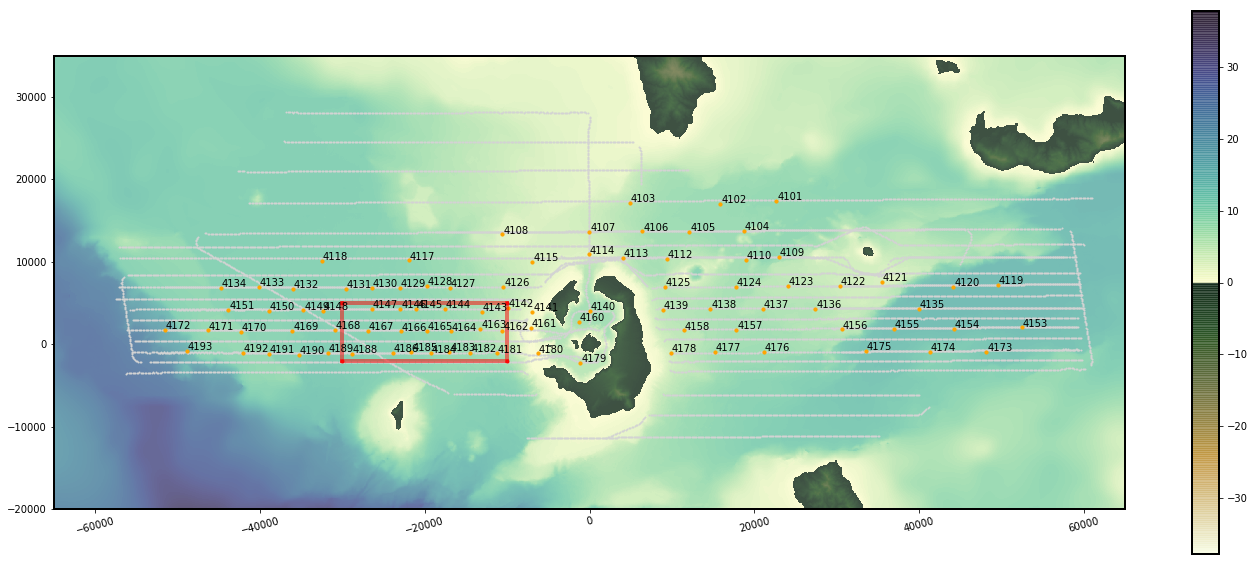

In [59]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = -3e4     
x2 = -1e4    
y1 = -2e3    
y2 = 5e3    
z1 = 0 # CUT AT THE SEA SURFACE
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

blocks = [
    Iteration_Block(freq=3.0, niters=10, minoff=5000, maxoff=10000),
    Iteration_Block(freq=4.0, niters=10, minoff=5000, maxoff=10000),
    Iteration_Block(freq=5.0, niters=10, minoff=5000, maxoff=10000)
]

p11 = Proj_Inv_Synth('p11', './p11/', timespace=timespace, blocks=blocks, 
                    io='sgy', equation='acoustic', geometry='sgy', 
                    plot=1, full_map=1, lims_pad=None, verbos=0)

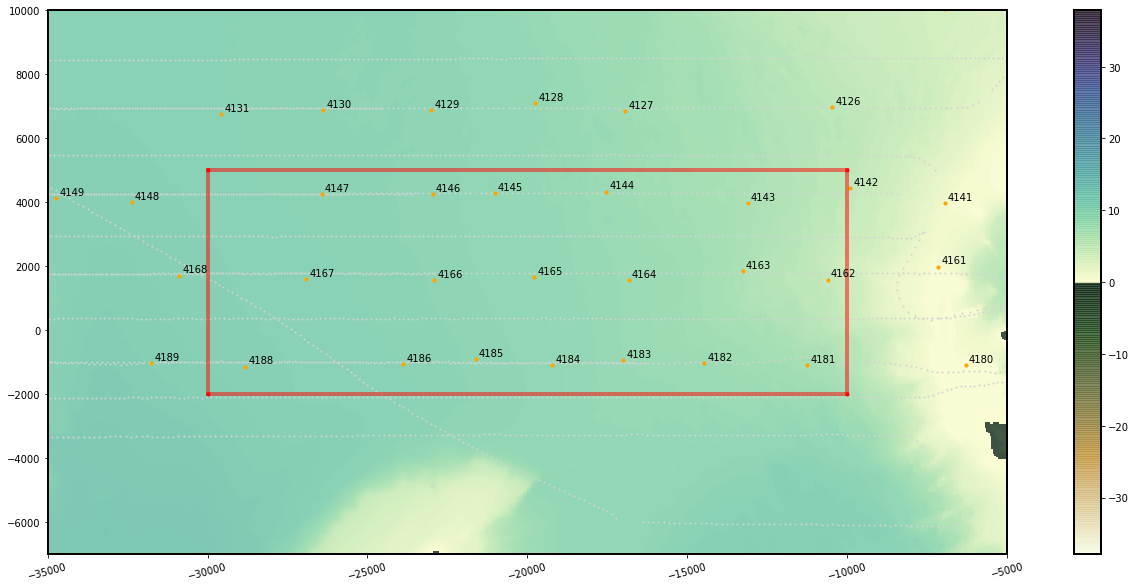

In [60]:
p11.syn.geom.Plot(full_map=1)

In [7]:
p11.syn.dims

[401, 141, 61]

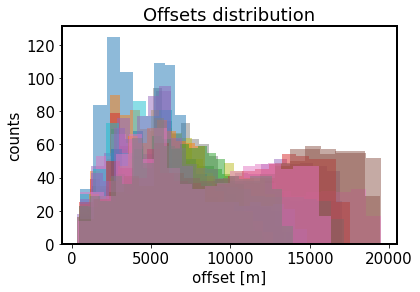

In [24]:
p11.syn.inp.sr.Show_Offsets()

Find the model value at the seabed. It assumes some water-column (here for vp: 1500 +/- 100 m/s) value to find where the seabed is located.

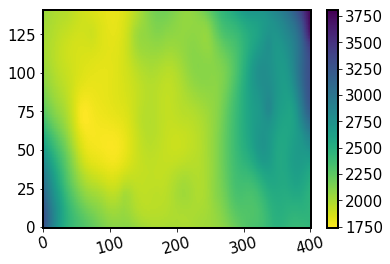

In [27]:
p11.syn.vp.true.Find_Seabed_Prop(alpha=1)

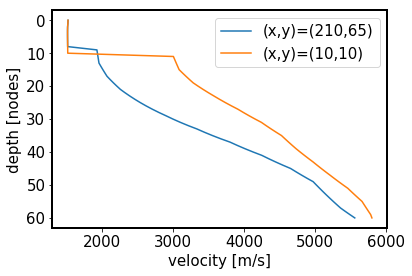

In [31]:
p11.syn.vp.true.Plot_Depth_Profile(xy_list=[[10,10], [210,65]])

In [18]:
p11.syn.env.var

{'dump_Grad': True,
 'dump_Prec': True,
 'dump_RawGrad': True,
 'dump_RawPrec': True,
 'dump_compare': False,
 'dump_dat': True,
 'dump_fw': -500,
 'sched_timestamp': True,
 'slave_timestamp': True}

In [50]:
# p11.syn.inp.sp.Create()
# p11.syn.inp.runfile.Create()
# p11.syn.inp.pbs.Cat()

In [58]:
p11.syn.inp.Check()

+++++++++++++++ Will only check input files and dump canonical runfile ++++++++++++++++
---=== Starting run (host: ese-kajetan) on 2019/06/17, 13:41:17 ===---
executable: fullwave3D.exe, version: unknown, release date: 2019-06-13
=== scheduler_getprojargs: Project name (command-line argument): "p11s"
=== setup_probtype: Equation: "acoustic", Anisotropy: "none", Domain: "time", Kernel: "low"
+++ ReadParms: WARNING, unknown keyword in Runfile: "ibfs"
+++ ReadParms: WARNING, unknown keyword in Runfile: "seaLevel"
+++ ReadParms: WARNING, unknown keyword in Runfile: "maxGhostIter"
+++ ReadParms: WARNING, unknown keyword in Runfile: "vacuum"
+++ ReadParms: WARNING, unknown keyword in Runfile: "accuracy"
+++ ReadParms: WARNING, unknown keyword in Runfile: "minGhostFS"
+++ ReadParms: WARNING, unknown keyword in Runfile: "minFictFS"
+++ ReadParms: WARNING, unknown keyword in Runfile: "interpMode"
+++ ReadParms: WARNING, unknown keyword in Runfile: "srcType"
+++ ReadParms: WARNING, unknown keywo

## Syn

In [34]:
p11.syn.out.fw

Note a drop in wavelength when entering the water.

![title](p11/syn/out/p11s-fw-002000-csref04144-iter00001-taskid00004_m.gif)

![title](p11/syn/out/p11s-fw-000500.gif)

In [35]:
p11.syn.out.synth

![title](p11/syn/out/p11s-Synthetic.gif)

### Command history

In [52]:
# p11.syn.inp.Plot(plot_sr=0, save=1)

In [53]:
# p11.syn.out.Tidy()

In [54]:
# p11.syn.out.synth.Split(convert=1)

In [ ]:
# p11.syn.out.synth.Plot(juxtapose=0, save=1)

In [129]:
# p11._Prepare_Input(nx=401, plot=0, verbos=2)

In [130]:
# p11.syn.vp.true.Plot_Various_Slices()

In [298]:
# p11.syn.vp.true.Plot_Various_Slices()

In [132]:
# p11.syn.vp.true.anom.Plot_Various_Slices()

In [137]:
# p11.syn.inp.Check()

In [138]:
# p11.syn.inp.pbs.Create(verbos=2, nnodes=1, hours=2, ncpus=12, q='general')

In [ ]:
# p11.syn.inp.runfile.Create(b_abs=2, e_abs=0, verbos=2)

In [153]:
# p11.syn.inp.Prepare(plot=0, truevp=0, sp=0, run=0)

In [ ]:
# p11.syn.out.fw.Plot(plot_mod=1, save=1, verbos=0, animate=1)

## Inv

![title](p11/syn/inp/p11s-TrueVp_Anom_4165.png)

![title](p11/inv/out/p11i-CP-Vp_Rec_4165.gif)

Raw gradient shows the actual penetration depth.

![title](p11/inv/out/p11i-CP_RawGrad_4165.gif)

Raw preconditioner corresponds to the wavefield energy. This is what gradient is divided by (equivalent to inverse Hessian operator), obviously with some stabilization.

![title](p11/inv/out/p11i-CP_RawPrec_4165.gif)

No Inv???.log was copied => no functional.

### Command history

In [1]:
# p11.inv.inp.pbs.Cat()

In [2]:
# p11.inv.out.Prepare(prep_functional=0)
# p11.inv.out.Plot(plot_functional=0)

In [240]:
# p11.inv.inp.Check()

In [245]:
# p11.inv._Prepare_Input()

In [241]:
# p11.inv.inp.pbs.Create(verbos=2, nnodes=2, nprocesses=8, hours=4, mem_gb=40, q='mrwarn')

In [270]:
# p11.inv.inp.runfile.Create(b_abs=2, e_abs=0, verbos=0)
# p11.inv.inp.runfile.Cat()

In [19]:
# p11.inv.vp.start.Plot(nx=401)

In [243]:
# p11.inv.vp.it[22]

In [244]:
# p11.inv.inp.pbs.Cat()

# p12 (tuning p11)

In [6]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = -3e4     
x2 = -1e4    
y1 = -2e3    
y2 = 5e3    
z1 = 0 # CUT AT THE SEA SURFACE
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

blocks = [
    Iteration_Block(freq=3.0, niters=10, minoff=0, maxoff=40000),
    Iteration_Block(freq=5.0, niters=10, minoff=0, maxoff=40000),
    Iteration_Block(freq=7.0, niters=10, minoff=0, maxoff=40000)
]

p12 = Proj_Inv_Synth('p12', './p12/', timespace=timespace, blocks=blocks, 
                    io='sgy', equation='acoustic', geometry='sgy', 
                    plot=0, full_map=1, lims_pad=None, verbos=0)

lib_generic.py/Exists: File: ./p12//syn//inp/p12s-TrueVp.vtr does not exist.
lib_generic.py/Exists: File: ./p12//syn//inp/p12s-TrueVp.vtr does not exist.


In [7]:
p12.inv.inp.runfile.Create()
p12.inv.inp.runfile.Cat()

Content of  ./p12//inv//inp/p12i-Runfile.key : 
! May 2019, K. Chrapkiewicz 
! THIS RUNFILE CONFORMS TO
! FULLWAVE REV.688 STANDARD
! A. PROBLEM DEFINITION
problem : tomography
 domain        : time
 dim           : 3D
 equation      : acoustic
 units         : metric
 anisotropy    : none
 kernel        : low
! B. MODEL DEFINITON
NX1 : 401
NX2 : 141
NX3 : 61
 DX            : 50.0
! X. FREE SURFACE
ibfs : 0
seaLevel : 0
 maxGhostIter  : 2
 vacuum        : 0
 accuracy      : 0.001
 minGhostFS    : 0.001
 minFictFS     : 0.5
 interpMode    : 1
 srcType       : 0
 recType       : 0
! C. DATA DEFINITION
NCOMP : 18
NSHOTS : 18
NRECS : 846
MAXRC : 846
 MAXPS         : 1
io : SEGY
! D. BOUNDARY CONDITIONS
 btop          : 0
bbot : 40
bleft : 40
bright : 40
bfront : 40
bback : 40
 extratop      : 0
extrabot : 50
extraleft : 50
extraright : 50
extrafront : 50
extraback : 50
! F. MUTES & DATA SELECTION
etime : 5.0
! G. INVERSION PARAMATERS
 !iprop        : vp       ! INVERT PROPERTIES
 func     

In [28]:
# p12.inv.inp.pbs.Cat()

In [30]:
# p12.inv.inp.pbs.Check()

In [7]:
# p12.inv.out.Prepare()
# p12.inv.out.Plot()

In [5]:
p12.inv.vp.it[30].Plot_Recovered_Anom(save=1)

lib_generic_PLOTT.py/Save:  ./p12//inv//out/p12i-CP00030-Vp_Rec_4167.sgy
lib_generic_PLOTT.py/Save_As:  Saved the file: ./p12//inv//out/p12i-CP00030-Vp_Rec_4167.png
lib_generic_PLOTT.py/Save:  ./p12//inv//out/p12i-CP00030-Vp_Rec_4166.sgy
lib_generic_PLOTT.py/Save_As:  Saved the file: ./p12//inv//out/p12i-CP00030-Vp_Rec_4166.png
lib_generic_PLOTT.py/Save:  ./p12//inv//out/p12i-CP00030-Vp_Rec_4165.sgy
lib_generic_PLOTT.py/Save_As:  Saved the file: ./p12//inv//out/p12i-CP00030-Vp_Rec_4165.png
lib_generic_PLOTT.py/Save:  ./p12//inv//out/p12i-CP00030-Vp_Rec_4164.sgy
lib_generic_PLOTT.py/Save_As:  Saved the file: ./p12//inv//out/p12i-CP00030-Vp_Rec_4164.png
lib_generic_PLOTT.py/Save:  ./p12//inv//out/p12i-CP00030-Vp_Rec_4163.sgy
lib_generic_PLOTT.py/Save_As:  Saved the file: ./p12//inv//out/p12i-CP00030-Vp_Rec_4163.png
lib_generic_PLOTT.py/Save:  ./p12//inv//out/p12i-CP00030-Vp_Rec_4162.sgy
lib_generic_PLOTT.py/Save_As:  Saved the file: ./p12//inv//out/p12i-CP00030-Vp_Rec_4162.png
lib_generi

## Duplicate in a loop

# p13 (syn_vs_obs)

In [14]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = 2e4     
x2 = 3e4    
y1 = 2.6e3    
y2 = 7e3    
z1 = 0 # CUT AT THE SURFACE OF THE SEA
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

blocks = [
    Iteration_Block(freq=3.0, niters=10, minoff=5000, maxoff=10000),
    Iteration_Block(freq=4.0, niters=10, minoff=5000, maxoff=10000),
    Iteration_Block(freq=5.0, niters=10, minoff=5000, maxoff=10000)
]

p13 = Proj_Syn_vs_Obs('p13', './p13/', timespace=timespace, blocks=blocks, 
                    io='sgy', equation='acoustic', geometry='sgy', 
                    plot=0, verbos=0)

## Plotting ttr dumps

In [176]:
for key in [8, 26, 27, 40, 41]:
    key = str(key)
    print key, p13.shot_ranges[key]

 8 [21024, 21336]
26 [33366, 33723]
27 [32497, 32859]
40 [38184, 38368]
41 [37352, 37540]


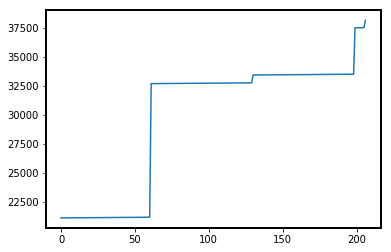

In [184]:
cont = Read_File('p13/inp/p13-Observed-0000.log')
c = cont[1: ]
s1 = []
s2 = []
for l in c:
    if l[0] == '4136':
        s1.append(int(l[1]))
    if l[1] == ['4137']:
        s2.append(int(l[1]))
plt.plot(s1)
plt.plot(s2)

In [167]:
p13.inp.sp.Create(io='both', problem='both', reciprocity=1)
p13.inp.sp.Cat()
p13.inp.sp.Run()

Content of  ./p13//inp/p13-SegyPrep.key : 
y origin : 2600.0
fixed array : yes
dtms : 2.5
io api : both
nx1 : 201
nx3 : 61
nx2 : 89
z type : elevation
reciprocity : 1
text : yes
ttime : 5000.0
x shift : 0
y shift : 0
dx : 50
unique : yes
FFID : yes
x origin : 20000.0
geometry : segy
debug : yes
retain : yes
problem : both
outseis : yes

Running SegyPrep...
To see the live-progress, run SegyPrep directly with fwi_run_segyprep.sh proj.name

fwi_run_segyprep.sh: START

Overwrite the TrueVp.vtr model? no

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to p13
 Preparing files for synthetics...
 Preparing files for inversion...

 Grid points in-line:                    201
 Grid points cross-line:                  89
 Grid points vertically:                  61
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (me



Warning. shifting receivers for FS needs FIX!!! Now switched off!!! 




## Command history

In [57]:
# p13.inp.Ls()

In [863]:
# p13.inp.Prepare()
# p13.out.Prepare()

In [865]:
# p13.inp.Plot()
# p13.out.Plot()

In [707]:
p13.vp.true.Convert()

lib_generic.py/Exists: File: ./p13//inp/p13-TrueVp.vtr does not exist.


Model_File.Convert: Converting file ./p13//inp/p13-TrueVp.sgy


In [625]:
p13.inp.wavelet.Duplicate('/home/kmc3817/heavy_PhD/source_wavelets/jm_source_Xd_2-6Hz_17_01_01.sgy')

lib_generic.py/Duplicate: Duplicating /home/kmc3817/heavy_PhD/source_wavelets/jm_source_Xd_2-6Hz_17_01_01.sgy to ./p13//inp/p13-RawSign.sgy using cp command.


lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && convert_sgy2vtr_2D.sh ./p13//inp/p13-RawSign.sgy: 
3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00404813 s, 790 kB/s


 CAUTION: remember to re-run SegyPrep!



lib_io_fullwave.py/Read_sgy:  Converting sgy2vtr for file: ./p13//inp/p13-RawSign.sgy


lib_io_fullwave.py/Read_sgy: Plotting ./p13//inp/p13-RawSign.vtr. Provide nx to convert sgy (nx of ./p13//inp/p13-RawSign.vtr is 1).


lib_io_fullwave.py/Read_sgy:  Converting sgy2vtr for file: ./p13//inp/p13-RawSign.sgy


lib_io_fullwave.py/Read_sgy: Plotting ./p13//inp/p13-RawSign.vtr. Provide nx to convert sgy (nx of ./p13//inp/p13-RawSign.vtr is 1).


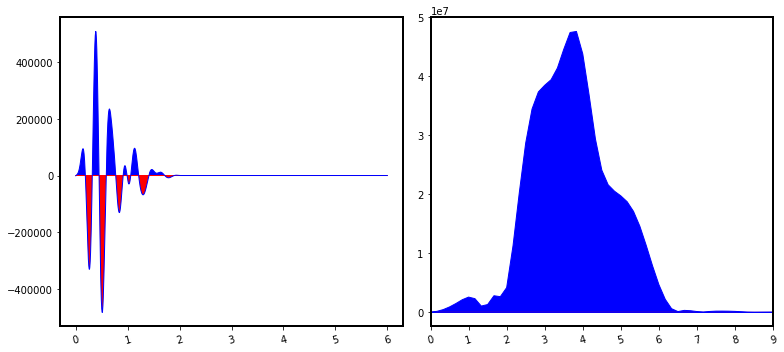

In [626]:
p13.inp.wavelet.Plot()

In [628]:
# p13.inp.sp.Run()

In [630]:
!su_xwigb.sh p13/inp/p13-Signature.sgy


suxwigb.sh: START

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.0053571 s, 597 kB/s
XIO:  fatal IO error 11 (Resource temporarily unavailable) on X server ":0"
      after 7788 requests (7788 known processed) with 0 events remaining.

suxwigb.sh: END
Runtime of the suxwigb.sh: 9 s


In [487]:
# p13.inp.Prepare()
# p13.inp.Plot()

In [489]:
# p13.out.Prepare()
# p13.out.Plot()

In [453]:
p13.inp.pbs.Create(nnodes=1, mpiprocs=3, q='general')
p13.inp.pbs.Cat()

Content of  ./p13//inp/p13-Run.pbs : 
#!/bin/bash

##
# This script is supposed to be run in a 'project/out/' directory
# and a directory 'project/inp/' must exist too.
#
# For more explanation, see lib_fwi_generic.py/PBS_File_Write_Header.
#
##

#PBS -N p13
#PBS -o p13-Out.log
#PBS -e p13-Err.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=2:ompthreads=16:ncpus=32:mem=62gb
#PBS -l place=scatter:excl

# PROJECT INFO
project_name=p13

# PATHS
code_path=/rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'path to the code-executable: '${code_path}
this_dir=$PBS_O_WORKDIR
work_dir=$TMPDIR

# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RUNNING ON A WHOLE NODE) 

# ARGUMENTS OF fullwave3D.exe
CPNUM=-1
NTHREAD=16 # EQUAL TO ompthreads

# FULLWAVE'S ENVIRONMENTAL VARIABLES
export SCHEDULER_DUMPGRAD="yes"
export SCHEDULER_DUMPPREC="yes"
export SCHEDULER_DUMPRAWGRAD="yes"
e

0

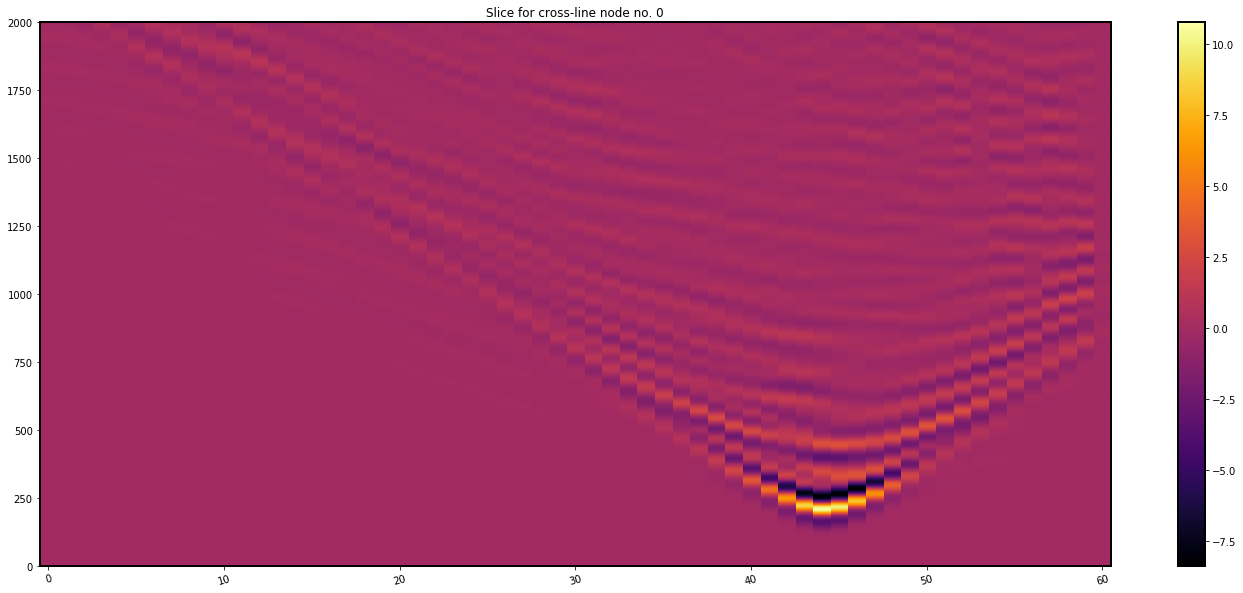

In [437]:
Plot('./p07/syn/out/p7s-Synthetic_4136_8.vtr')#, data_type='data')

0

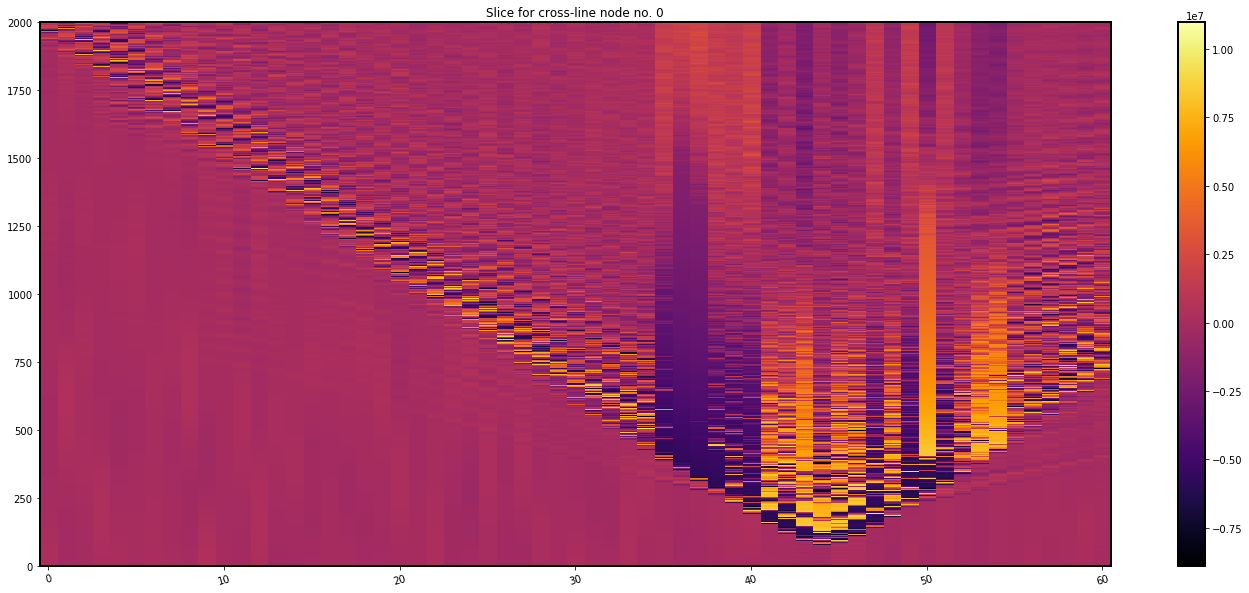

In [436]:
Plot('./p13//inp/p13-OutSeis_4136_8.vtr')#, data_type='data')

# p14 (JM inversecheck)

- just copied, not properly initialized

In [31]:
dt = 0.0025  
ns = 2400    
dx = 50      
x1 = -3e4     
x2 = 3e4    
y1 = -5e3    
y2 = 15e3    
z1 = 0 # CUT AT THE SURFACE OF THE SEA
z2 = 6e3    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

blocks = [
    Iteration_Block(freq=3.0, niters=20, minoff=5000, maxoff=10000),
    Iteration_Block(freq=3.4, niters=10, minoff=5000, maxoff=10000)
]

p14 = Proj_Inv('p14', './p14/', timespace=timespace, blocks=blocks, 
                    io='sgy', equation='acoustic', geometry='sgy', 
                    plot=0, verbos=0)

In [21]:
p14.inp.runfile.Cat()

Content of  ./p14//inp/p14-Runfile.key : 

 ! Skeleton Runfile for FULLWAVE3D
 ! Generated on August 16, 2018, at 09:31:17
 ! By SEGYPREP, Version 3.07
 ! For project sant01

 Problem       : tomography

 ! Problem type
 Units         : metric
 Equation      : acoustic
 Domain        : time
 Probdims      : 3D
 IO            : SEGY

 ! Model size
 NX1     :         1201
 NX2     :          401
 NX3     :          121
 DX      :    50.000000

 ! Numbers of shots and receivers
 NCOMP   :           47
 NSHOT   :           47
 MAXPS   :            1
 NRECS   :         5282
 MAXRC   :         3299

 ! Free surface boundary at top, absorbing elsewhere
 btop          : -99
 bleft         : 2
 bright        : 2
 bfront        : 2
 bback         : 2
 bbot          : 2

 etop          : 0
 eleft         : 0
 eright        : 0
 efront        : 0
 eback         : 0
 ebot          : 0
 
 
 ! Control density model
 Water velocity  : 1500
 Water density   : 1000
 Gardner cutoff  : 1600

 ! Inversion 

In [23]:
p14.inp.Check()

+++++++++++++++ Will only check input files and dump canonical runfile ++++++++++++++++
---=== Starting run (host: ese-kajetan) on 2019/06/16, 18:25:24 ===---
executable: fullwave3D.exe, version: unknown, release date: 2019-06-13
=== scheduler_getprojargs: Project name (command-line argument): "p14"
+++ ReadParms: reached non-standard keyword "eleft" with no "Anisotropy" keyword given - will try after assuming isotropic...
+++ ReadParms: reached non-standard keyword "eleft" with no "Kernel" keyword given - will try after assuming low-order...
=== setup_probtype: Equation: "acoustic", Anisotropy: "none", Domain: "time", Kernel: "low"
+++ ReadParms: reached non-standard keyword "eleft" with no "Functional" keyword given - will try after assuming default (TwoNorm)...
+++ ReadParms: WARNING, unknown keyword in Runfile: "eleft"
+++ ReadParms: WARNING, unknown keyword in Runfile: "eright"
+++ ReadParms: WARNING, unknown keyword in Runfile: "efront"
+++ ReadParms: WARNING, unknown keyword in 

In [38]:
p14.env.var['dump_grad'] = 1
p14.env.var['dump_rawgrad'] = 0
p14.env.var['dump_prec'] = 0
p14.env.var['dump_rawprec'] = 0
# p14.inp.pbs.Create(hours=1, nnodes=1, nprocesses=4, q='general')
# p14.inp.pbs.Cat()
p14.inp.pbs.Create(hours=1, nnodes=1, nprocesses=4, q='mrwarn')
p14.inp.pbs.Cat()

Content of  ./p14//inp/p14-Run.pbs : 
#!/bin/bash

##
# This script is supposed to be run in a 'project/out/' directory
# and a directory 'project/inp/' must exist too.
#
# For more explanation, see lib_fwi_generic.py/PBS_File_Write_Header.
#
##

#PBS -N p14
#PBS -o p14-Out.log
#PBS -e p14-Err.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=4:ompthreads=10:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

# PROJECT INFO
project_name=p14

# PATHS
code_path=/rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
echo 'path to the code-executable: '${code_path}
this_dir=$PBS_O_WORKDIR
work_dir=$TMPDIR

# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RUNNING ON A WHOLE NODE) 

# ARGUMENTS OF fullwave3D.exe
CPNUM=-1
NTHREAD=10 # EQUAL TO ompthreads

# FULLWAVE'S ENVIRONMENTAL VARIABLES
export SCHEDULER_DUMPGRAD="yes"
export SCHEDULER_SLAVESHAVEDATA="yes"
export SCHEDULER_SLAVESHAVEMO

lib_fwi_generic.py/PBS_File_Set_Resources: Warning. Automatically setting ncpus to 40 and mem_gb to 128


# p15 (first implementation of a project loop)

In [49]:
dt = 0.0025  
ns = 2000    
dx = 50      
x1 = 2e4     
x2 = 3e4    
y1 = 2.6e3
y2 = 7e3    

z1 = 0 # CUT AT THE SURFACE OF THE SEA
z2 = 3000    
box = [x1, x2, y1, y2, z1, z2]
timespace = [box, dx, ns, dt]

for i in range(2):
    pname = 'p15_' + str(i+1).rjust(2, '0')
    ppath = './' + pname + '/'
    print pname
    proj = Proj_Syn(pname, ppath, timespace=timespace, verbos=0, plot=0)
    proj.inp.Prepare()
    break

p15_01
Removing content of  /home/kmc3817/rds/PROJECTS/fwi_sant_AIT_OBS/p15_01/inp

Removing content of  /home/kmc3817/rds/PROJECTS/fwi_sant_AIT_OBS/p15_01/out



Warning ./p15_01//inp/p15_01-Runfile.key not found. Cannot set etop, eleft, etc.
Proj_Syn.__init__: Warning. Make sure you have run inp.Prepare()
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && rm ./p15_01//inp//*: 
rm: cannot remove './p15_01//inp//*': No such file or directory
lib_generic.py/Bash2: Warning. Non-empty stderr of the command cd ./ && rm ./p15_01//out//*: 
rm: cannot remove './p15_01//out//*': No such file or directory


AttributeError: 'Proj_Syn' object has no attribute 'mods_true'

# p16